**Multiple Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [19]:
data1 = pd.read_csv('ToyotaCorolla - MLR.csv')
data1

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [13]:
data1.size

15796

In [14]:
data1.shape

(1436, 11)

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [16]:
data1.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [17]:
print('Number of Rows{}Columns'.format(data1.shape))

Number of Rows(1436, 11)Columns


In [21]:
data1=data1[["Price","Age_08_04","KM","HP","Automatic","cc","Doors","Cylinders","Gears","Weight"]]
data1

Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1431    1025  
1432    1015  
1433    1015  
1434    1015  
1435    1114  

[1436 rows x 10 columns]

In [22]:
data=data1.rename({'Age_08_04':'Age','cc':'CC'},axis=1)
data.head()

Price  Age     KM  HP  Automatic    CC  Doors  Cylinders  Gears  Weight
0  13500   23  46986  90          0  2000      3          4      5    1165
1  13750   23  72937  90          0  2000      3          4      5    1165
2  13950   24  41711  90          0  2000      3          4      5    1165
3  14950   26  48000  90          0  2000      3          4      5    1165
4  13750   30  38500  90          0  2000      3          4      5    1170

In [23]:
data[data.values==0.0]

Price  Age     KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight
0     13500   23  46986   90          0  2000      3          4      5    1165
1     13750   23  72937   90          0  2000      3          4      5    1165
2     13950   24  41711   90          0  2000      3          4      5    1165
3     14950   26  48000   90          0  2000      3          4      5    1165
4     13750   30  38500   90          0  2000      3          4      5    1170
...     ...  ...    ...  ...        ...   ...    ...        ...    ...     ...
1431   7500   69  20544   86          0  1300      3          4      5    1025
1432  10845   72  19000   86          0  1300      3          4      5    1015
1433   8500   71  17016   86          0  1300      3          4      5    1015
1434   7250   70  16916   86          0  1300      3          4      5    1015
1435   6950   76      1  110          0  1600      5          4      5    1114

[1356 rows x 10 columns]

In [24]:
data.isnull().sum()

Price        0
Age          0
KM           0
HP           0
Automatic    0
CC           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

<Axes: >

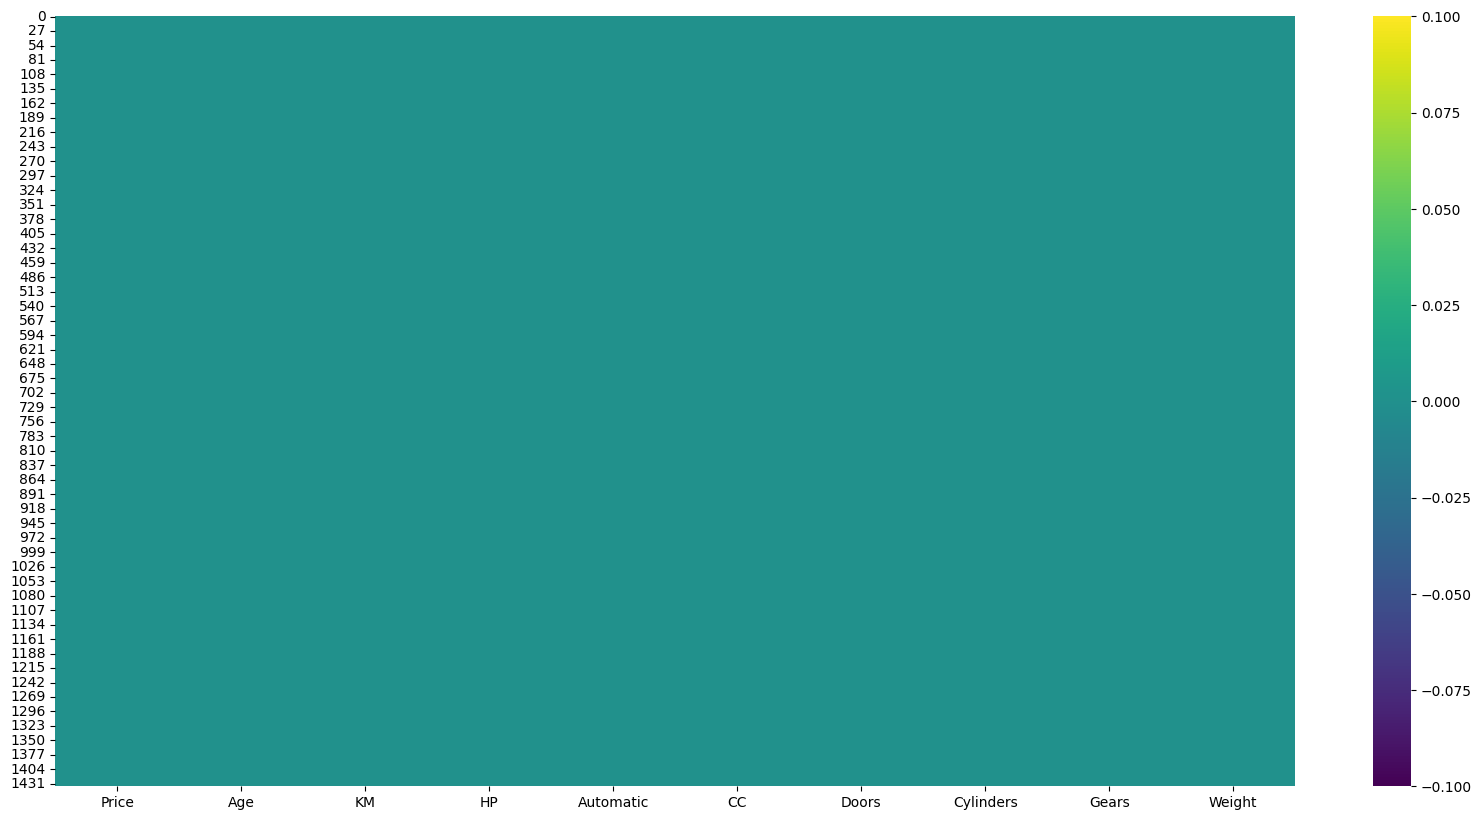

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(),cmap='viridis')

In [26]:
data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

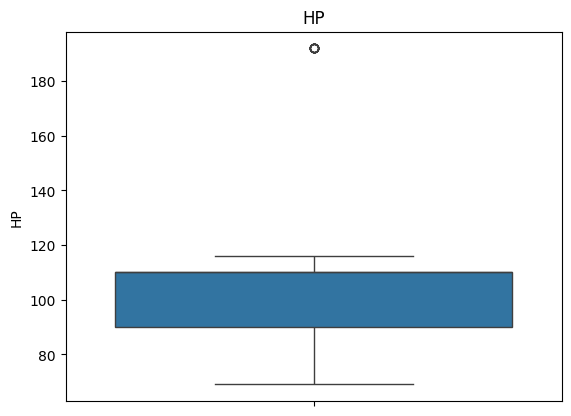

In [27]:
sns.boxplot(data['HP'])
plt.title('HP')
plt.show()

<Axes: >

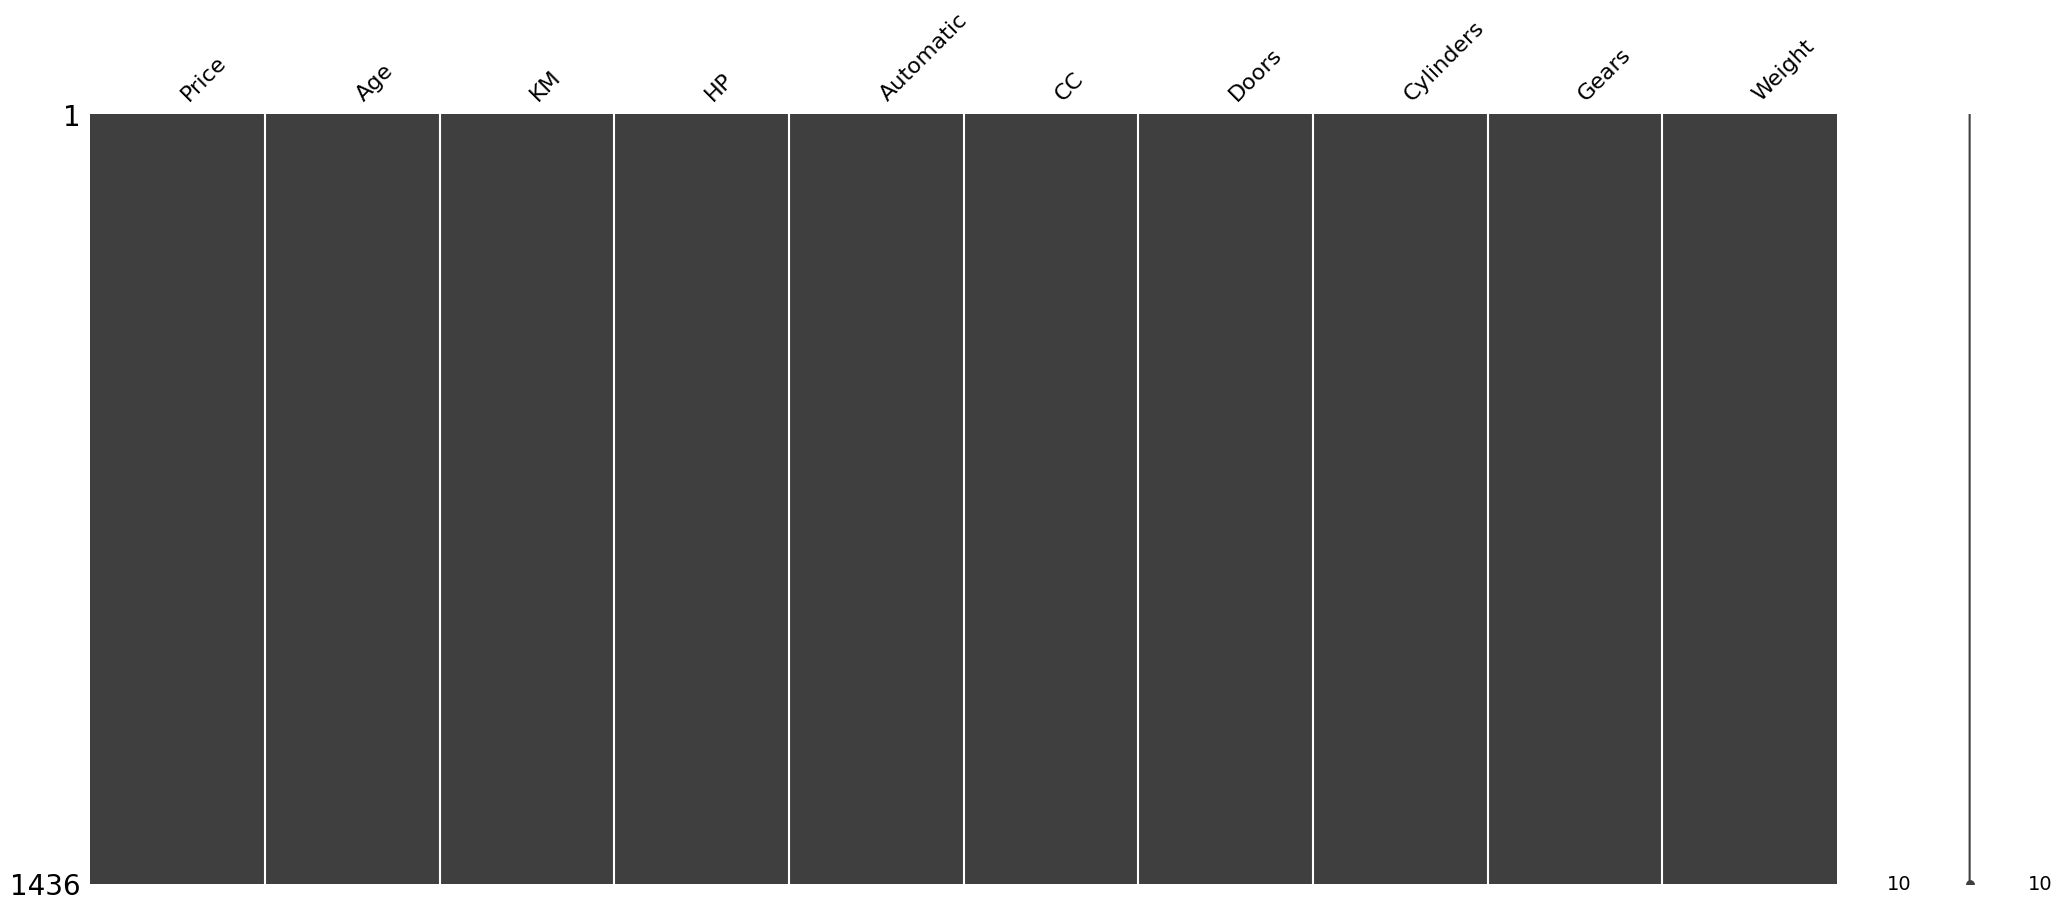

In [28]:
mn.matrix(data)

In [29]:
data[data.duplicated()].shape

(1, 10)

In [30]:
data[data.duplicated()]

Price  Age     KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight
113  24950    8  13253  116          0  2000      5          4      5    1320

In [31]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

Empty DataFrame
Columns: [Price, Age, KM, HP, Automatic, CC, Doors, Cylinders, Gears, Weight]
Index: []

In [32]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 6


In [34]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 4


In [35]:
import pylab

In [36]:
def plot_data(data,feature):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  data[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

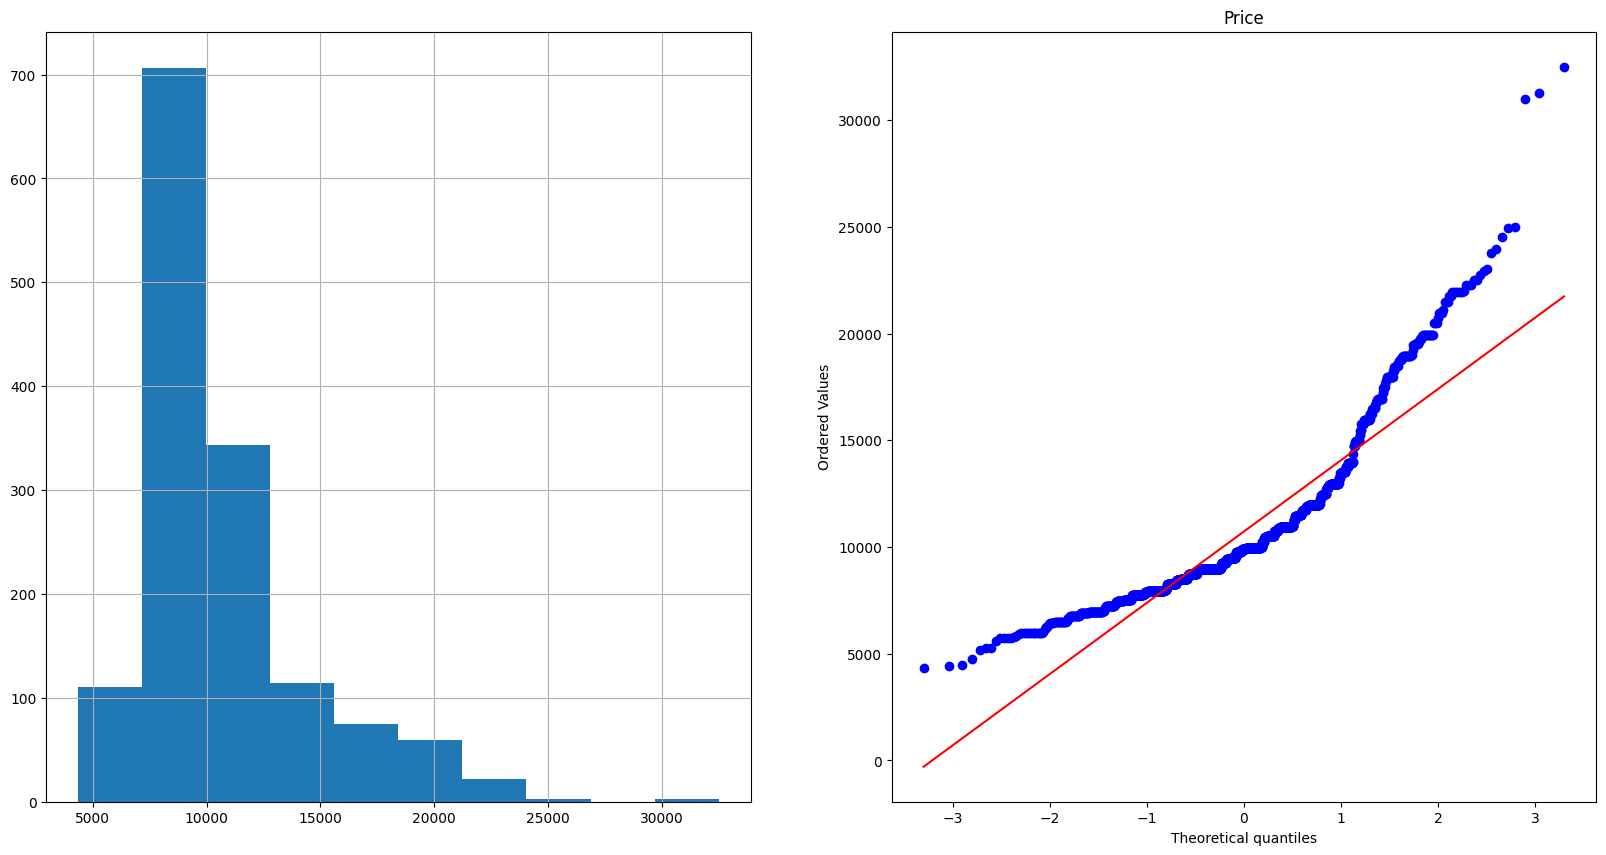

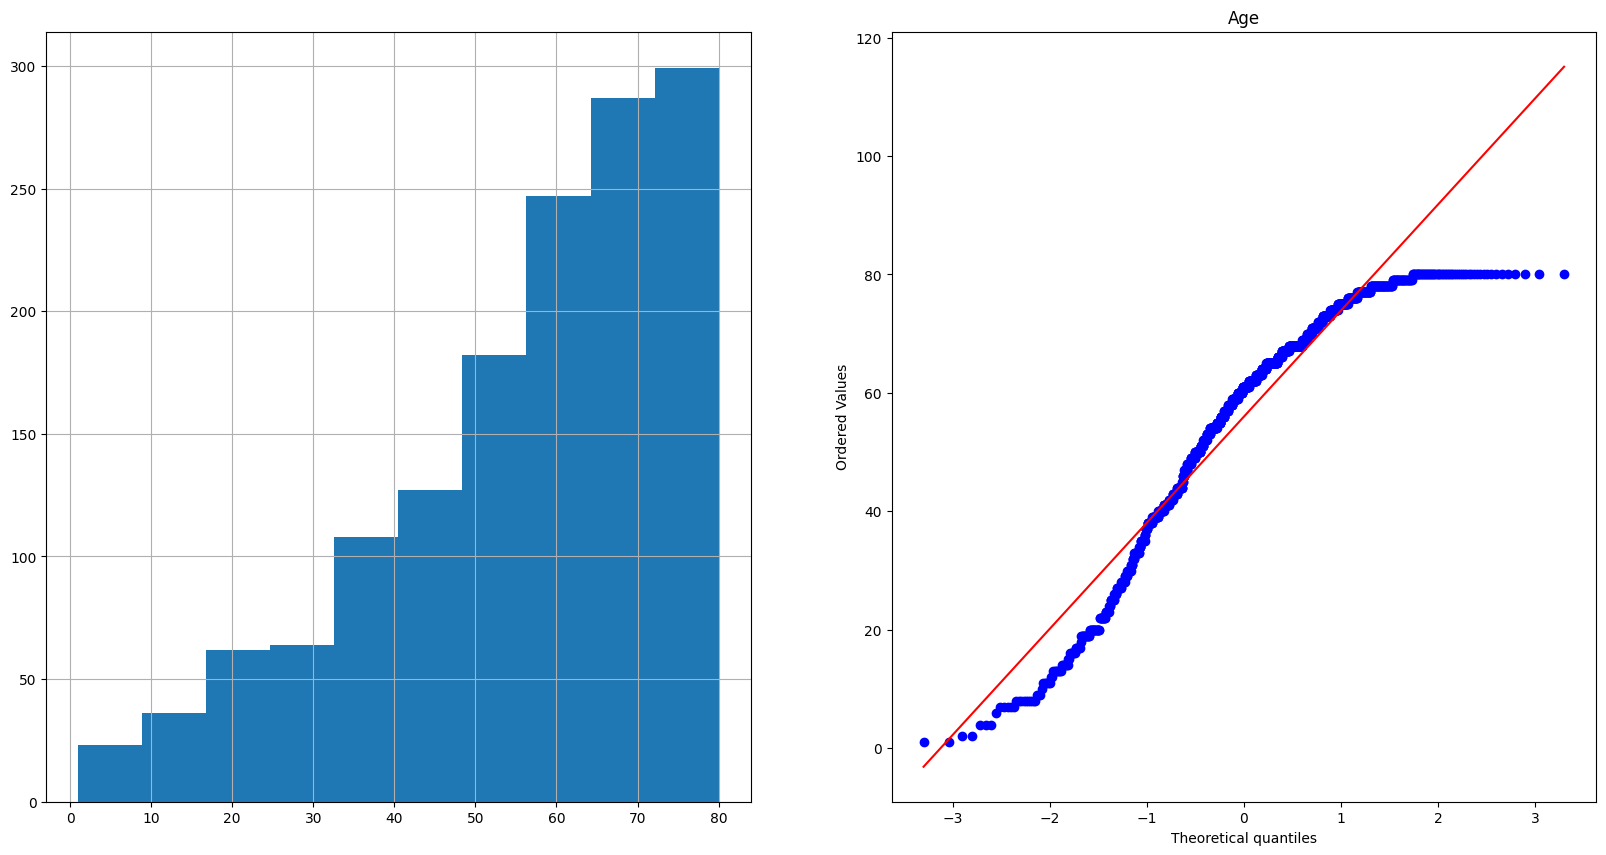

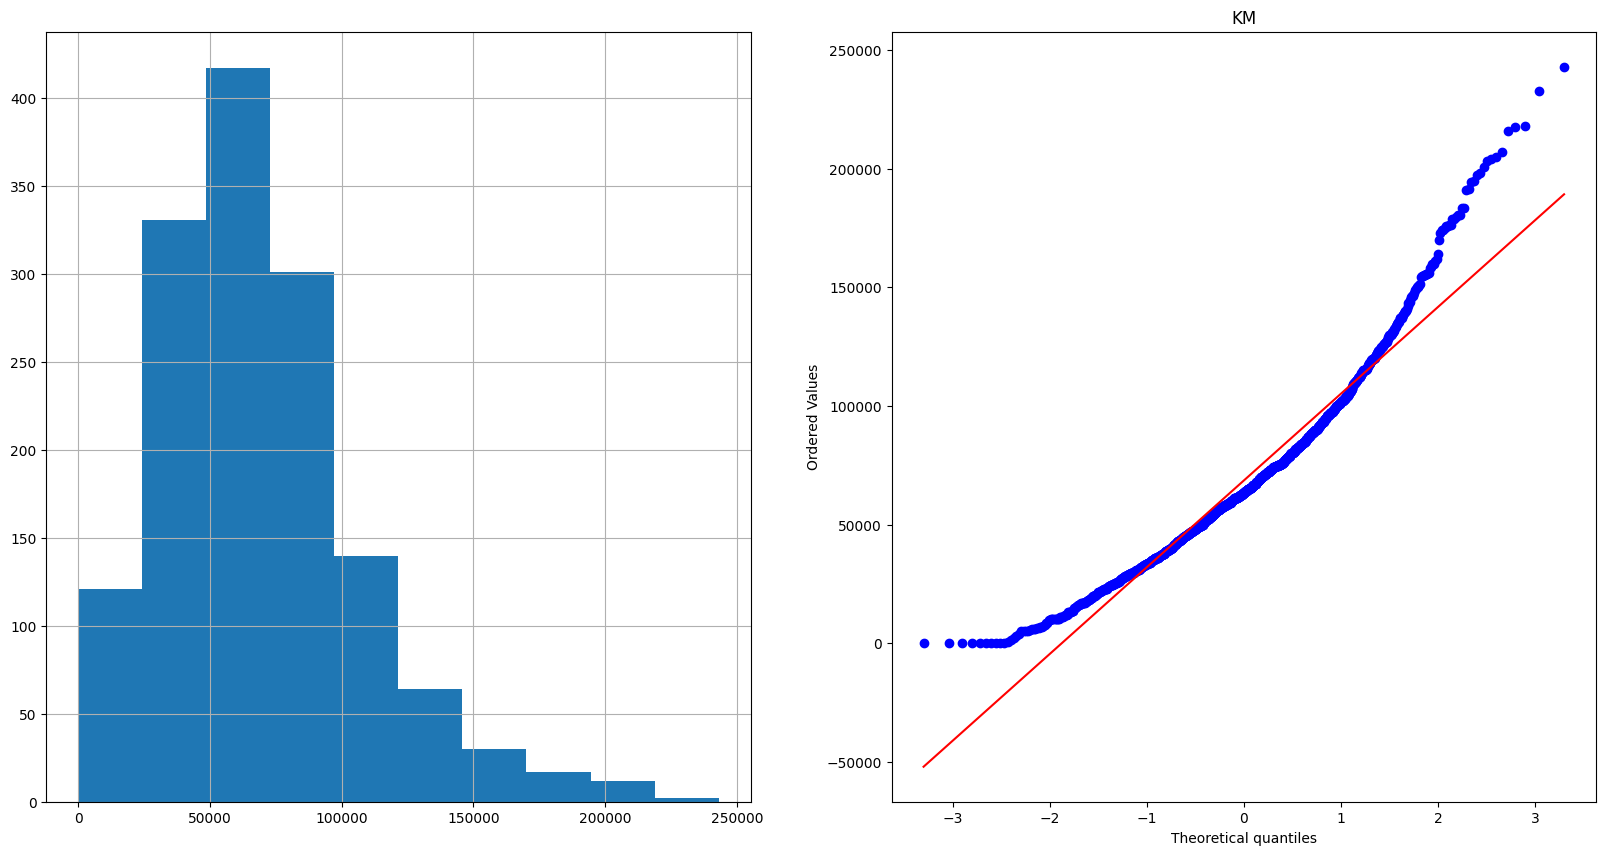

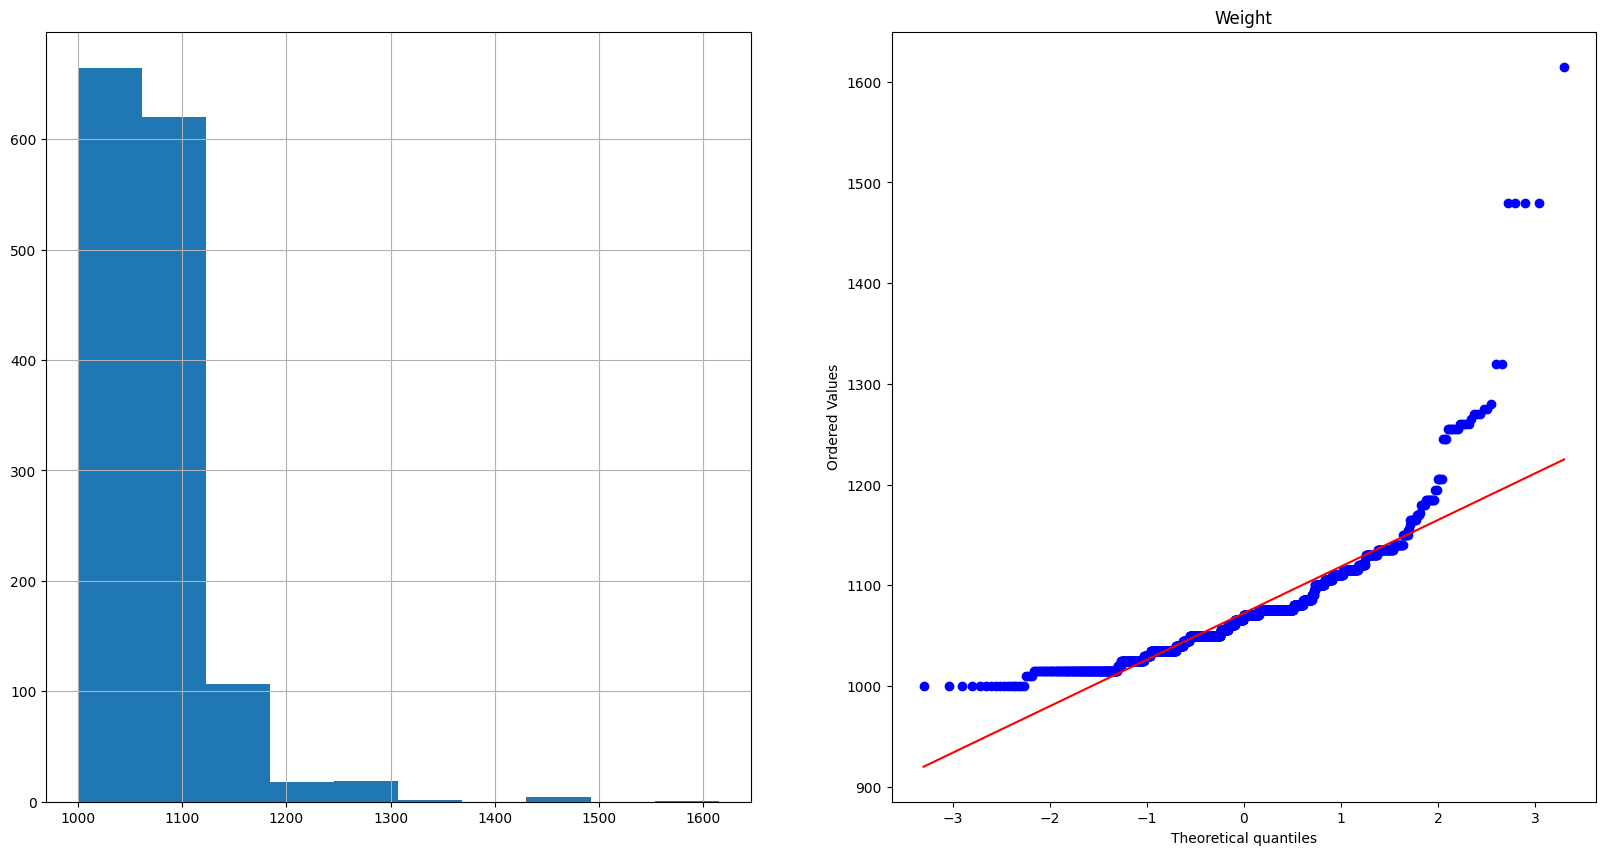

In [37]:
plot_data(data, 'Price')
plt.title('Price')
plot_data(data, 'Age')
plt.title('Age')
plot_data(data, 'KM')
plt.title('KM')
plot_data(data, 'Weight')
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

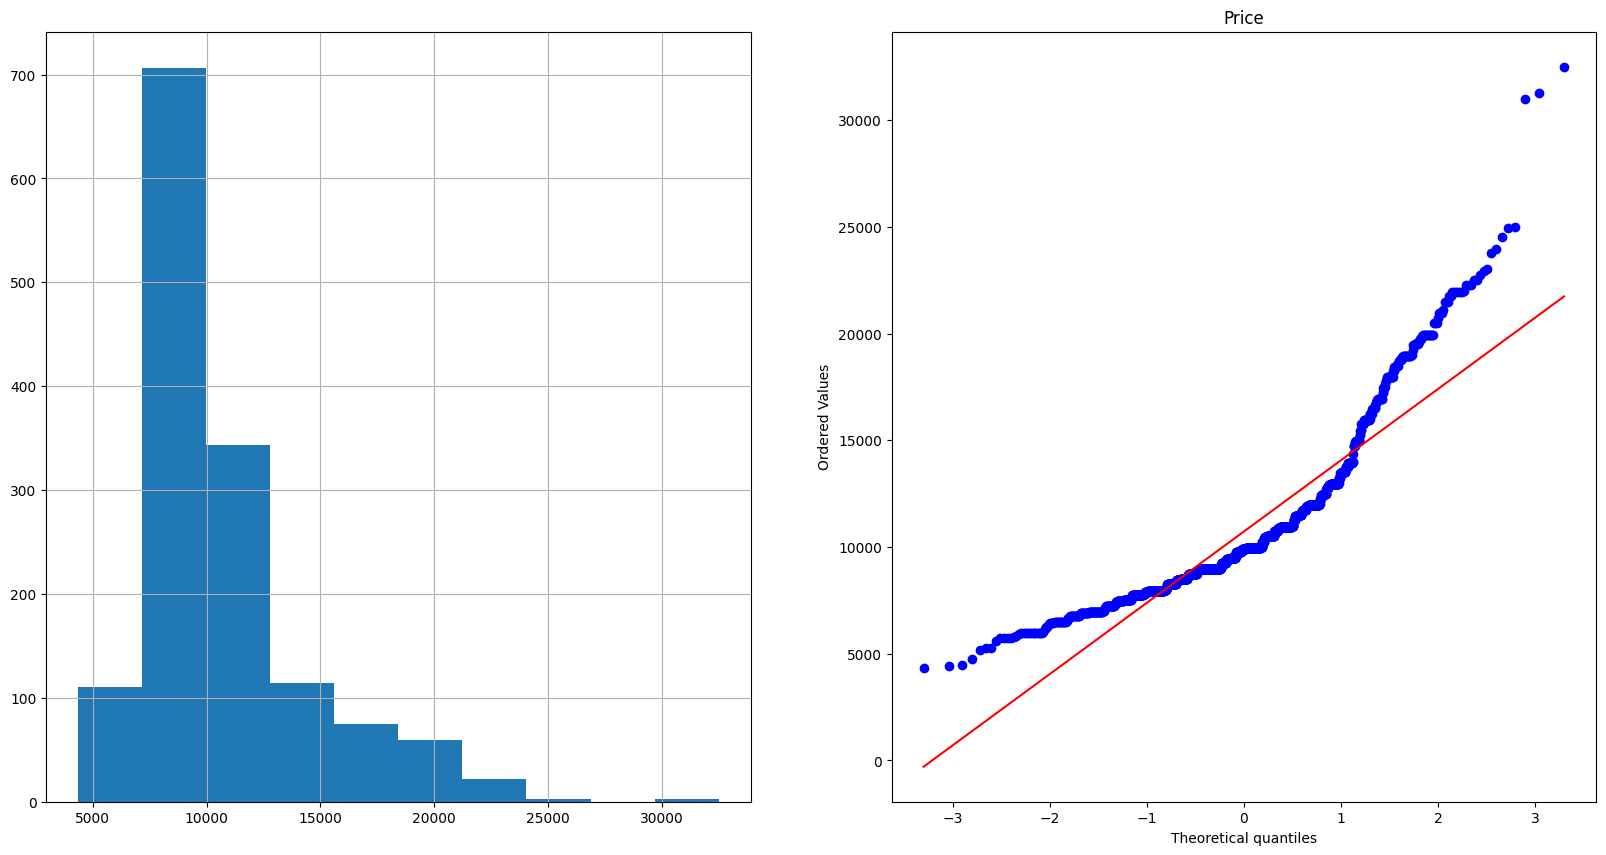

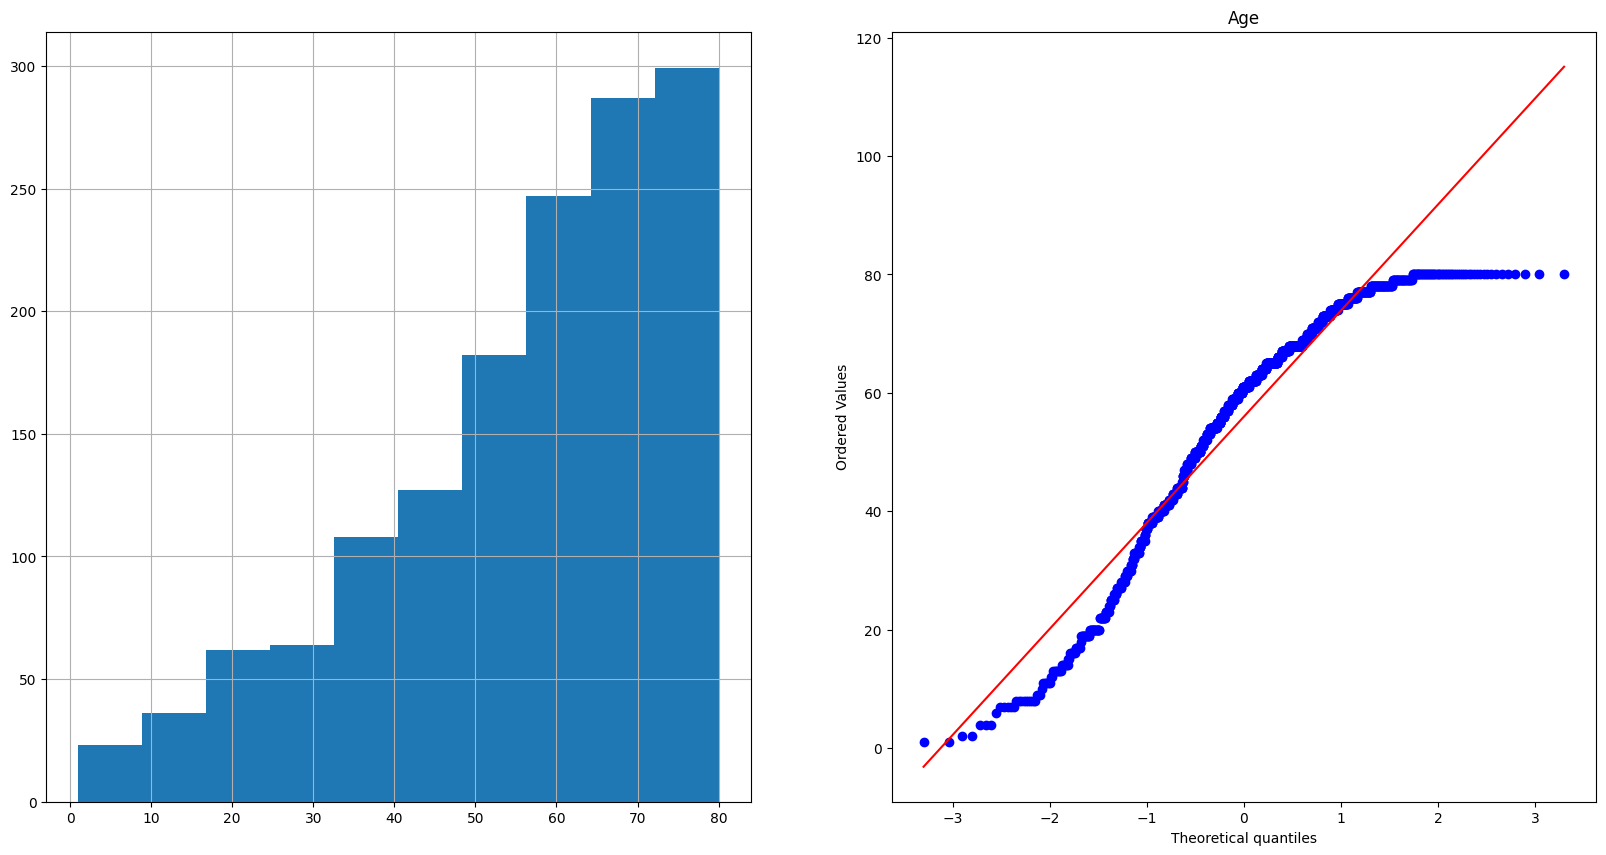

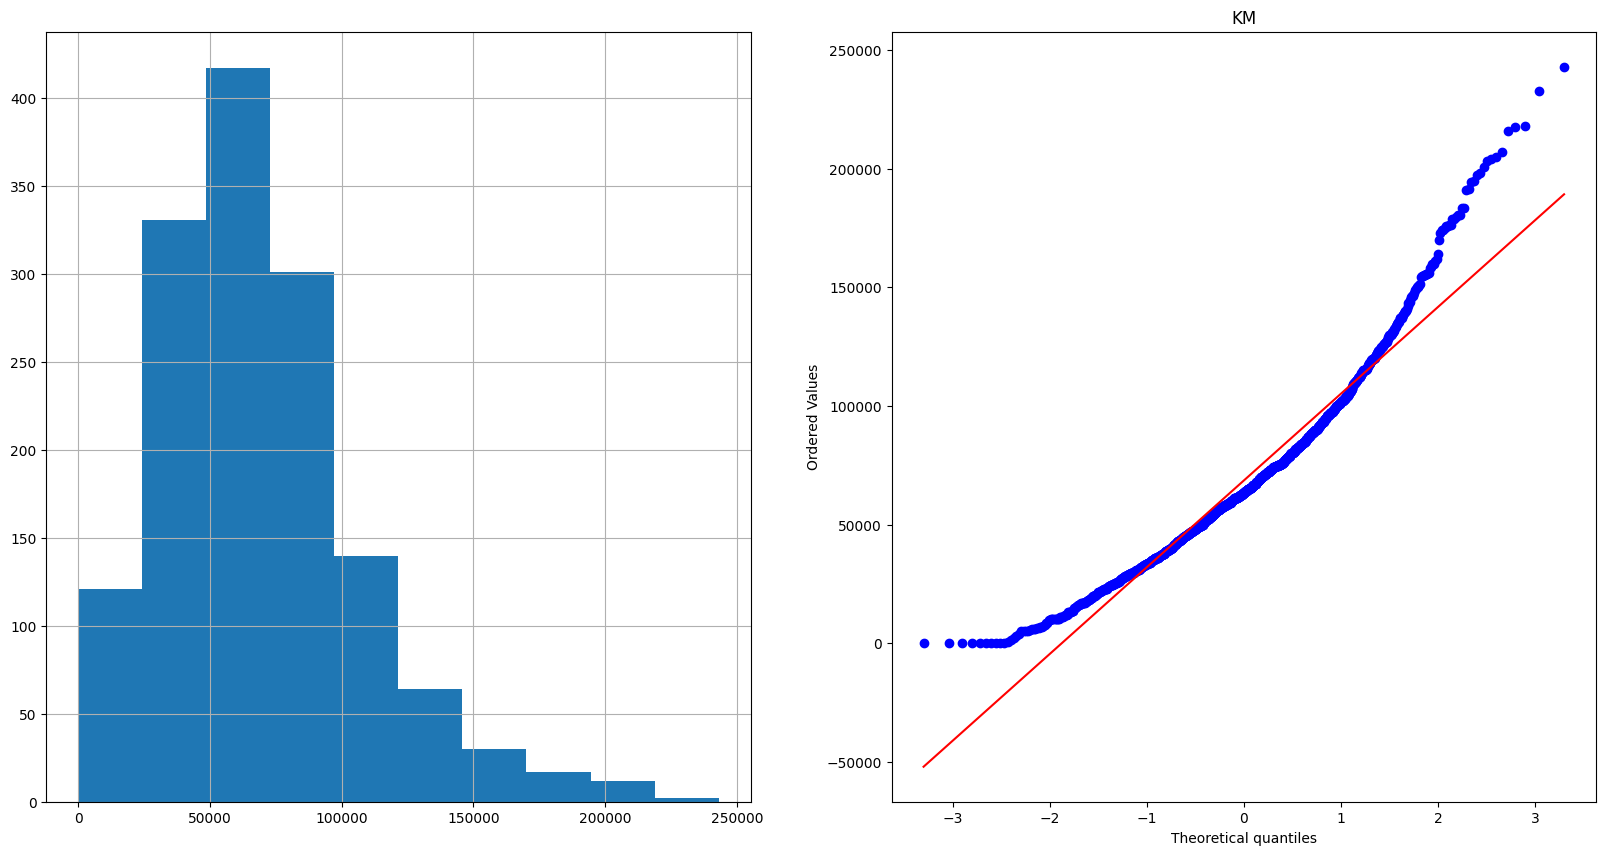

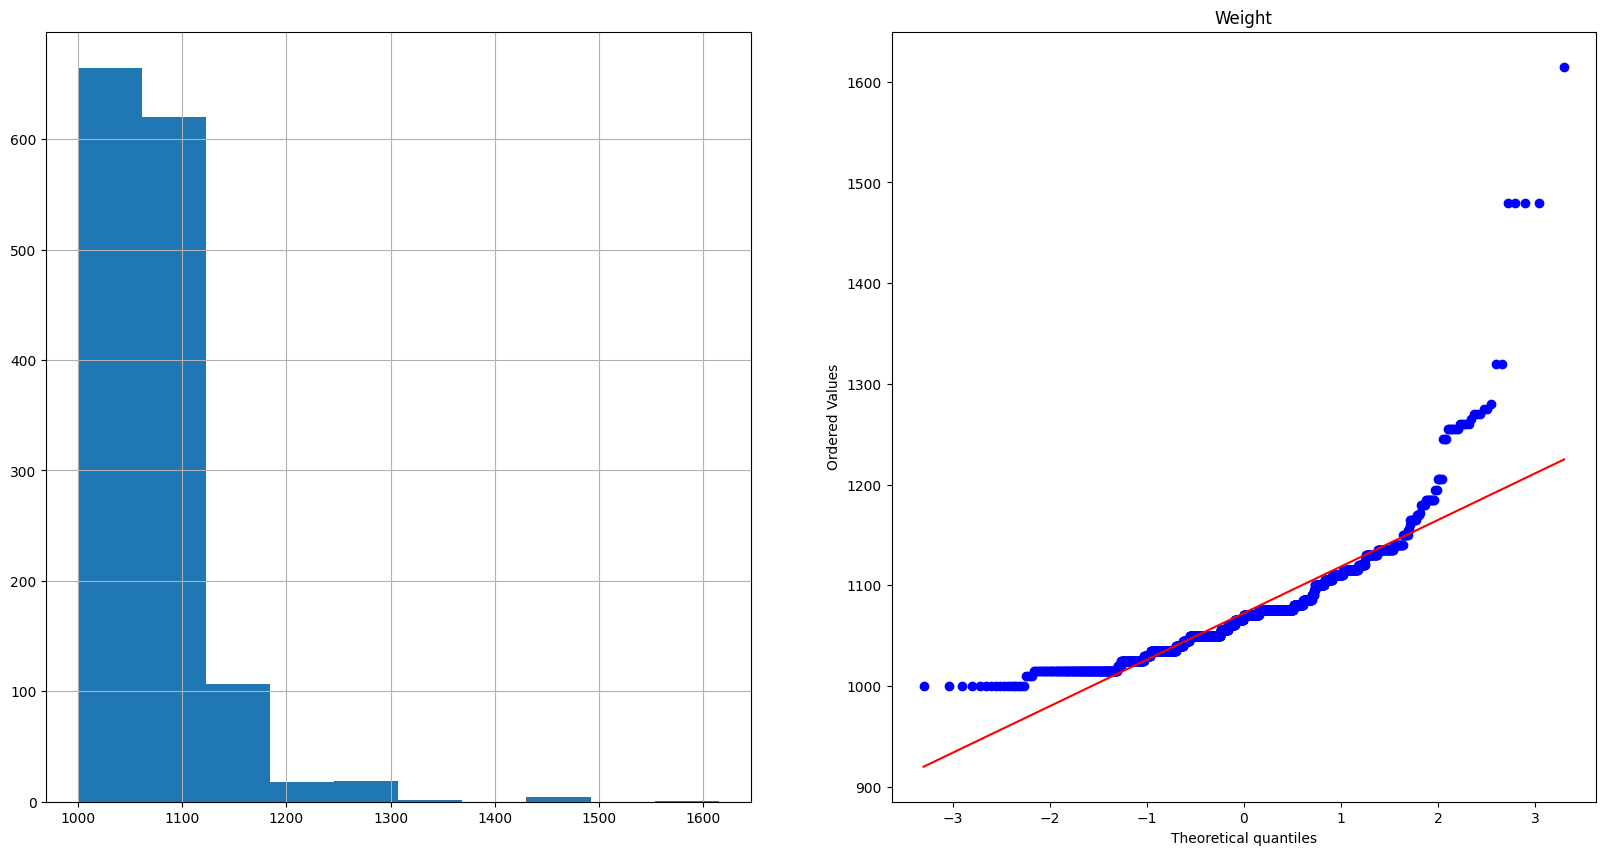

In [38]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])
plot_data(data, 'Price')
plt.title('Price')
plot_data(data, 'Age')
plt.title('Age')
plot_data(data, 'KM')
plt.title('KM')
plot_data(data, 'Weight')
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

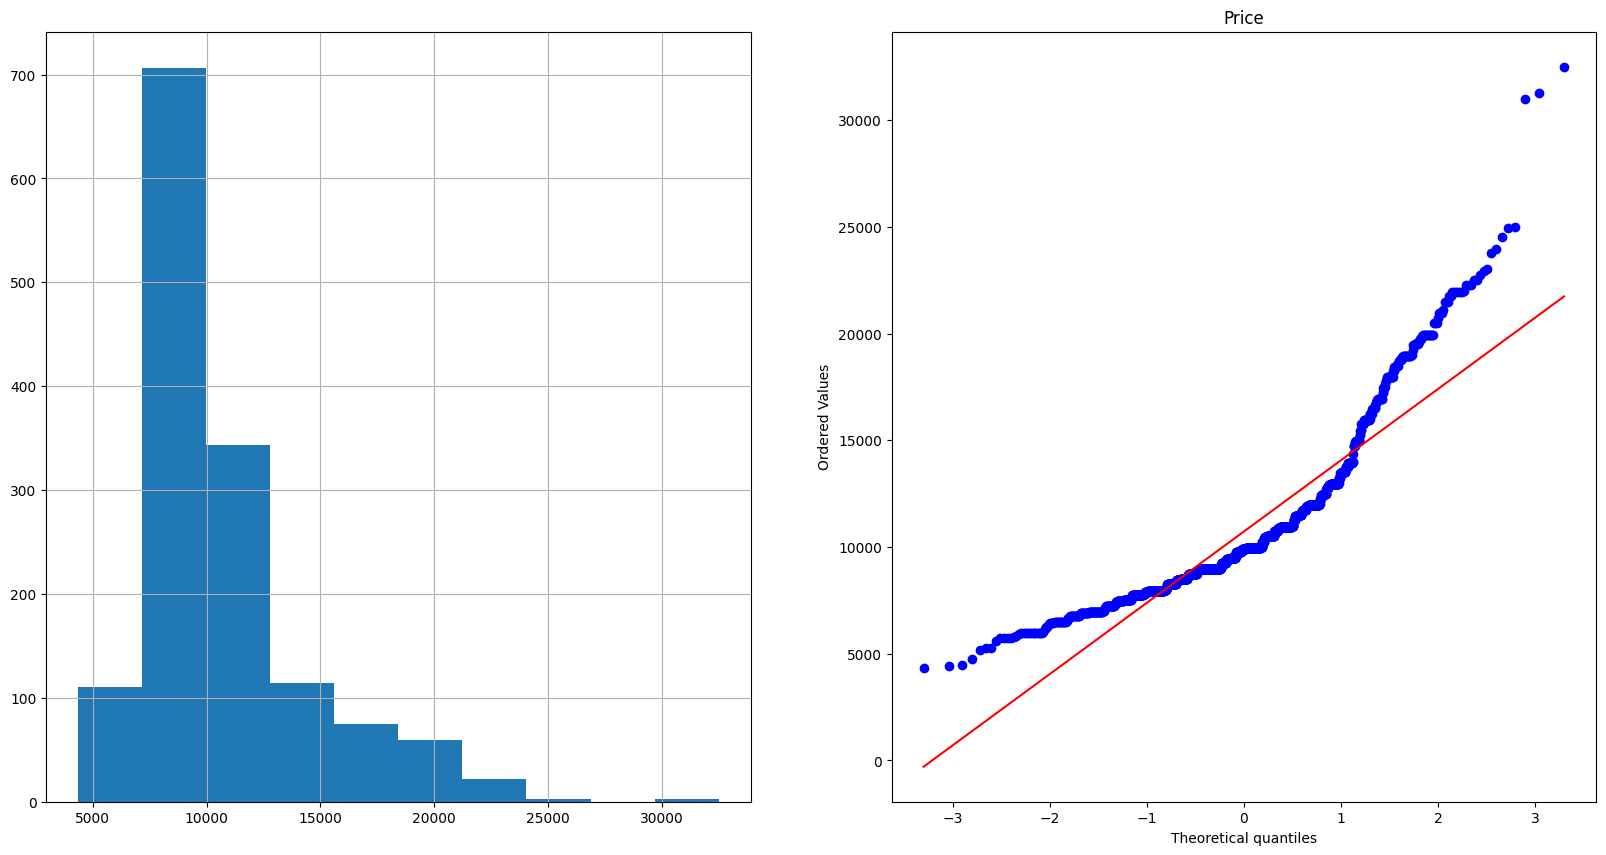

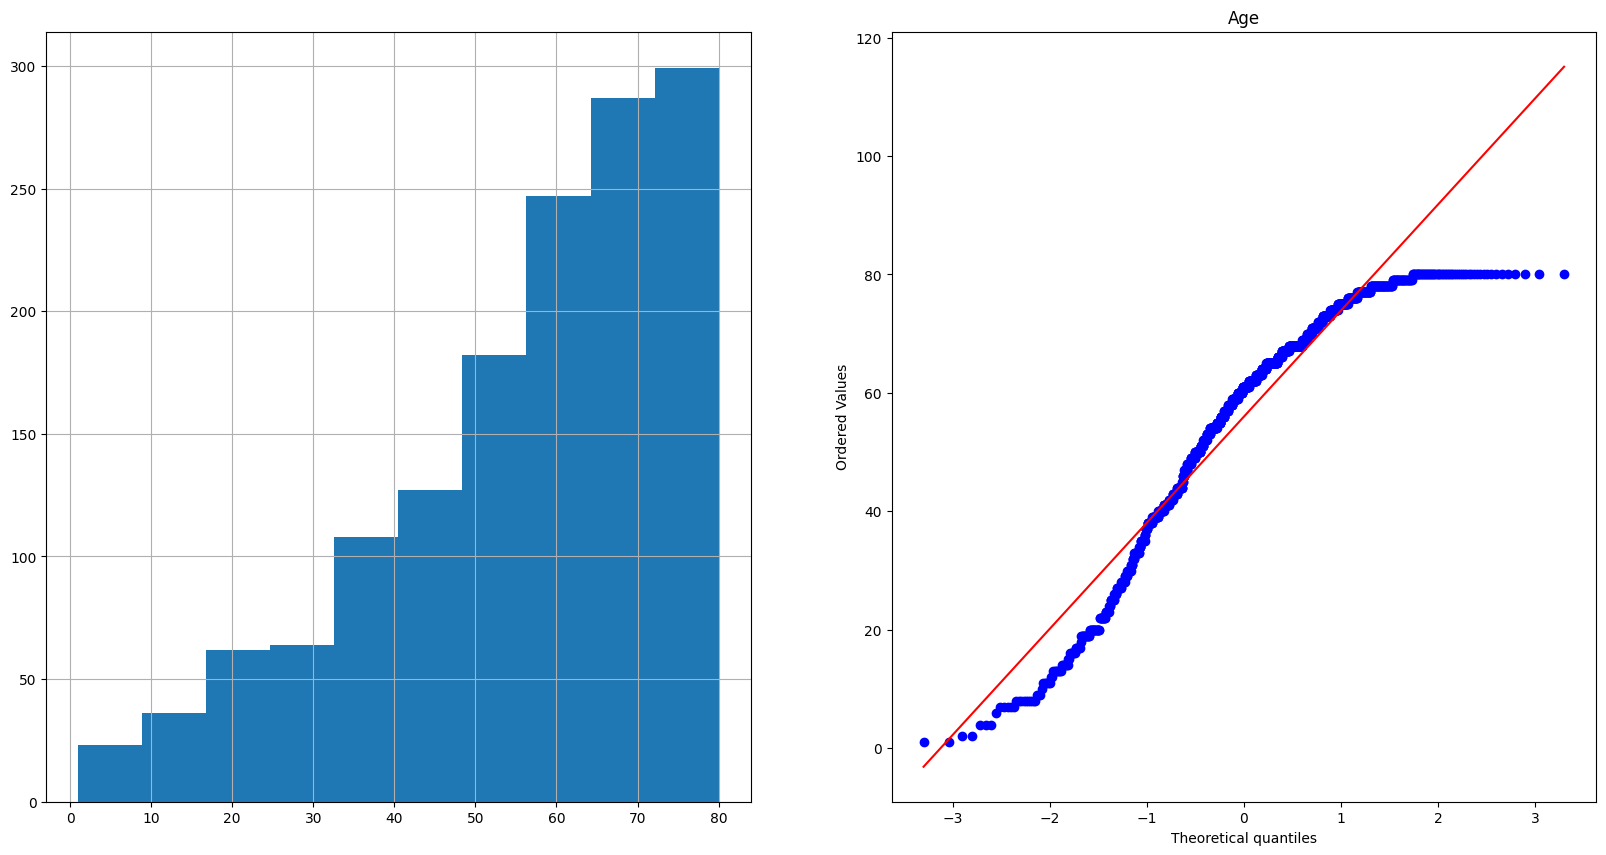

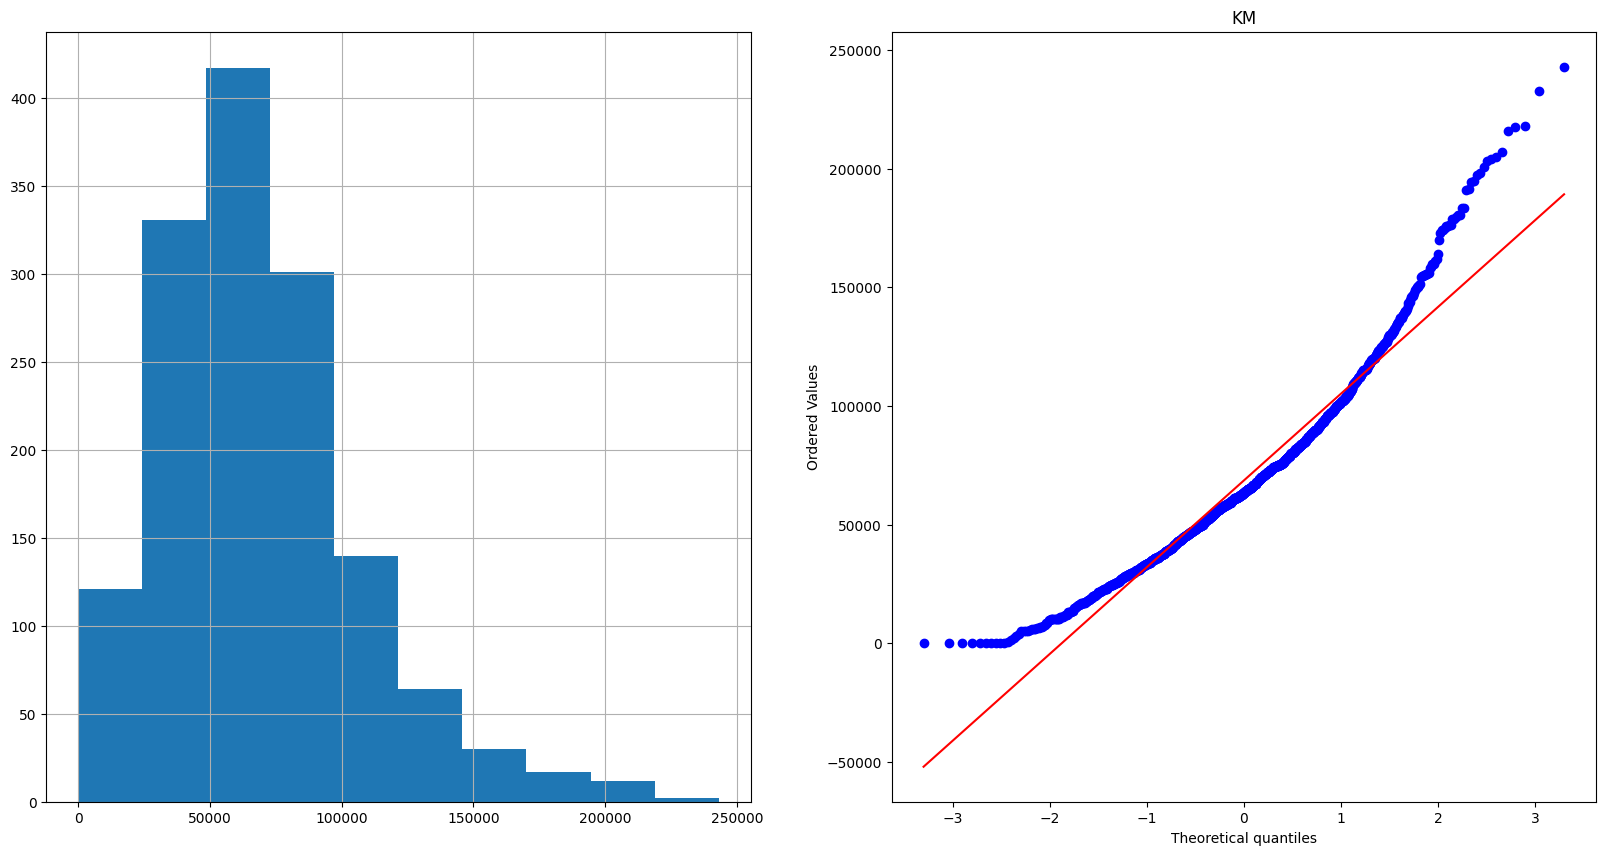

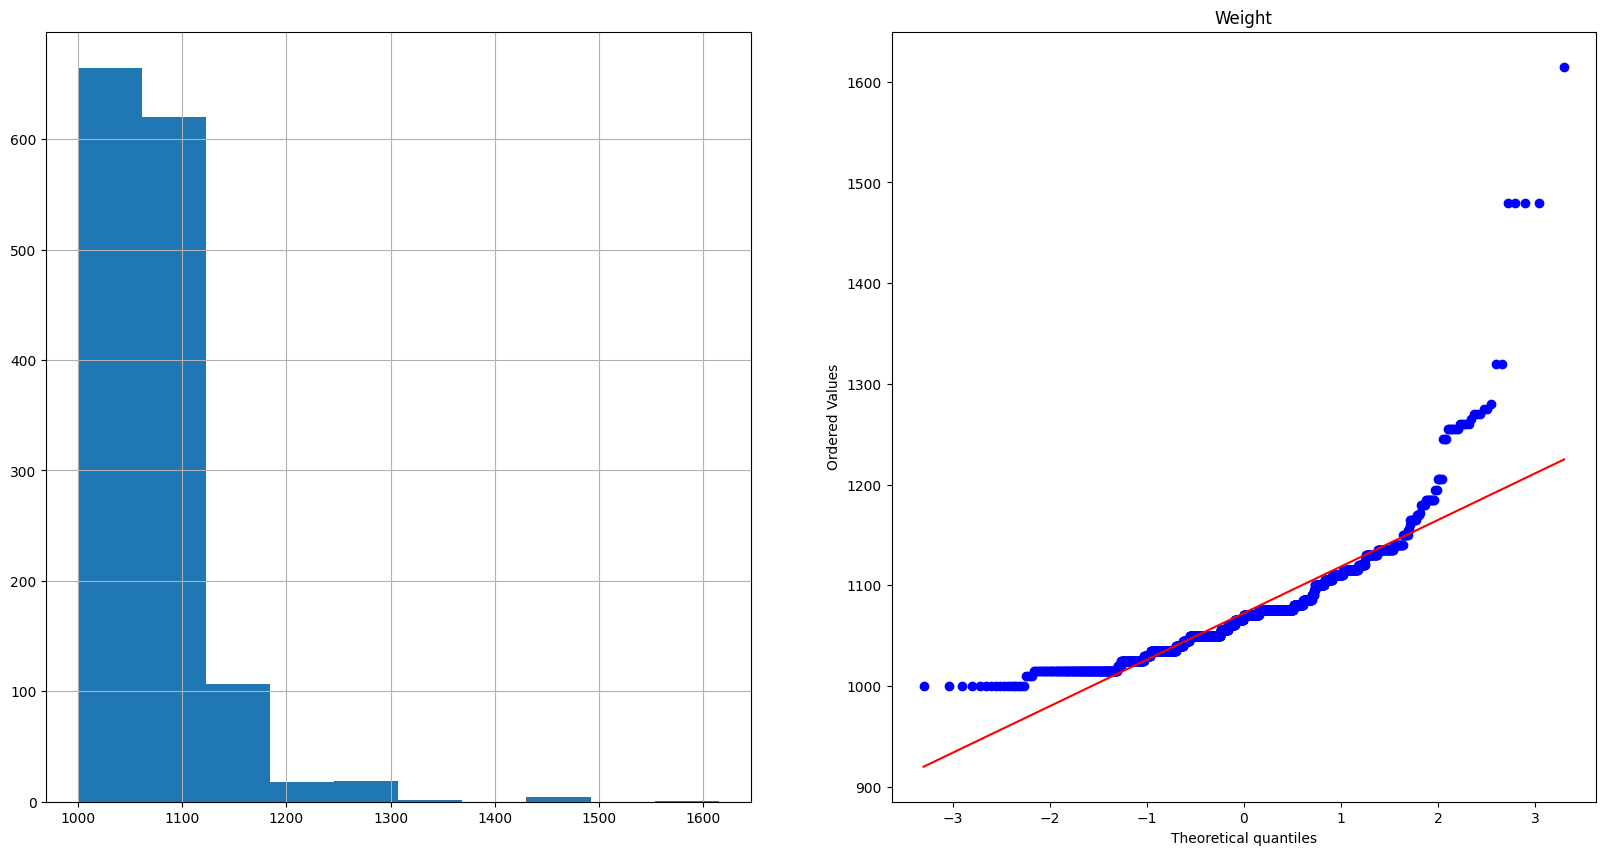

In [39]:
df=data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])
plot_data(data, 'Price')
plt.title('Price')
plot_data(data, 'Age')
plt.title('Age')
plot_data(data, 'KM')
plt.title('KM')
plot_data(data, 'Weight')
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

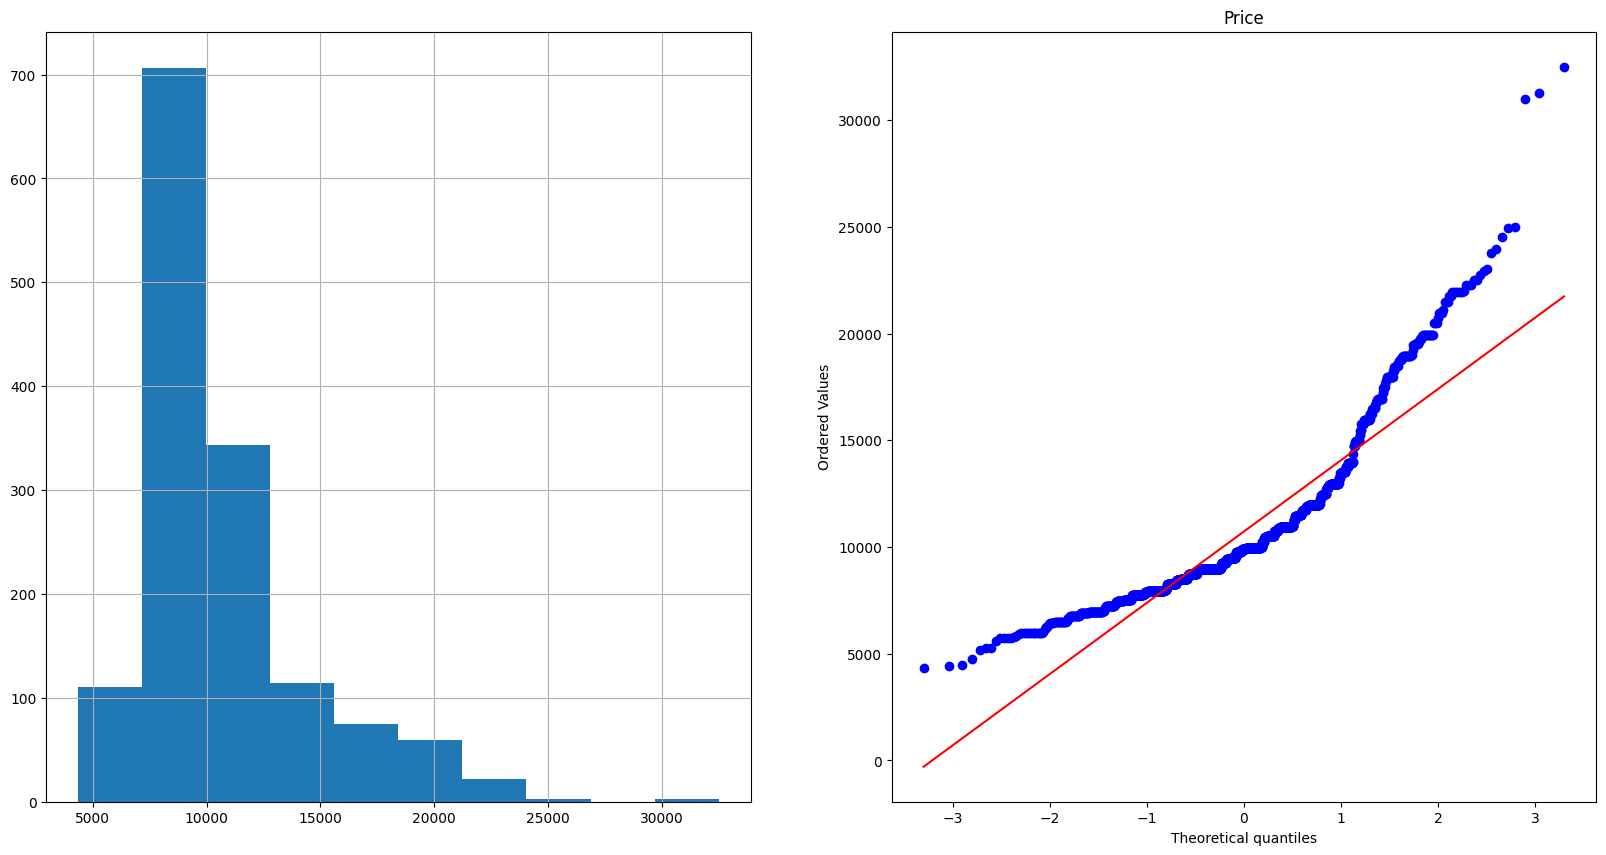

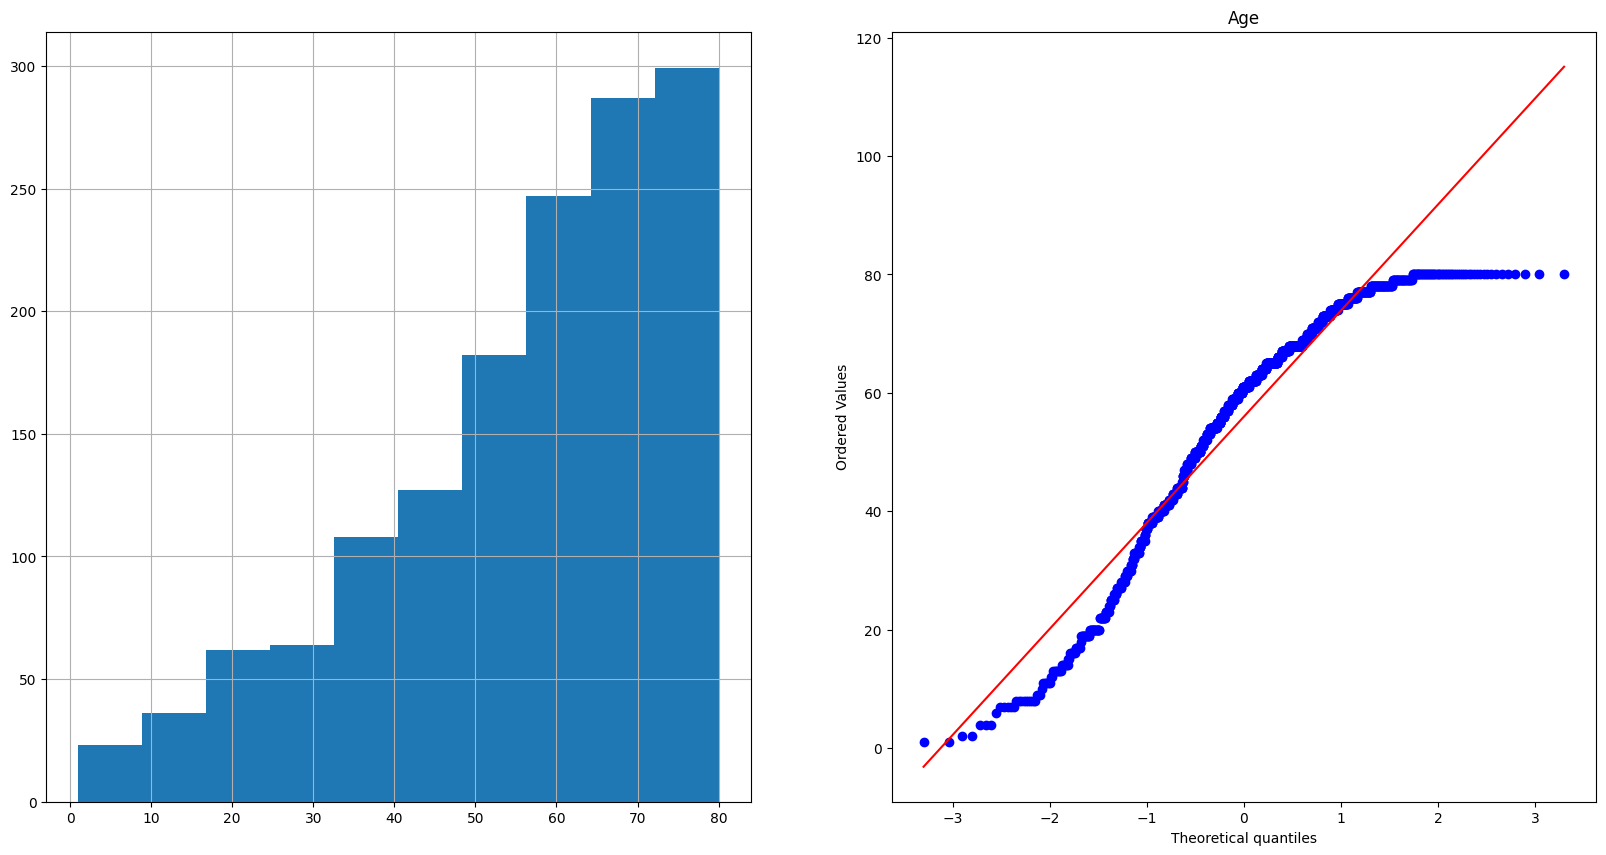

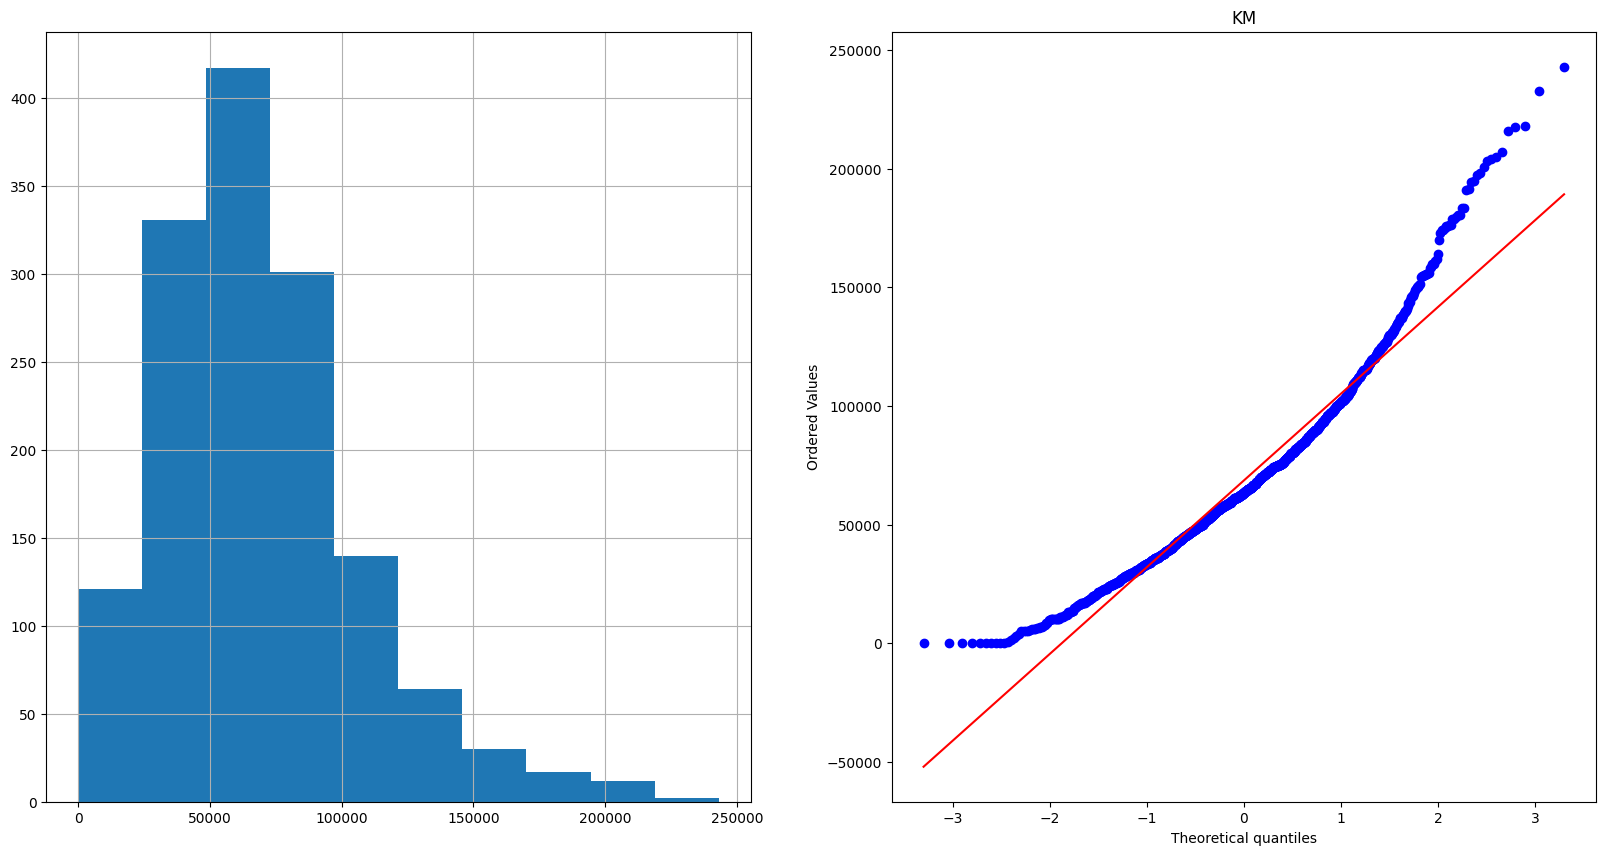

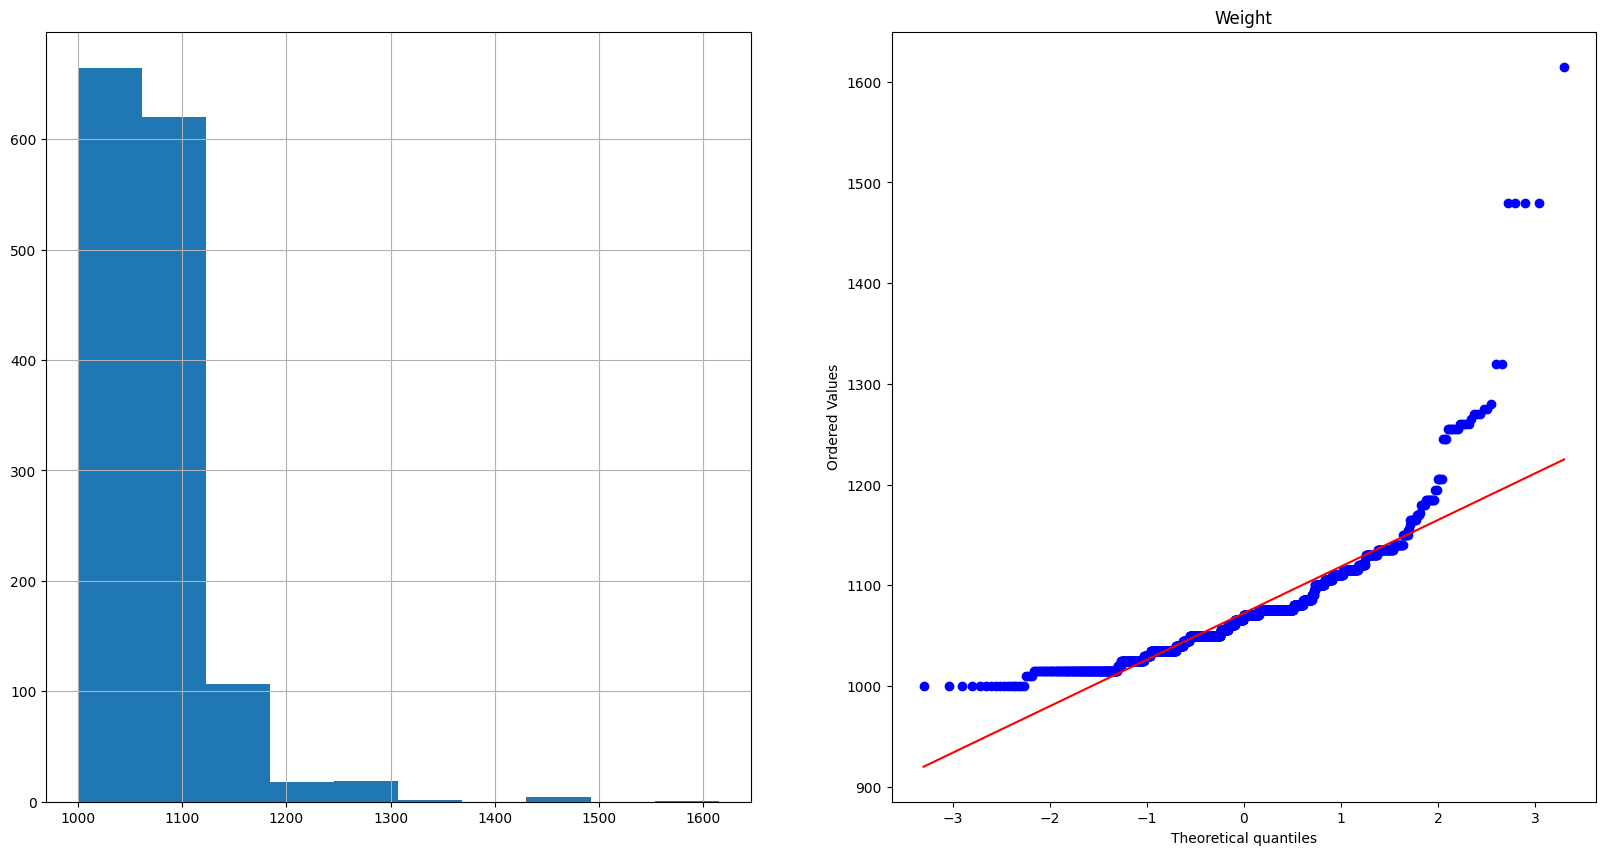

In [40]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])
plot_data(data, 'Price')
plt.title('Price')
plot_data(data, 'Age')
plt.title('Age')
plot_data(data, 'KM')
plt.title('KM')
plot_data(data, 'Weight')
plt.title('Weight')

In [41]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [42]:
from scipy.stats import shapiro

In [43]:
### Perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age feature',shapiro(data.Age),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))

Price feature ShapiroResult(statistic=0.8534721682412996, pvalue=1.595778782735417e-34) 
Age feature ShapiroResult(statistic=0.926695692395398, pvalue=6.73996815062802e-26) 
Weight feature ShapiroResult(statistic=0.7825540643634167, pvalue=5.0427383782127665e-40) 
KM feature ShapiroResult(statistic=0.947581681921263, pvalue=3.4417651852891183e-22)


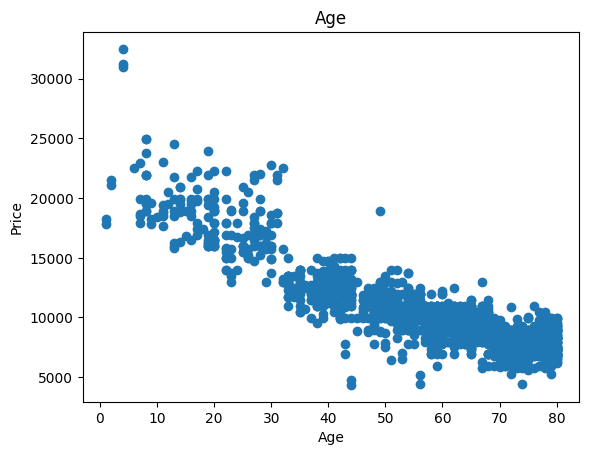

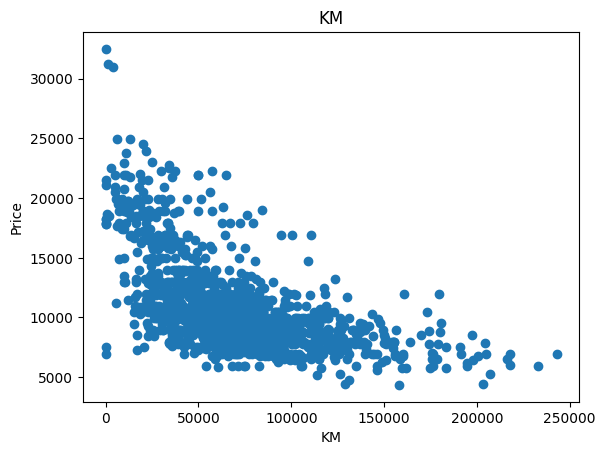

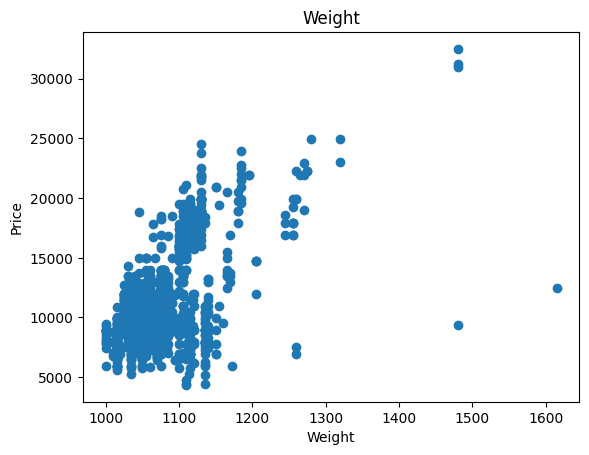

In [44]:
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

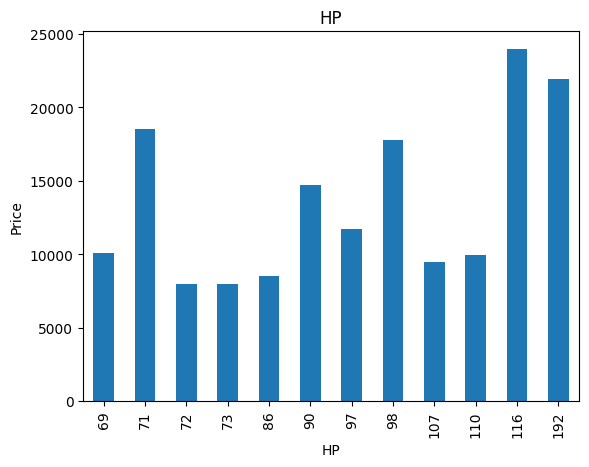

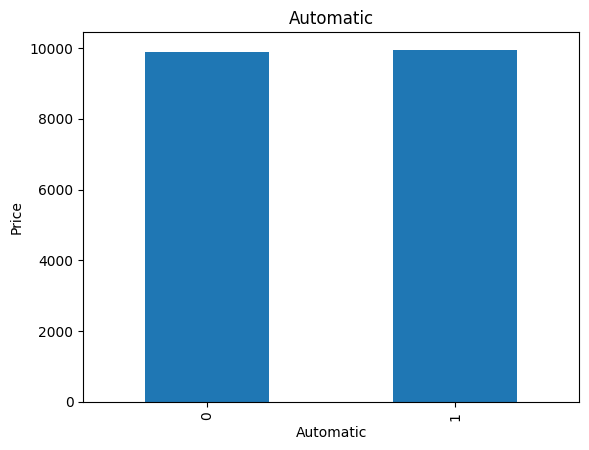

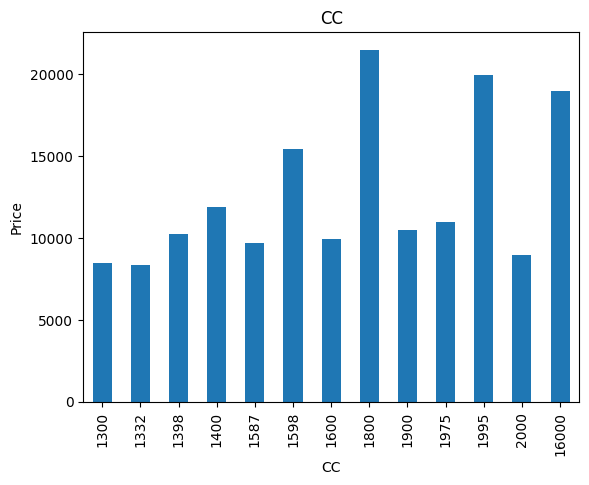

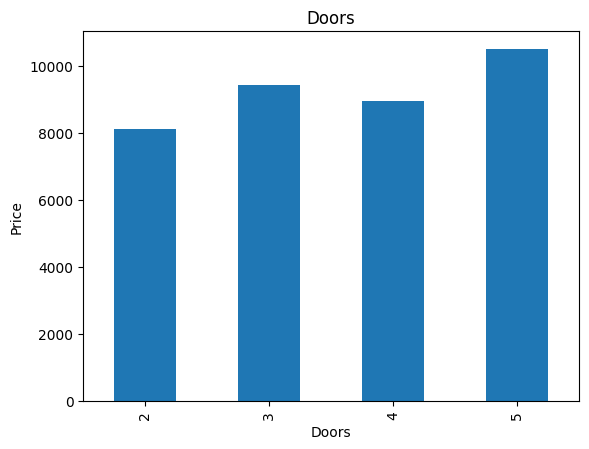

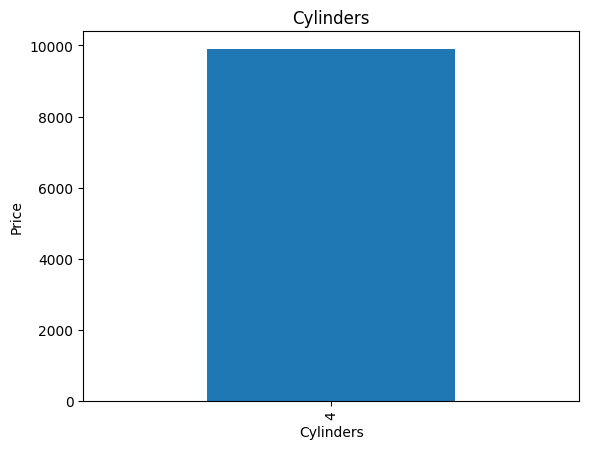

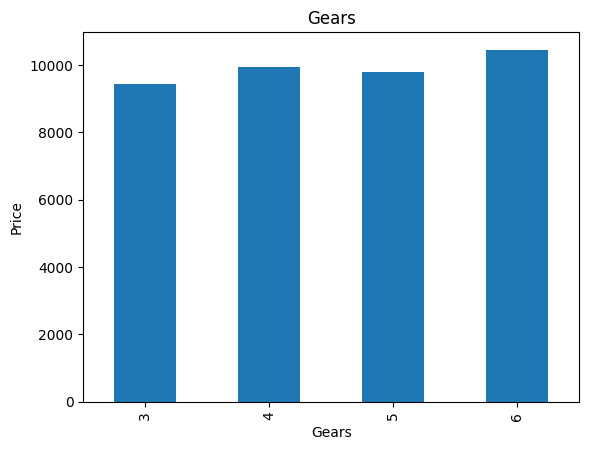

In [45]:
for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

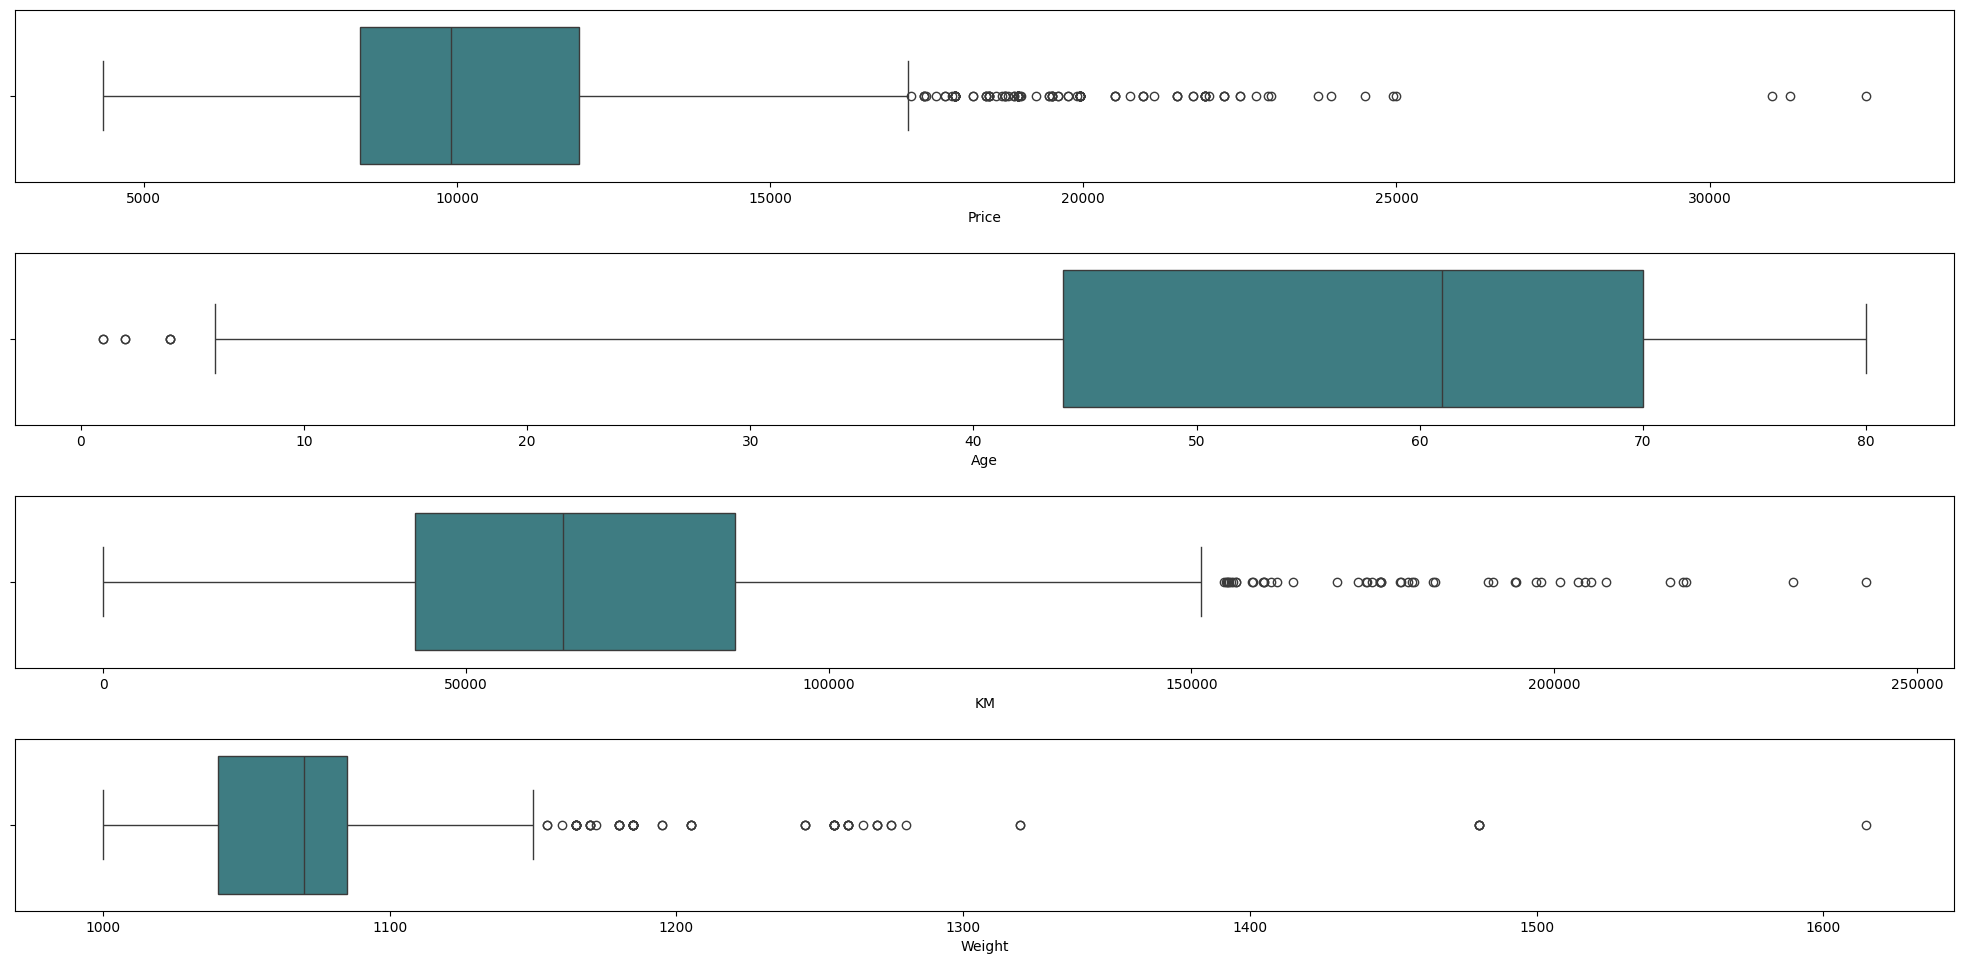

In [46]:
df=data.copy()
fig, axes=plt.subplots(4,1,figsize=(20,10), sharex=False,sharey=False)
sns.boxplot(x='Price',data=df, palette='crest', ax=axes[0])
sns.boxplot(x='Age',data=df, palette='crest', ax=axes[1])
sns.boxplot(x='KM',data=df, palette='crest', ax=axes[2])
sns.boxplot(x='Weight',data=df, palette='crest', ax=axes[3])
plt.tight_layout(pad=2.0)

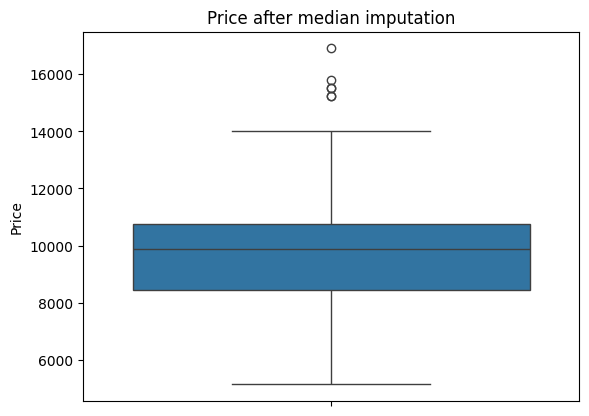

In [47]:
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

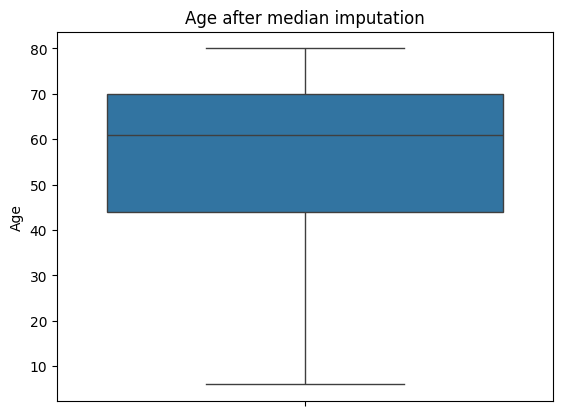

In [48]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

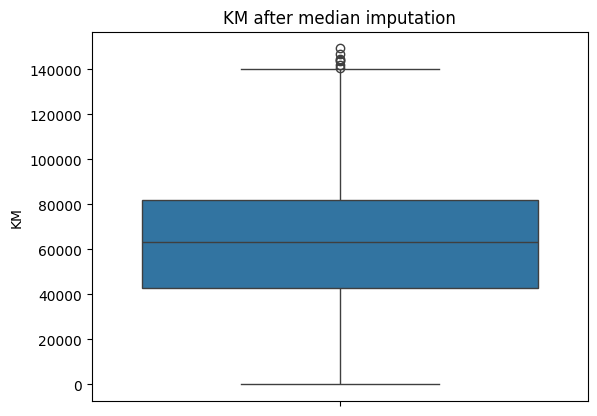

In [49]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

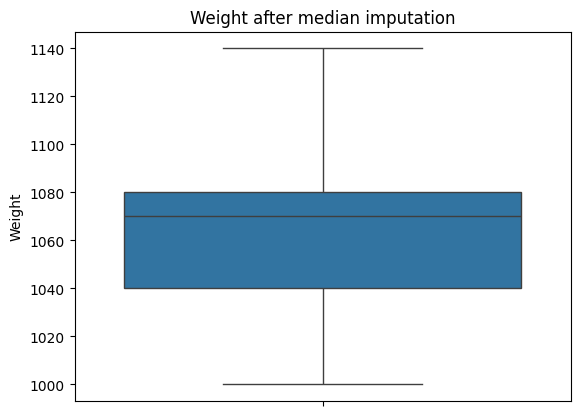

In [50]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

In [51]:
# Finding rsquared values
after_median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj

(0.34204996085646155, 0.3406706106695778)

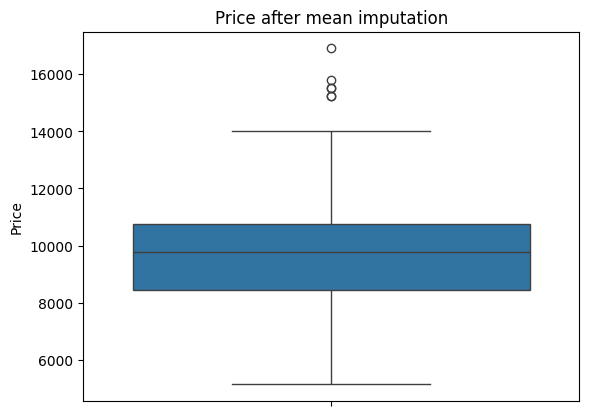

In [52]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

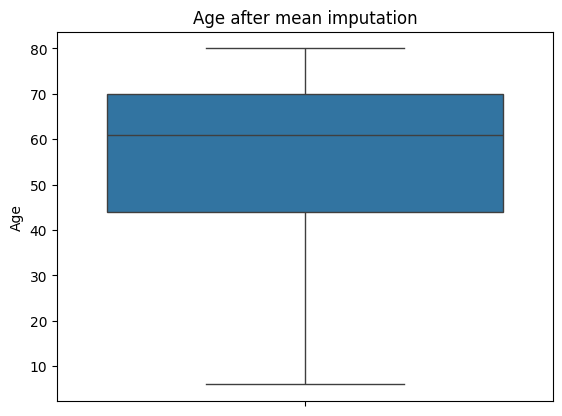

In [53]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

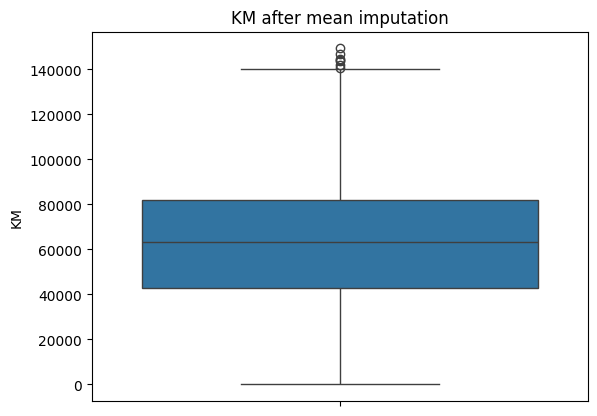

In [54]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

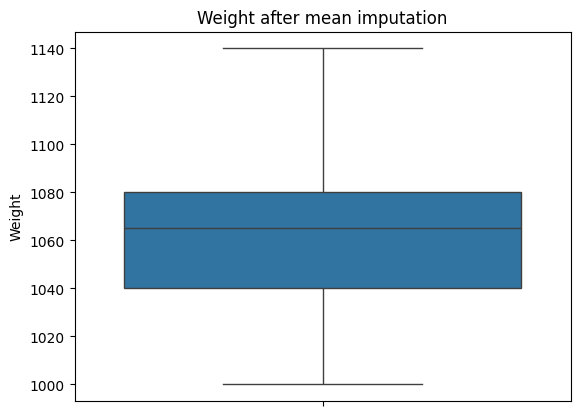

In [55]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

In [56]:
## ng rsquared values
ean_imputation_model = smf.ols('Price~Age+KM+Weight', data=df2).fit()
ean_imputation_model.rsquared, after_median_imputation_model.rsquared_adj

(0.3879621958171299, 0.3406706106695778)

In [58]:
df3=data.copy()
def drop_outliers(data, field_name):
  iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
  data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
  data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

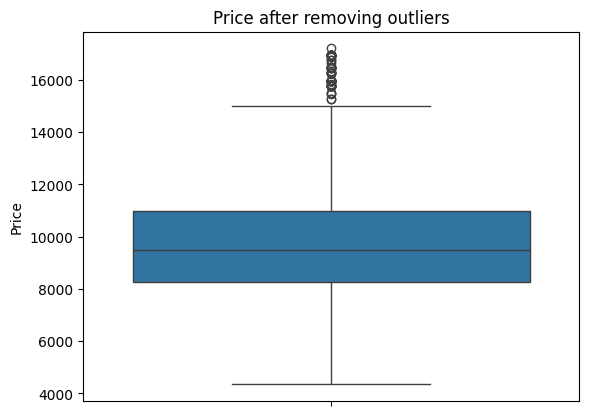

In [59]:
drop_outliers(df3,'Price')
sns.boxplot(df3.Price)
plt.title("Price after removing outliers")

Text(0.5, 1.0, 'Age after removing outliers')

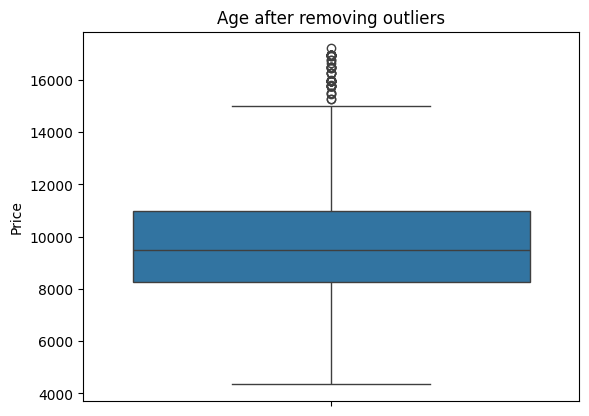

In [60]:
drop_outliers(df3,'Age')
sns.boxplot(df3.Price)
plt.title("Age after removing outliers")

Text(0.5, 1.0, 'KM after removing outliers')

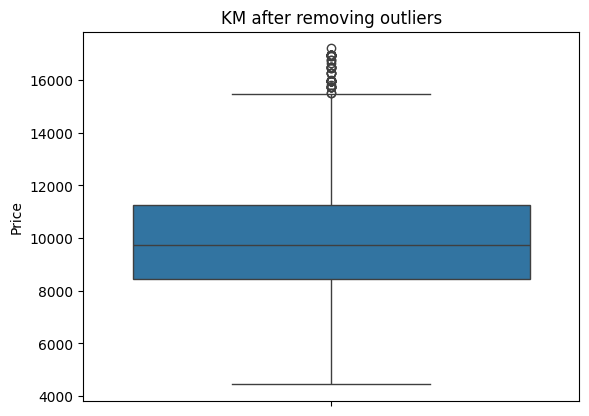

In [61]:
drop_outliers(df3,'KM')
sns.boxplot(df3.Price)
plt.title("KM after removing outliers")

In [62]:
## Finding rsquared values
removed_outlier_model = smf.ols("Price~Age+KM+Weight", data = df3 ).fit()
removed_outlier_model.rsquared, removed_outlier_model.rsquared_adj

(0.7674116644541189, 0.7668609422705059)

In [63]:
np.sqrt(removed_outlier_model.mse_resid)

1108.7145118436365

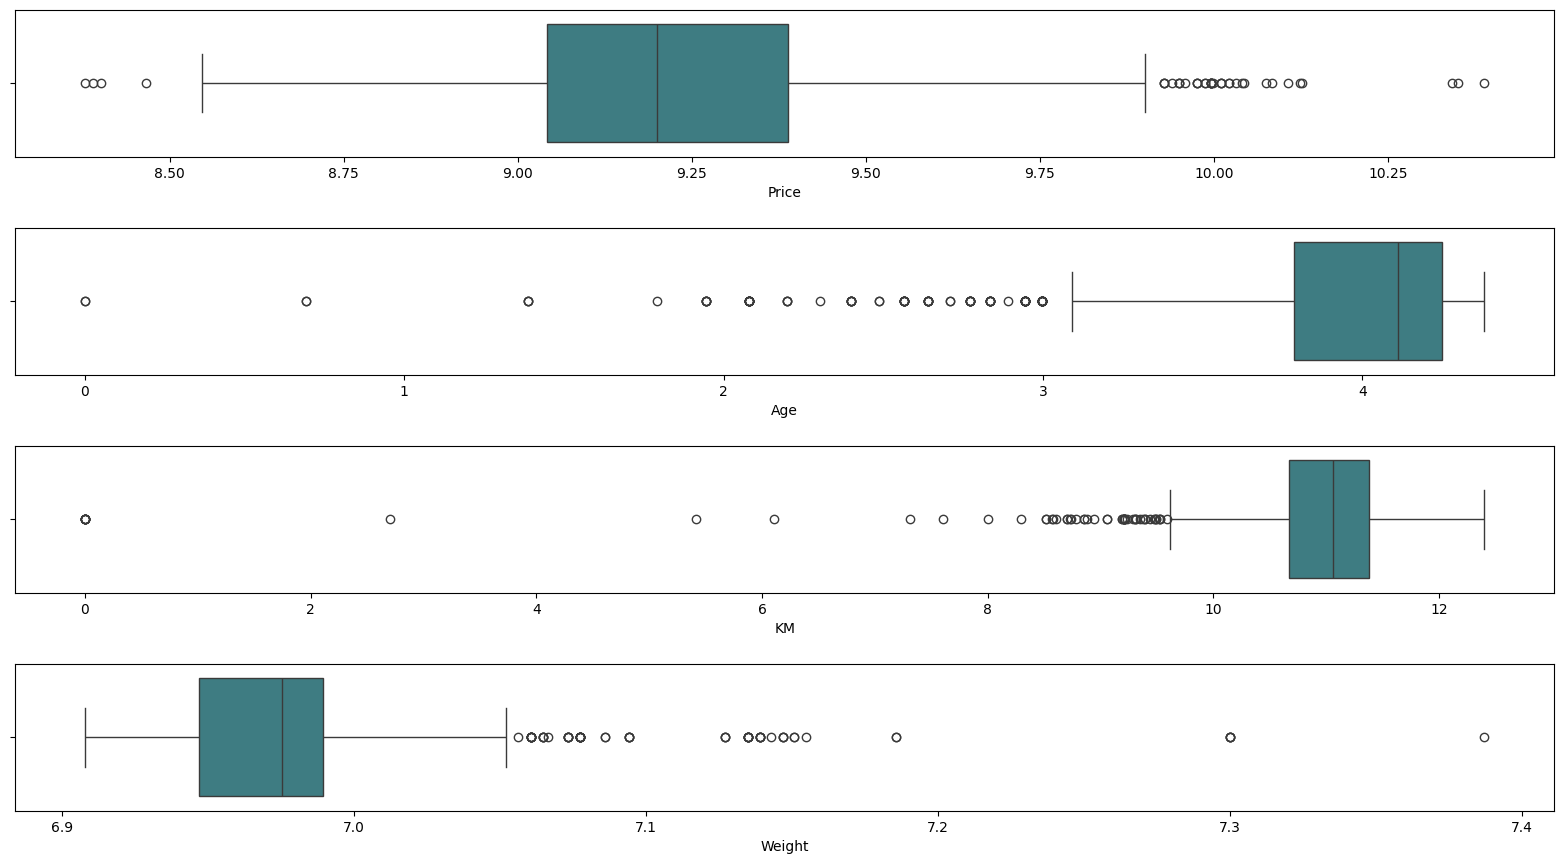

In [64]:
df=data.copy()
df[continuous_feature] = np.log(df[continuous_feature])
fig, axis=plt.subplots(4,1,figsize=(16,9),sharex=False, sharey=False)
sns.boxplot(x='Price', data=df, palette="crest", ax=axis[0])
sns.boxplot(x='Age', data=df, palette="crest", ax=axis[1])
sns.boxplot(x='KM', data=df, palette="crest", ax=axis[2])
sns.boxplot(x='Weight', data=df, palette="crest", ax=axis[3])
plt.tight_layout(pad=2)

In [65]:
## Finding rsquared values
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature] = np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transfomed_model = smf.ols('Price~Age+KM+Weight', data = cube_root_transfomed).fit()
cube_root_transfomed_model.rsquared, cube_root_transfomed_model.rsquared_adj

(0.8146046800585907, 0.8142160106247512)

In [66]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [68]:
## Finding rsquared values
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+Automatic+Cylinders+Doors", data = data).fit()
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1116.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:11:03   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.5182     77.575     -5.292      0.000    -562.692    -258.344
Age         -123.1434      2.635    -46.743      0.000    -128.311    -117.975
KM            -0.0194      0.001    -15.816      0.000      -0.022      -0.017
Weight        18.4560      0.874     21.107      0.000      16.741      20.171
HP            28.4736      2.612     10.901      0.000      23.350      33.598
CC            -0.0991      0.090     -1.106      0.269      -0.275       0.077
Gears        674.4324    198.102      3.404      0.001     285.829    1063.035
Automatic    381.5559    158.204      2.412      0.016      71.219     691.893
Cylinders  -1642.0729    310.302     -5.292      0.000   -2250.770   -1033.376
Doors         -3.0516     40.012     -0.076      0.939     -81.540      75.436
==============================================================================
Omnibus:                      193.764   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1545.518
Skew:                          -0.349   Prob(JB):                         0.00
Kurtosis:                       8.036   Cond. No.                     1.47e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
np.sqrt(raw_data_model.mse_resid)

1343.1400812481984

In [70]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

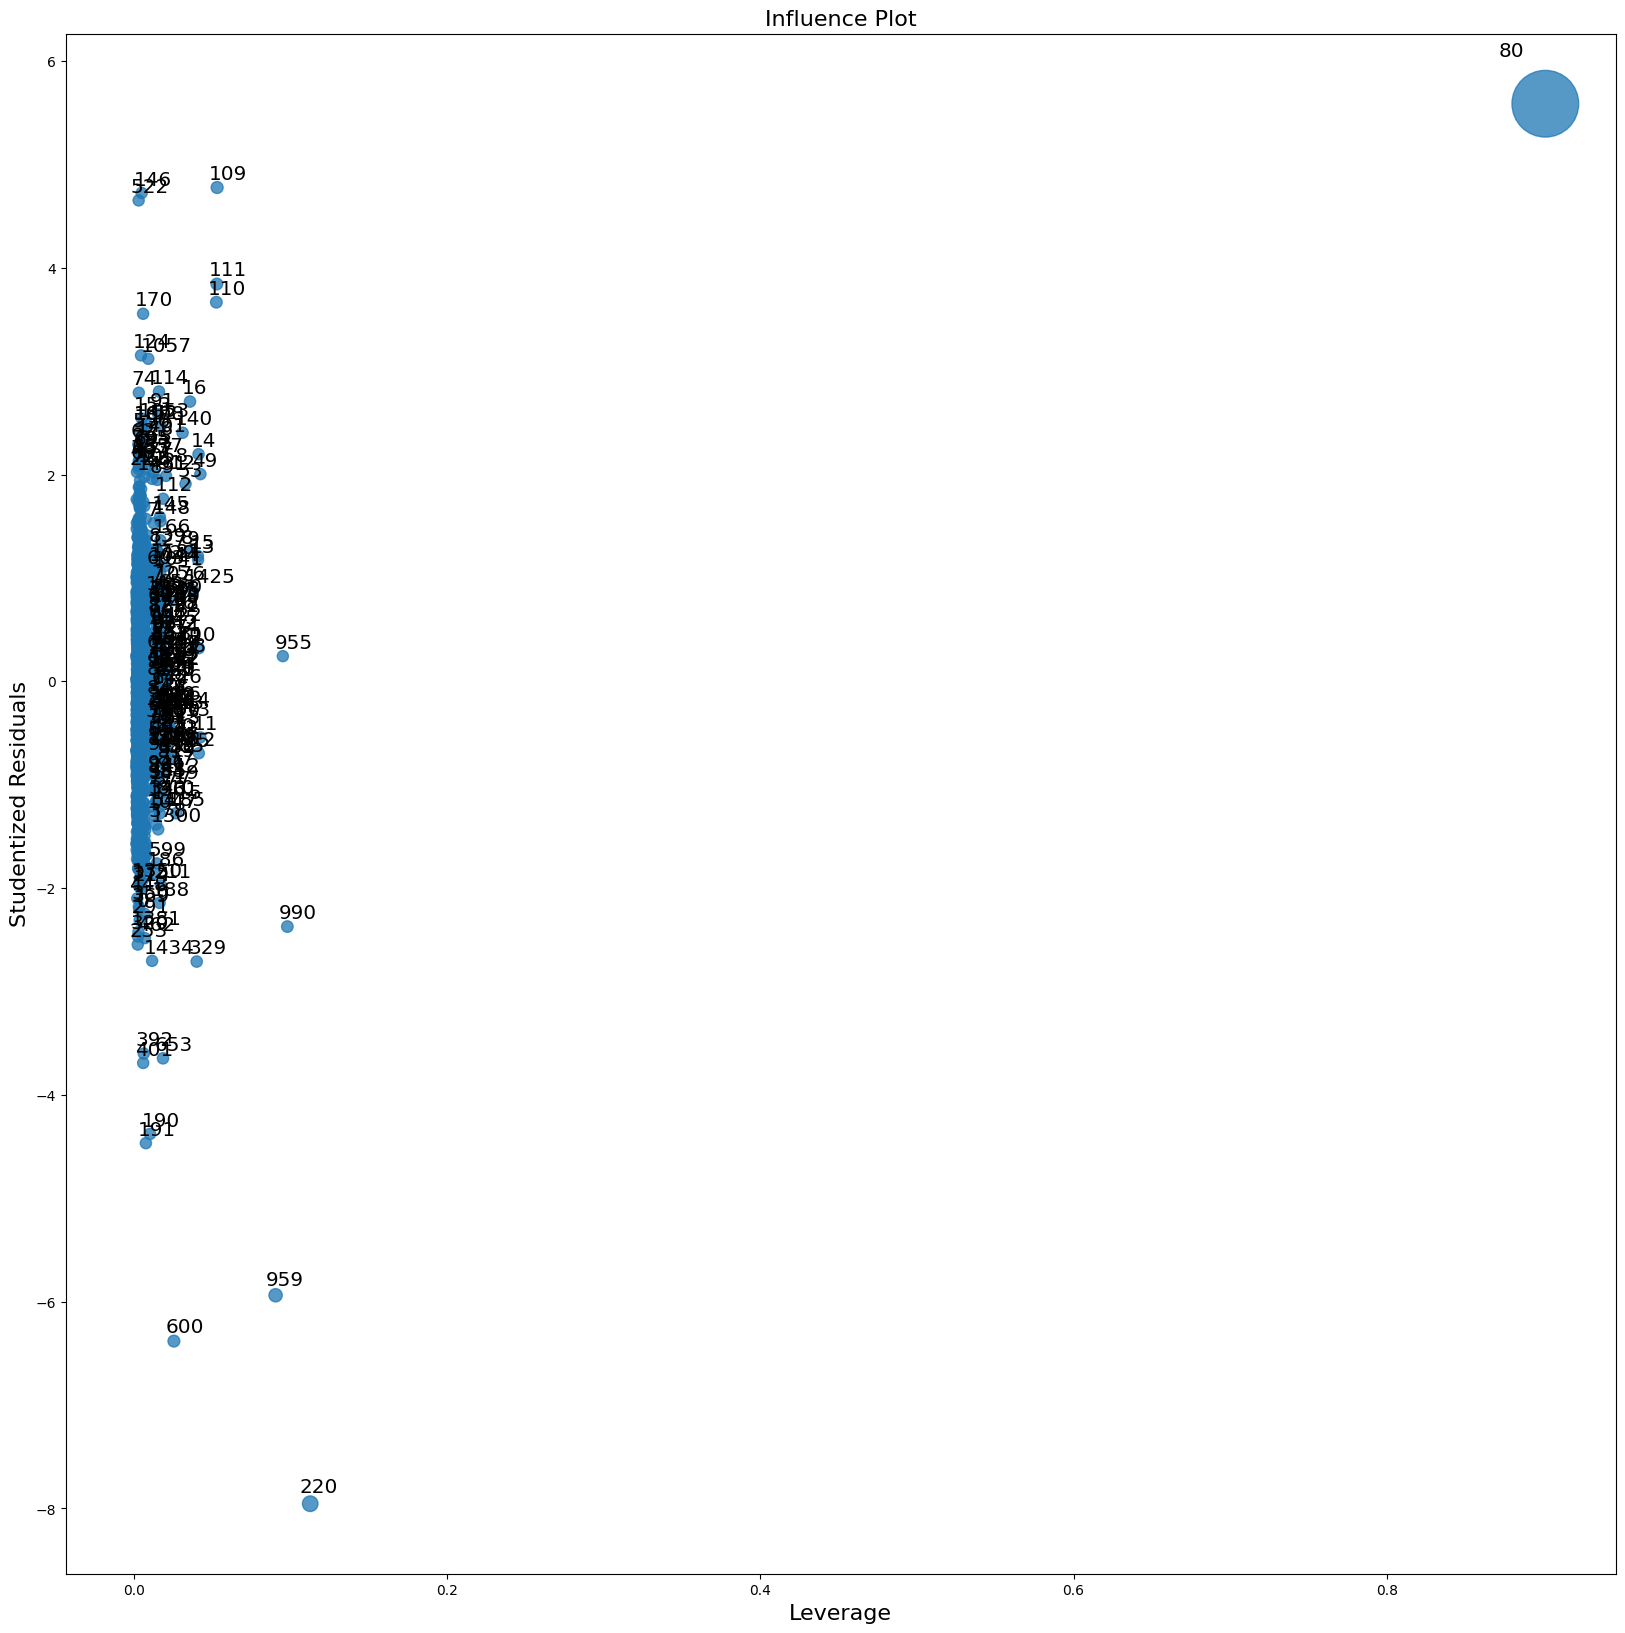

In [71]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

In [72]:
k=data.shape[1]
n=data.shape[0]
Leverage_cutoff = (3*(k+1))/n
print('Cut-pff line at', np.round(Leverage_cutoff,2))

Cut-pff line at 0.02


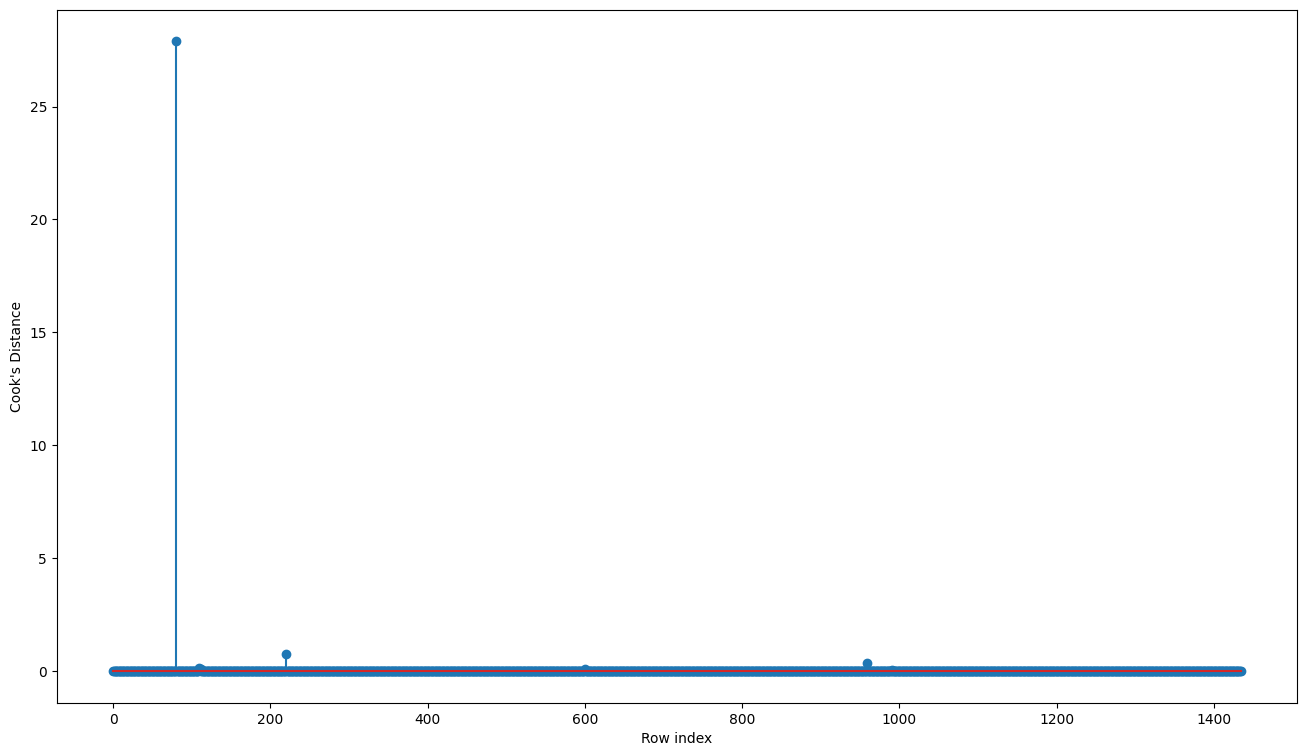

In [73]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [74]:
## Index and value of influencer where C>0.5
np.argmax(c), np.max(c)

(80, 27.892092351490973)

In [75]:
data[data.index.isin([80])]

Price  Age     KM   HP  Automatic     CC  Doors  Cylinders  Gears  Weight
80  18950   25  20019  110          1  16000      5          4      5    1180

In [76]:
## Discard the data points where are influencers and reassign theraw number
dataframe= data.copy()
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

Price  Age     KM  HP  Automatic    CC  Doors  Cylinders  Gears  Weight
0  13500   23  46986  90          0  2000      3          4      5    1165
1  13750   23  72937  90          0  2000      3          4      5    1165
2  13950   24  41711  90          0  2000      3          4      5    1165
3  14950   26  48000  90          0  2000      3          4      5    1165
4  13750   30  38500  90          0  2000      3          4      5    1170

In [77]:
data.shape

(1435, 10)

In [79]:
# Another Method
k=dataframe.shape[1]
n=dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Automatic+Cylinders+Weight',data=dataframe).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Automatic+Cylinders+Weight',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8895694600654983


In [80]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Automatic+Cylinders+Weight',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Automatic+Cylinders+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8890504756933633
Thus model accuracy is improved to 0.8893737644853392
Thus model accuracy is improved to 0.8887237441768024
Thus model accuracy is improved to 0.8881647892696043
Thus model accuracy is improved to 0.8876653014778908
Thus model accuracy is improved to 0.8892978254170044
Thus model accuracy is improved to 0.8902023138988819
Thus model accuracy is improved to 0.8906451600941402
Thus model accuracy is improved to 0.8917176913202307
Thus model accuracy is improved to 0.8911805273147785
Thus model accuracy is improved to 0.888518166768322
Thus model accuracy is improved to 0.8857783568266695
Thus model accuracy is improved to 0.8848628715741275
Thus model accuracy is improved to 0.8859534452778759
Thus model accuracy is improved to 0.8865081789252238
Thus model accuracy is improved to 0.8875717636727751
Thus model accuracy is improved to 0.8887187465207069
Thus model accuracy is improved to 0.8879951402140708
Thus model accuracy is improv

In [81]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [82]:
dataframe.shape

(1327, 10)

In [83]:
dataframe.head()

Price  Age     KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight
0  14950   26  48000   90          0  2000      3          4      5    1165
1  16900   27  94612   90          0  2000      3          4      5    1245
2  18600   30  75889   90          0  2000      3          4      5    1245
3  12950   23  71138   69          0  1900      3          4      5    1105
4  19950   22  43610  192          0  1800      3          4      6    1185

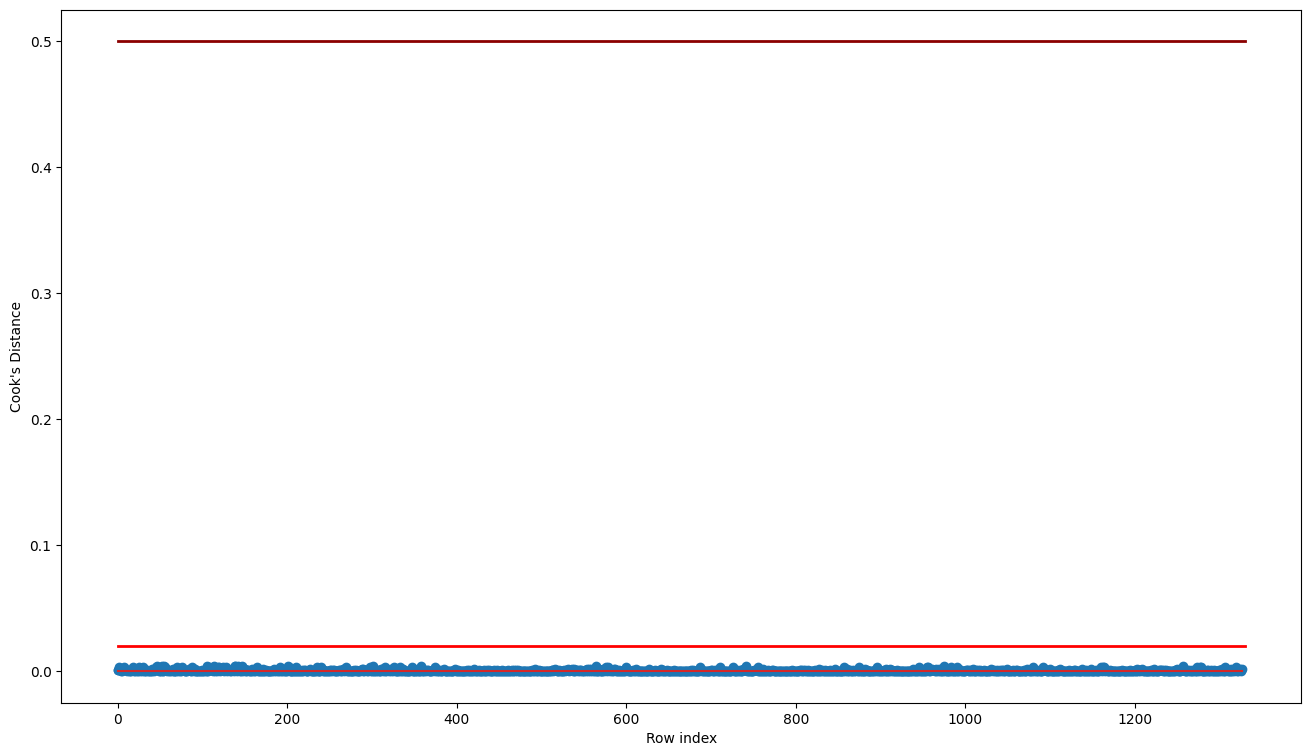

In [84]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [85]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1490.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:17:04   Log-Likelihood:                -11012.
No. Observations:                1327   AIC:                         2.204e+04
Df Residuals:                    1318   BIC:                         2.209e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -737.5504     81.718     -9.026      0.000    -897.862    -577.239
Age         -111.2126      2.201    -50.526      0.000    -115.531    -106.895
KM            -0.0152      0.001    -14.467      0.000      -0.017      -0.013
HP            20.3194      2.370      8.573      0.000      15.670      24.969
CC            -2.8349      0.263    -10.792      0.000      -3.350      -2.320
Doors       -145.0985     32.768     -4.428      0.000    -209.382     -80.815
Gears         78.2911    179.180      0.437      0.662    -273.217     429.800
Automatic     32.2181    130.779      0.246      0.805    -224.339     288.776
Cylinders  -2950.2016    326.871     -9.026      0.000   -3591.447   -2308.957
Weight        30.8850      1.306     23.654      0.000      28.324      33.446
==============================================================================
Omnibus:                        5.484   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.404
Skew:                           0.154   Prob(JB):                       0.0671
Kurtosis:                       3.054   Cond. No.                     1.45e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [86]:
np.sqrt(final_model.mse_resid)

975.572438844521

In [87]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

Age     Price         KM    Weight    CC  Doors   HP
0  3.258097  9.612467  10.778956  7.060476  2000      3   90
1  3.295837  9.735069  11.457540  7.126891  2000      3   90
2  3.401197  9.830917  11.237027  7.126891  2000      3   90
3  3.135494  9.468851  11.172377  7.007601  1900      3   69
4  3.091042  9.900984  10.683042  7.077498  1800      3  192

In [88]:
## Finding rsquared values for Log Transformatiom
log_transformed_model = smf.ols('Price~Age+KM+HP+CC+Doors+Weight', data = df_log_scaled).fit()
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     691.9
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:18:01   Log-Likelihood:                 818.18
No. Observations:                1327   AIC:                            -1622.
Df Residuals:                    1320   BIC:                            -1586.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0096      1.344     -3.727      0.000      -7.646      -2.373
Age           -0.4090      0.013    -30.629      0.000      -0.435      -0.383
KM             0.0164      0.006      2.882      0.004       0.005       0.028
HP             0.0032      0.000     10.843      0.000       0.003       0.004
CC            -0.0003   3.38e-05     -7.839      0.000      -0.000      -0.000
Doors         -0.0033      0.004     -0.770      0.441      -0.012       0.005
Weight         2.2626      0.196     11.521      0.000       1.877       2.648
==============================================================================
Omnibus:                      301.889   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1235.703
Skew:                          -1.033   Prob(JB):                    4.68e-269
Kurtosis:                       7.252   Cond. No.                     5.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']
df_cbrt_scaled['Cylinders'] = dataframe['Cylinders']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

Age      Price         KM     Weight    CC  Cylinders  Doors  Gears  \
0  2.962496  24.634688  36.342412  10.522251  2000          4      3      5   
1  3.000000  25.662299  45.566822  10.757791  2000          4      3      5   
2  3.107233  26.495431  42.337604  10.757791  2000          4      3      5   
3  2.843867  23.483163  41.434988  10.338418  1900          4      3      5   
4  2.802039  27.121537  35.198868  10.582122  1800          4      3      6   

    HP  
0   90  
1   90  
2   90  
3   69  
4  192

In [91]:
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Cylinders+Weight", data = df_cbrt_scaled).fit()
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1103.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:19:22   Log-Likelihood:                -1514.8
No. Observations:                1327   AIC:                             3046.
Df Residuals:                    1319   BIC:                             3087.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8481      0.190     -4.454      0.000      -1.222      -0.475
Age           -2.6003      0.069    -37.882      0.000      -2.735      -2.466
KM            -0.0409      0.004    -10.146      0.000      -0.049      -0.033
HP             0.0153      0.002      8.517      0.000       0.012       0.019
CC            -0.0012      0.000     -5.928      0.000      -0.002      -0.001
Doors         -0.0185      0.025     -0.730      0.466      -0.068       0.031
Gears          0.2574      0.139      1.851      0.064      -0.015       0.530
Cylinders     -3.3923      0.762     -4.454      0.000      -4.886      -1.898
Weight         4.5690      0.328     13.950      0.000       3.927       5.212
==============================================================================
Omnibus:                      144.683   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.795
Skew:                          -0.589   Prob(JB):                     2.77e-84
Kurtosis:                       5.360   Cond. No.                     2.98e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']
df_sqrt_scaled['Cylinders'] = dataframe['Cylinders']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

Age       Price          KM     Weight    CC  Cylinders  Doors  Gears  \
0  5.099020  122.270193  219.089023  34.132096  2000          4      3      5   
1  5.196152  130.000000  307.590637  35.284558  2000          4      3      5   
2  5.477226  136.381817  275.479582  35.284558  2000          4      3      5   
3  4.795832  113.798067  266.717079  33.241540  1900          4      3      5   
4  4.690416  141.244469  208.830074  34.423829  1800          4      3      6   

    HP  
0   90  
1   90  
2   90  
3   69  
4  192

In [93]:
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Cylinders+Weight", data = df_sqrt_scaled).fit()
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1396.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:20:16   Log-Likelihood:                -3985.1
No. Observations:                1327   AIC:                             7986.
Df Residuals:                    1319   BIC:                             8028.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1582      0.795     -5.231      0.000      -5.718      -2.599
Age           -6.8166      0.154    -44.189      0.000      -7.119      -6.514
KM            -0.0363      0.003    -12.949      0.000      -0.042      -0.031
HP             0.0964      0.012      8.283      0.000       0.074       0.119
CC            -0.0082      0.001     -6.329      0.000      -0.011      -0.006
Doors         -0.2052      0.163     -1.258      0.208      -0.525       0.115
Gears          1.6695      0.895      1.866      0.062      -0.086       3.425
Cylinders    -16.6330      3.180     -5.231      0.000     -22.870     -10.396
Weight         6.9609      0.433     16.067      0.000       6.111       7.811
==============================================================================
Omnibus:                       24.321   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.185
Skew:                          -0.199   Prob(JB):                     3.77e-08
Kurtosis:                       3.678   Cond. No.                     3.02e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

Price       Age        KM   HP  Automatic    CC  Doors  Cylinders  \
0  1.545455 -1.458333 -0.375306   90          0  2000      3          4   
1  2.136364 -1.416667  0.727010   90          0  2000      3          4   
2  2.651515 -1.291667  0.284235   90          0  2000      3          4   
3  0.939394 -1.583333  0.171879   69          0  1900      3          4   
4  3.060606 -1.625000 -0.479124  192          0  1800      3          4   

   Gears    Weight  
0      5  2.222222  
1      5  4.000000  
2      5  4.000000  
3      5  0.888889  
4      6  2.666667

In [95]:
## Finding rsquared values for robust transformation
robust_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Cylinders+Weight", data = df_robust_scaled).fit()
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1704.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:20:56   Log-Likelihood:                -261.29
No. Observations:                1327   AIC:                             538.6
Df Residuals:                    1319   BIC:                             580.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0499      0.018      2.794      0.005       0.015       0.085
Age           -0.8079      0.016    -51.798      0.000      -0.839      -0.777
KM            -0.1950      0.013    -14.545      0.000      -0.221      -0.169
HP             0.0062      0.001      8.601      0.000       0.005       0.008
CC            -0.0009   7.76e-05    -11.123      0.000      -0.001      -0.001
Doors         -0.0444      0.010     -4.537      0.000      -0.064      -0.025
Gears          0.0225      0.054      0.416      0.677      -0.084       0.129
Cylinders      0.1994      0.071      2.794      0.005       0.059       0.339
Weight         0.4224      0.017     24.752      0.000       0.389       0.456
==============================================================================
Omnibus:                        5.352   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.272
Skew:                           0.152   Prob(JB):                       0.0716
Kurtosis:                       3.052   Cond. No.                     2.98e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
from sklearn.preprocessing import StandardScaler
col_names = dataframe.columns
features = dataframe[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

Price       Age        KM        HP  Automatic        CC     Doors  \
0  1.447122 -1.738537 -0.576057 -0.900059  -0.226948  2.544908 -1.073349   
1  2.079907 -1.682414  0.762833 -0.900059  -0.226948  2.544908 -1.073349   
2  2.631566 -1.514046  0.225031 -0.900059  -0.226948  2.544908 -1.073349   
3  0.798111 -1.906905  0.088562 -2.553231  -0.226948  1.976023 -1.073349   
4  3.069648 -1.963028 -0.702156  7.129637  -0.226948  1.407137 -1.073349   

   Cylinders     Gears    Weight  
0        0.0 -0.149792  2.428821  
1        0.0 -0.149792  4.395022  
2        0.0 -0.149792  4.395022  
3        0.0 -0.149792  0.954170  
4        0.0  6.262258  2.920371

In [97]:
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Cylinders+Weight", data = df_standard_scaled).fit()
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1704.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:22:09   Log-Likelihood:                -352.15
No. Observations:                1327   AIC:                             720.3
Df Residuals:                    1319   BIC:                             761.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.937e-16      0.009   6.83e-14      1.000      -0.017       0.017
Age           -0.6423      0.012    -51.798      0.000      -0.667      -0.618
KM            -0.1719      0.012    -14.545      0.000      -0.195      -0.149
HP             0.0839      0.010      8.601      0.000       0.065       0.103
CC            -0.1625      0.015    -11.123      0.000      -0.191      -0.134
Doors         -0.0453      0.010     -4.537      0.000      -0.065      -0.026
Gears          0.0038      0.009      0.416      0.677      -0.014       0.021
Cylinders           0          0        nan        nan           0           0
Weight         0.4090      0.017     24.752      0.000       0.377       0.441
==============================================================================
Omnibus:                        5.352   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.272
Skew:                           0.152   Prob(JB):                       0.0716
Kurtosis:                       3.052   Cond. No.                     5.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.72e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Cylinders+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1704.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:22:35   Log-Likelihood:                -352.15
No. Observations:                1327   AIC:                             720.3
Df Residuals:                    1319   BIC:                             761.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.937e-16      0.009   6.83e-14      1.000      -0.017       0.017
Age           -0.6423      0.012    -51.798      0.000      -0.667      -0.618
KM            -0.1719      0.012    -14.545      0.000      -0.195      -0.149
HP             0.0839      0.010      8.601      0.000       0.065       0.103
CC            -0.1625      0.015    -11.123      0.000      -0.191      -0.134
Doors         -0.0453      0.010     -4.537      0.000      -0.065      -0.026
Gears          0.0038      0.009      0.416      0.677      -0.014       0.021
Cylinders           0          0        nan        nan           0           0
Weight         0.4090      0.017     24.752      0.000       0.377       0.441
==============================================================================
Omnibus:                        5.352   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.272
Skew:                           0.152   Prob(JB):                       0.0716
Kurtosis:                       3.052   Cond. No.                     5.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.72e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

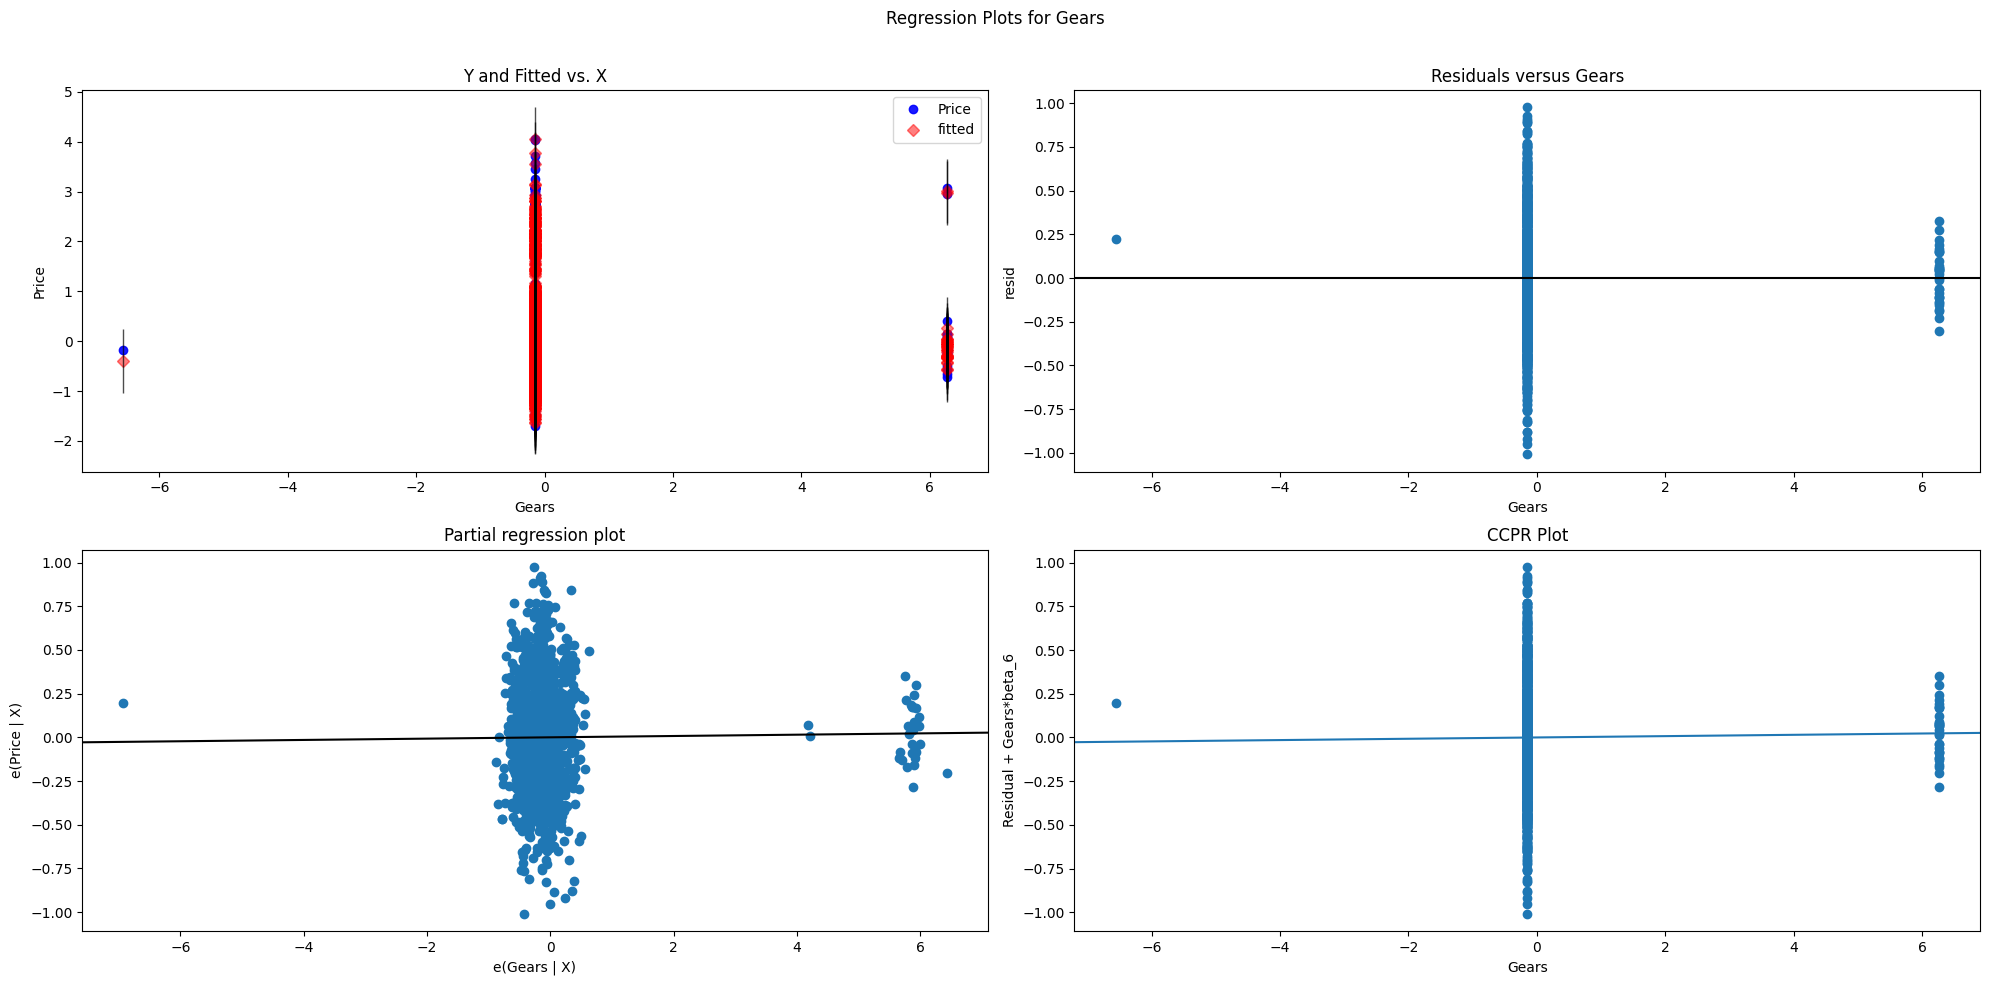

In [99]:
fig = plt.figure(figsize = (20,10))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

In [100]:
## Create a dataframe that will contain the names of all the features veriables and their respective VIF's
y = df_standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
8     Weight  3.94
4         CC  2.97
0        Age  2.14
1         KM  1.86
5      Doors  1.36
2         HP  1.26
3  Automatic  1.11
7      Gears  1.09
6  Cylinders   NaN

In [101]:
r_sqr_age = smf.ols('Age~HP+Weight+CC+Doors+Cylinders+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age+CC+Doors+Cylinders+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC~HP+Weight+Age+Doors+Cylinders+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Age+Weight+CC+Doors+Cylinders+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_cylinders = smf.ols('Cylinders~HP+Weight+CC+Doors+Age+Gears+KM', dataframe).fit().rsquared
vif_cylinders = 1/(1-r_sqr_cylinders)
r_sqr_km = smf.ols('KM~HP+Weight+CC+Doors+Cylinders+Gears+Age', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~HP+Weight+CC+Doors+Cylinders+Age+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~HP+Weight+CC+Age+Cylinders+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [102]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','Cylinders','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_cylinders,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

VIF
Variables          
Cylinders  0.000000
Gears      1.079630
HP         1.260297
Doors      1.321711
KM         1.850392
Age        2.037633
CC         2.828593
Weight     3.617775

In [103]:
#Simple Linear Model using QT
cylinders_model = smf.ols('Price~Cylinders', data=df_standard_scaled).fit()
cylinders_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                nan
Time:                        19:27:51   Log-Likelihood:                -1882.9
No. Observations:                1327   AIC:                             3768.
Df Residuals:                    1326   BIC:                             3773.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.557e-15      0.027  -9.31e-14      1.000      -0.054       0.054
Cylinders           0          0        nan        nan           0           0
==============================================================================
Omnibus:                      298.911   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.837
Skew:                           1.357   Prob(JB):                    9.97e-123
Kurtosis:                       4.673   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
gears_model = smf.ols('Price~Gears', data=df_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06681
Date:                Fri, 09 Aug 2024   Prob (F-statistic):              0.796
Time:                        19:28:13   Log-Likelihood:                -1882.9
No. Observations:                1327   AIC:                             3770.
Df Residuals:                    1325   BIC:                             3780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.557e-15      0.027  -9.31e-14      1.000      -0.054       0.054
Gears          0.0071      0.027      0.258      0.796      -0.047       0.061
==============================================================================
Omnibus:                      299.161   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.368
Skew:                           1.358   Prob(JB):                    7.65e-123
Kurtosis:                       4.672   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
gears_cylinders_weight_model = smf.ols('Price~Gears+Cylinders', data=df_standard_scaled).fit()
gears_cylinders_weight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06681
Date:                Fri, 09 Aug 2024   Prob (F-statistic):              0.796
Time:                        19:28:58   Log-Likelihood:                -1882.9
No. Observations:                1327   AIC:                             3770.
Df Residuals:                    1325   BIC:                             3780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.586e-15      0.027  -9.41e-14      1.000      -0.054       0.054
Gears          0.0071      0.027      0.258      0.796      -0.047       0.061
Cylinders           0          0        nan        nan           0           0
==============================================================================
Omnibus:                      299.161   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.368
Skew:                           1.358   Prob(JB):                    7.65e-123
Kurtosis:                       4.672   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
# Dropping highly correlated variables and insignificant variables
x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)
x.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Cylinders',
       'Weight'],
      dtype='object')

In [108]:
model_1 = smf.ols('Price~Age+KM+HP+CC+Doors+Cylinders+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1990.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:30:08   Log-Likelihood:                -352.24
No. Observations:                1327   AIC:                             718.5
Df Residuals:                    1320   BIC:                             754.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.937e-16      0.009   6.84e-14      1.000      -0.017       0.017
Age           -0.6422      0.012    -51.817      0.000      -0.667      -0.618
KM            -0.1715      0.012    -14.559      0.000      -0.195      -0.148
HP             0.0847      0.010      8.875      0.000       0.066       0.103
CC            -0.1629      0.015    -11.176      0.000      -0.192      -0.134
Doors         -0.0462      0.010     -4.735      0.000      -0.065      -0.027
Cylinders           0          0        nan        nan           0           0
Weight         0.4097      0.016     24.925      0.000       0.377       0.442
==============================================================================
Omnibus:                        5.093   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.013
Skew:                           0.148   Prob(JB):                       0.0815
Kurtosis:                       3.050   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
data.corr()

Price       Age        KM        HP  Automatic        CC  \
Price      1.000000 -0.876273 -0.569420  0.314134   0.033928  0.124375   
Age       -0.876273  1.000000  0.504575 -0.155293   0.031354 -0.096549   
KM        -0.569420  0.504575  1.000000 -0.332904  -0.082168  0.103822   
HP         0.314134 -0.155293 -0.332904  1.000000   0.013313  0.035207   
Automatic  0.033928  0.031354 -0.082168  0.013313   1.000000  0.066934   
CC         0.124375 -0.096549  0.103822  0.035207   0.066934  1.000000   
Doors      0.183604 -0.146929 -0.035193  0.091803  -0.027492  0.079254   
Cylinders       NaN       NaN       NaN       NaN        NaN       NaN   
Gears      0.063831 -0.005629  0.014890  0.209642  -0.098582  0.014732   
Weight     0.575869 -0.466484 -0.023969  0.087143   0.058499  0.335077   

              Doors  Cylinders     Gears    Weight  
Price      0.183604        NaN  0.063831  0.575869  
Age       -0.146929        NaN -0.005629 -0.466484  
KM        -0.035193        NaN  0.014890 -0.023969  
HP         0.091803        NaN  0.209642  0.087143  
Automatic -0.027492        NaN -0.098582  0.058499  
CC         0.079254        NaN  0.014732  0.335077  
Doors      1.000000        NaN -0.160101  0.301734  
Cylinders       NaN        NaN       NaN       NaN  
Gears     -0.160101        NaN  1.000000  0.021238  
Weight     0.301734        NaN  0.021238  1.000000

<Axes: >

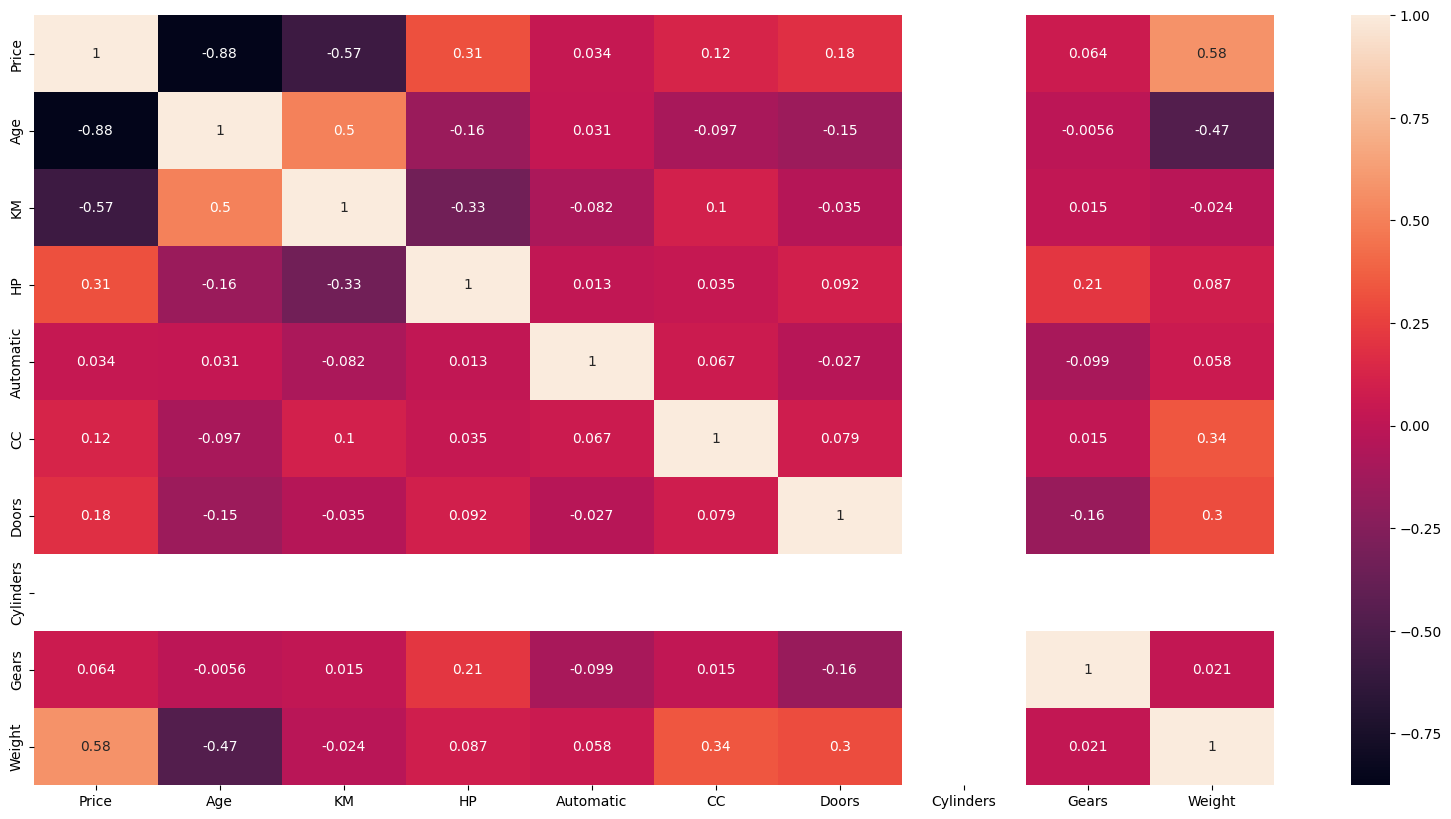

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

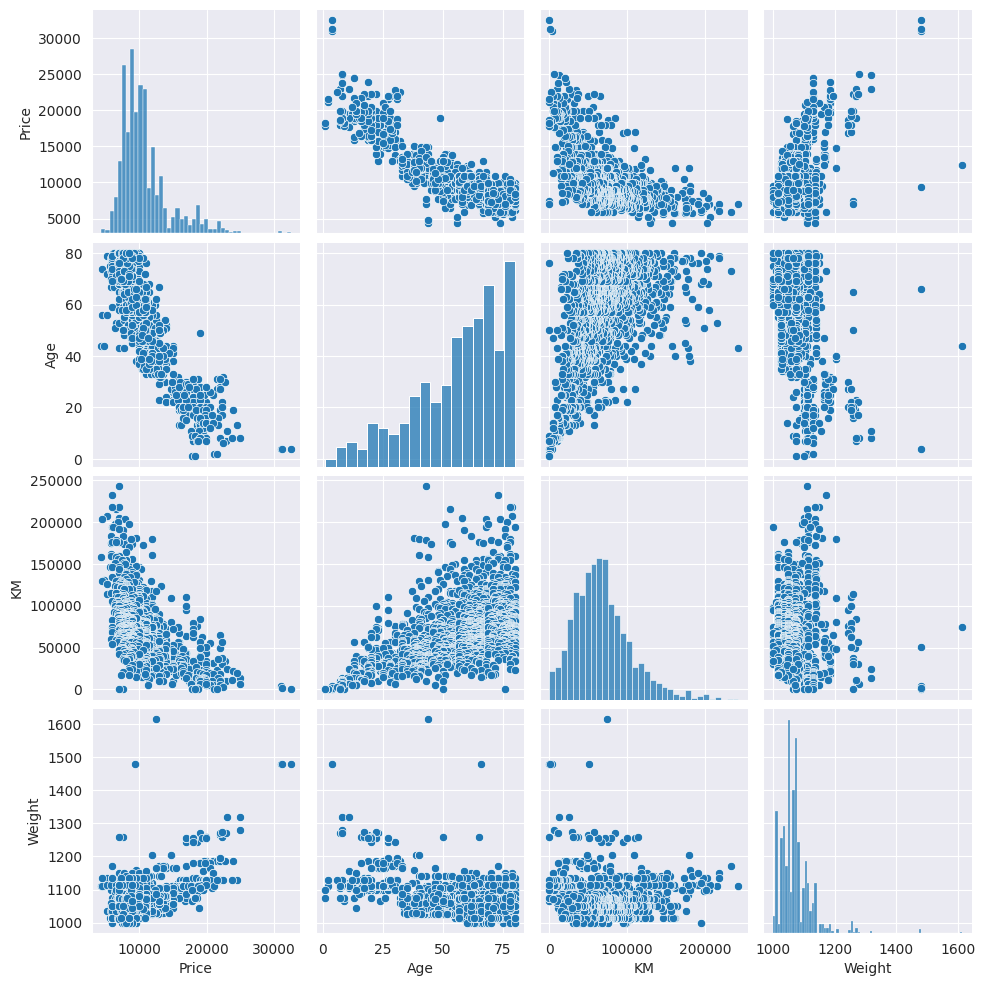

In [111]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature])

In [112]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]

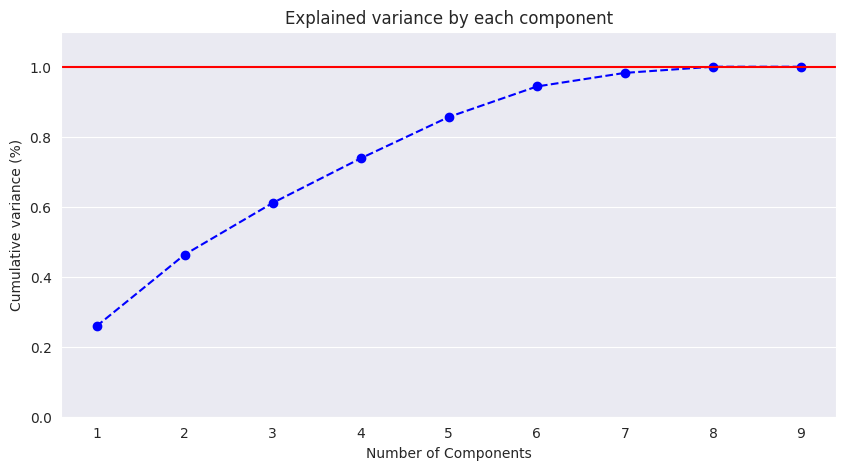

In [113]:
# PCA
pca_var = PCA()
pca_var.fit(x)
# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')
# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [114]:
# the amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([2.58556271e-01, 2.04503031e-01, 1.47708619e-01, 1.27491021e-01,
       1.18110772e-01, 8.71753972e-02, 3.88776270e-02, 1.75772630e-02,
       5.19577953e-35])

Text(0.5, 1.0, 'Explained variance by each component')

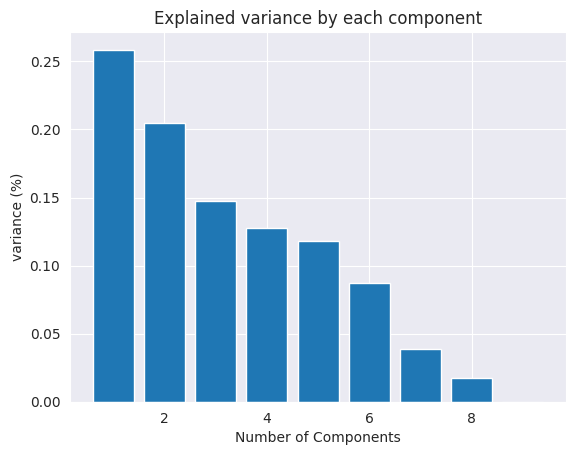

In [115]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [116]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 25.86,  46.31,  61.08,  73.83,  85.64,  94.36,  98.25, 100.01,
       100.01])

In [119]:
pca = PCA()
pca_std = pca.fit_transform(x)

# Generate column names dynamically to match the number of components
num_components = pca_std.shape[1]
column_names = [f'PC{i+1}' for i in range(num_components)]

pca_std_df = pd.DataFrame(data = pca_std, columns = column_names)
print(pca_std_df.shape)
pca_std_df.head()

(1327, 9)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.025591  0.756977  0.069011  0.591045  2.421504  1.218869 -0.575157   
1  4.064046  2.090991  0.038792  0.835699  2.566281  1.047506  0.169525   
2  4.060259  1.784756  0.037541  0.863837  2.540240  1.080062 -0.299426   
3  1.520940  1.119241 -0.753848  0.242595  3.271797  0.408334 -0.175882   
4  4.271947 -2.192722  8.593032  1.534243 -1.490388  0.155530  1.573560   

        PC8           PC9  
0 -0.069056 -3.849259e-17  
1  1.393167  4.059719e-18  
2  1.429750 -6.902432e-19  
3 -1.053008 -4.478251e-18  
4  1.460506 -1.591270e-18

In [120]:
dataframe.Price

0       14950
1       16900
2       18600
3       12950
4       19950
        ...  
1322     8950
1323     8450
1324     7500
1325     8500
1326     7250
Name: Price, Length: 1327, dtype: int64

In [121]:
pca_std_df['Price'] = y
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.025591  0.756977  0.069011  0.591045  2.421504  1.218869 -0.575157   
1  4.064046  2.090991  0.038792  0.835699  2.566281  1.047506  0.169525   
2  4.060259  1.784756  0.037541  0.863837  2.540240  1.080062 -0.299426   
3  1.520940  1.119241 -0.753848  0.242595  3.271797  0.408334 -0.175882   
4  4.271947 -2.192722  8.593032  1.534243 -1.490388  0.155530  1.573560   

        PC8           PC9     Price  
0 -0.069056 -3.849259e-17 -1.738537  
1  1.393167  4.059719e-18 -1.682414  
2  1.429750 -6.902432e-19 -1.514046  
3 -1.053008 -4.478251e-18 -1.906905  
4  1.460506 -1.591270e-18 -1.963028

In [122]:
import statsmodels.formula.api as sm
pca_model= sm.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.082e+31
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:40:14   Log-Likelihood:                 43555.
No. Observations:                1327   AIC:                        -8.709e+04
Df Residuals:                    1318   BIC:                        -8.704e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.966e-17   3.71e-17     -1.338      0.181   -1.22e-16    2.31e-17
PC1           -0.4406   2.58e-17  -1.71e+16      0.000      -0.441      -0.441
PC2            0.4199    2.9e-17   1.45e+16      0.000       0.420       0.420
PC3            0.0683   3.41e-17      2e+15      0.000       0.068       0.068
PC4            0.0382   3.67e-17   1.04e+15      0.000       0.038       0.038
PC5           -0.4435   3.82e-17  -1.16e+16      0.000      -0.444      -0.444
PC6            0.0095   4.44e-17   2.13e+14      0.000       0.009       0.009
PC7           -0.5787   6.65e-17   -8.7e+15      0.000      -0.579      -0.579
PC8            0.3030   9.89e-17   3.06e+15      0.000       0.303       0.303
==============================================================================
Omnibus:                      129.342   Durbin-Watson:                   0.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.563
Skew:                          -0.817   Prob(JB):                     4.11e-37
Kurtosis:                       3.599   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))
# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))
# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  1.0
R2_Adjusted_score :  1.0
RMSE :  6018.517586300772


In [124]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.025591  0.756977  0.069011  0.591045  2.421504  1.218869 -0.575157   
1  4.064046  2.090991  0.038792  0.835699  2.566281  1.047506  0.169525   
2  4.060259  1.784756  0.037541  0.863837  2.540240  1.080062 -0.299426   
3  1.520940  1.119241 -0.753848  0.242595  3.271797  0.408334 -0.175882   
4  4.271947 -2.192722  8.593032  1.534243 -1.490388  0.155530  1.573560   

        PC8           PC9  Price  
0 -0.069056 -3.849259e-17  14950  
1  1.393167  4.059719e-18  16900  
2  1.429750 -6.902432e-19  18600  
3 -1.053008 -4.478251e-18  12950  
4  1.460506 -1.591270e-18  19950

In [125]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((928, 9), (399, 9), (928,), (399,))

In [126]:
from sklearn.preprocessing import StandardScaler
#Scaling
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1))
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))
# Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

LinearRegression()

In [127]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)
# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)
from sklearn.metrics import r2_score
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)
# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)
# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)
# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9016807054898959
R2_score (train):  0.9064306780723148
R2_score (test):  0.8850677334692567
RMSE using all features:  1033.357103323259


In [128]:
X = dataframe.drop('Price', axis =1)
Y = dataframe[['Price']]

In [129]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [130]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold:
                colname = corr_matrix.columns[i]  #
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [131]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((928, 9), (399, 9), (928, 1), (399, 1))

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(RandomForestRegressor(),k_features=4,forward=True,floating=False,verbose=2,scoring='r2',cv=3)
sfs1 = sfs1.fit(np.array(x_train), y_train)


[2024-08-09 20:03:16] Features: 1/4 -- score: 0.8569853987955213
[2024-08-09 20:03:21] Features: 2/4 -- score: 0.8749651176200208
[2024-08-09 20:03:27] Features: 3/4 -- score: 0.9006073041997208
[2024-08-09 20:03:32] Features: 4/4 -- score: 0.9015156617935047

In [133]:
sfs1.k_feature_idx_

(0, 1, 3, 8)

In [134]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['Age', 'KM', 'Automatic', 'Weight'], dtype='object')

In [136]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
f = 'Price ~ Age + KM + HP + CC + Doors + Weight + Cylinders + Gears'
reg_results = sm.ols(f, data=dataframe).fit()
err_series = reg_results.params - reg_results.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],'err': err_series.values[1:],'varname': err_series.index.values[1:]})
print(coef_df)

          coef         err    varname
0  -111.091510    4.207443        Age
1    -0.015214    0.002052         KM
2    20.350552    4.641427         HP
3    -2.849153    0.502489         CC
4  -146.468367   63.328116      Doors
5    30.976360    2.455132     Weight
6 -2963.484903  632.235080  Cylinders
7    74.246955  349.905341      Gears


<Axes: title={'center': 'Modal Coefficients'}, xlabel='varname'>

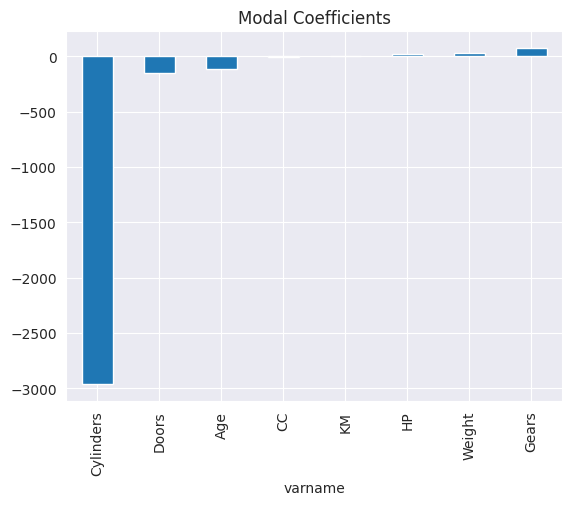

In [137]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [138]:
## training the model
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05)

In [139]:
from sklearn.metrics import r2_score
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.9016813920753588
R2_score (train):  0.9064306779814457
R2_score (test):  0.8850676466777025
RMSE:  1033.357493495031


In [140]:
ridgeReg.coef_.flatten()

array([-1.13419191e+02, -1.53151201e-02,  1.90236466e+01,  6.82364908e+01,
       -2.64939267e+00, -1.13606585e+02,  0.00000000e+00,  5.60987943e+01,
        2.96766815e+01])

In [141]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),'varname': dataframe.columns.values[1:]})
print(coef_df)

         coef    varname
0 -113.419191        Age
1   -0.015315         KM
2   19.023647         HP
3   68.236491  Automatic
4   -2.649393         CC
5 -113.606585      Doors
6    0.000000  Cylinders
7   56.098794      Gears
8   29.676681     Weight


<Axes: title={'center': 'alpha = 0.01'}, xlabel='varname'>

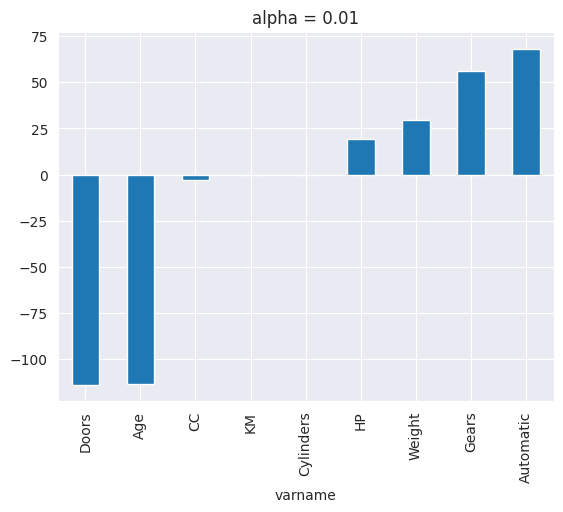

In [142]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='alpha = 0.01')

<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

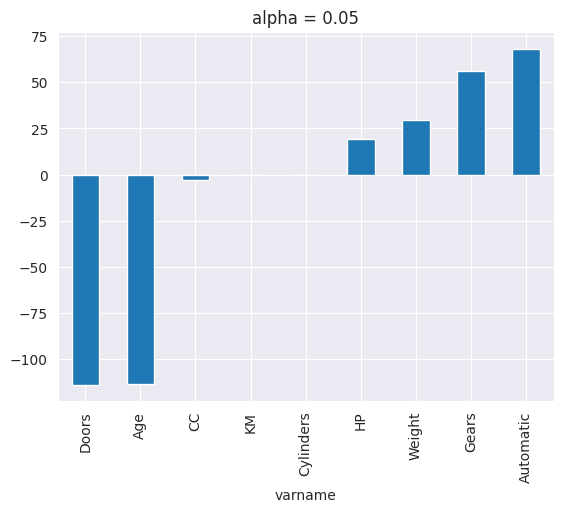

In [143]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

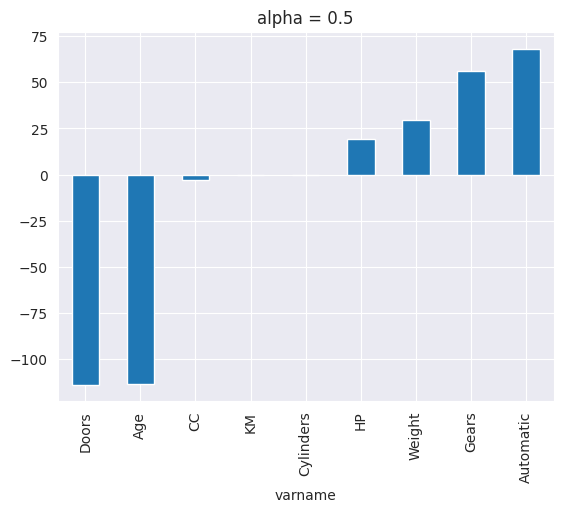

In [144]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='alpha = 0.5')

<Axes: title={'center': 'alpha = 5'}, xlabel='varname'>

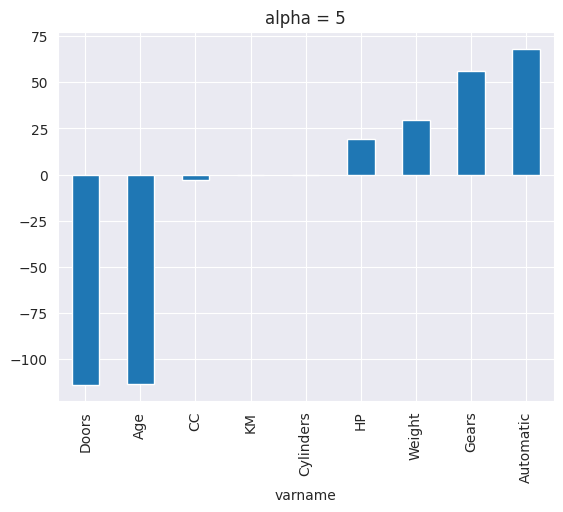

In [145]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='alpha = 5')

<Axes: title={'center': 'alpha = 5'}, xlabel='varname'>

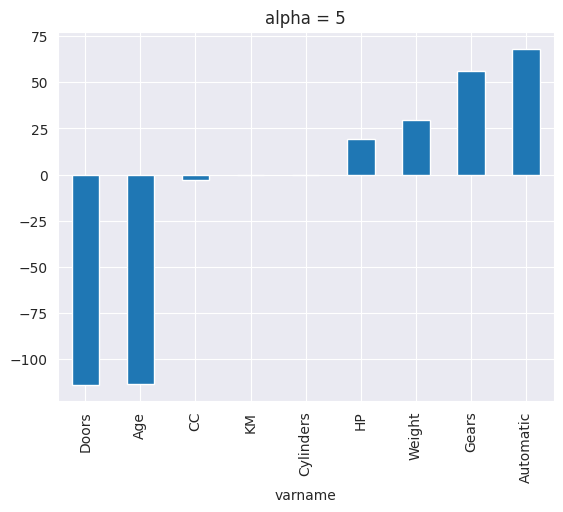

In [146]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='alpha = 5')

In [147]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
steps = [('scalar', StandardScaler()),('poly', PolynomialFeatures(degree=2)),('model', Ridge(alpha=0.5, fit_intercept=True))]
ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [148]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [149]:
from sklearn.feature_selection import SelectFromModel
sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)
sel_ridge.get_support()
selected_feat = x_train.columns[(sel_ridge.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(x_train.columns[(sel_ridge.get_support())])

total features: 9
selected features: 4
Index(['Age', 'Automatic', 'Doors', 'Gears'], dtype='object')


In [150]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.5)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
from sklearn.metrics import r2_score
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.9017209716191967
R2_score (train):  0.9064285820505916
R2_score (test):  0.8850574359728847
RMSE:  1033.4033947303906


In [151]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),'varname': dataframe.columns.values[1:]})
print(coef_df)

         coef    varname
0 -113.362397        Age
1   -0.015320         KM
2   19.071809         HP
3   51.506341  Automatic
4   -2.655385         CC
5 -114.253723      Doors
6    0.000000  Cylinders
7   32.303809      Gears
8   29.716752     Weight


<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

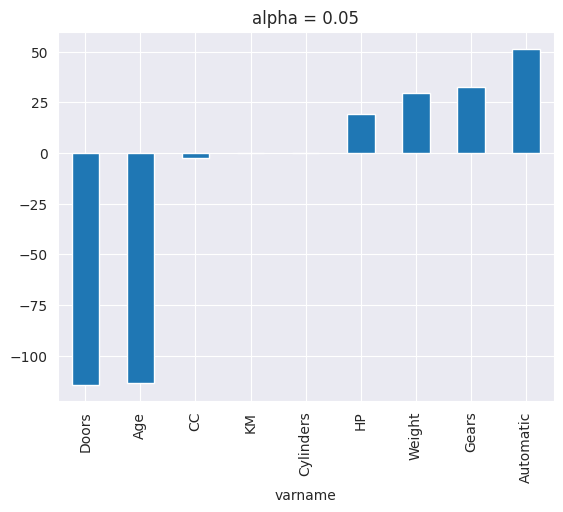

<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

In [152]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='alpha = 0.05')

In [154]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
steps = [('scalar', StandardScaler()),('poly', PolynomialFeatures(degree=2)),('model', Ridge(alpha=0.5, fit_intercept=True))]
ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [155]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
steps = [('scalar', StandardScaler()),('poly', PolynomialFeatures(degree=2)),('model', Ridge(alpha=0.5, fit_intercept=True))]
ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [156]:
from sklearn.feature_selection import SelectFromModel
sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)
sel_ridge.get_support()
selected_feat = x_train.columns[(sel_ridge.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(x_train.columns[(sel_ridge.get_support())])

total features: 9
selected features: 4
Index(['Age', 'Automatic', 'Doors', 'Gears'], dtype='object')


In [157]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.5)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
from sklearn.metrics import r2_score
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.9017209716191967
R2_score (train):  0.9064285820505916
R2_score (test):  0.8850574359728847
RMSE:  1033.4033947303906


In [158]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),'varname': dataframe.columns.values[1:] })
print(coef_df)

         coef    varname
0 -113.362397        Age
1   -0.015320         KM
2   19.071809         HP
3   51.506341  Automatic
4   -2.655385         CC
5 -114.253723      Doors
6    0.000000  Cylinders
7   32.303809      Gears
8   29.716752     Weight


<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

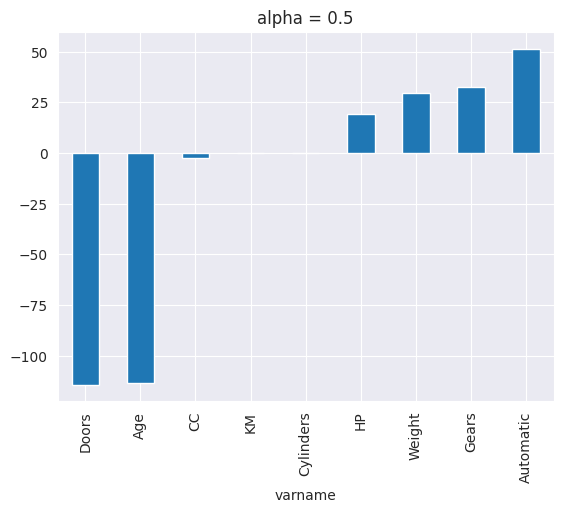

In [159]:
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='alpha = 0.5')

In [160]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
steps = [('scalar', StandardScaler()),('poly', PolynomialFeatures(degree=2)),('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))]
lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [161]:
from sklearn.metrics import r2_score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.908991435818662
R2_score (train):  0.9204329904050329
R2_score (test):  0.898283180845747
RMSE:  972.1333198661382


In [162]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [163]:
sel_lasso.get_support()

array([ True,  True,  True, False,  True, False, False, False,  True])

In [164]:
selected_feat = x_train.columns[(sel_lasso.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))

total features: 9
selected features: 5
features with coefficients shrank to zero: 4


In [165]:
x_train.columns[(sel_lasso.get_support())]

Index(['Age', 'KM', 'HP', 'CC', 'Weight'], dtype='object')

In [168]:
x = dataframe[['Age','KM','HP','CC','Doors','Cylinders','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','Cylinders','Weight'])
x_df.head()
predict = pd.DataFrame(model_1.predict(x_df))
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  0.9004401392729596
R2_Adjusted_score :  0.899987594451473
RMSE :  972.3447875314038


In [169]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age','Weight','KM','HP','CC','Cylinders','Doors','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age','Weight','KM','HP','CC','Cylinders','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['Age','Weight','KM','HP','CC','Doors']]))

In [170]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [171]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

Raw Model= 978.7394908519443 
After Removing Influencers= 975.572438844521 
After Log Transformation on both Model= 1839.7767106069982 
After Cube-root Transformation on both Model= 1186.8055147720074 
After Sqaure Root Transformation on both Model= 1021.2176093205605 
After Removing Influencers from model 975.572438844521 
Final Model without Multicollinearity Model= 972.3447875314038


In [172]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'Final Model without Multicollinearity Model'

In [173]:
# Finding rsquared values
Final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Cylinders+Weight', data = df).fit()
print(Final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     699.7
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:22:25   Log-Likelihood:                 698.06
No. Observations:                1435   AIC:                            -1382.
Df Residuals:                    1428   BIC:                            -1345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3406      0.046      7.359      0.0

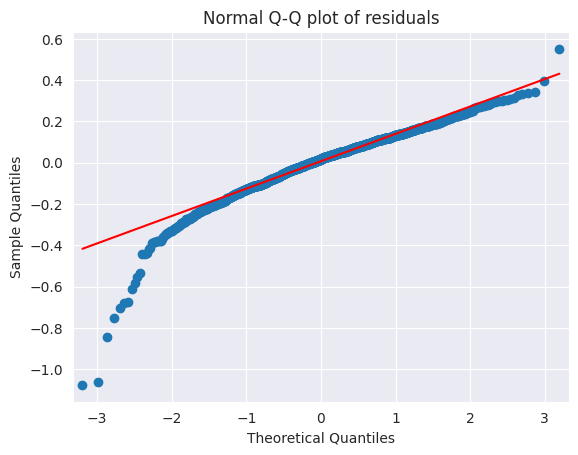

In [174]:
#Residuals values  = y - yhat
import statsmodels.api as sm
sm.qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [175]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


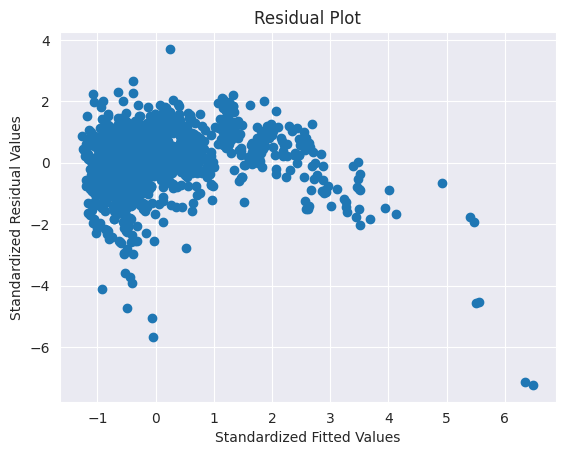

In [176]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

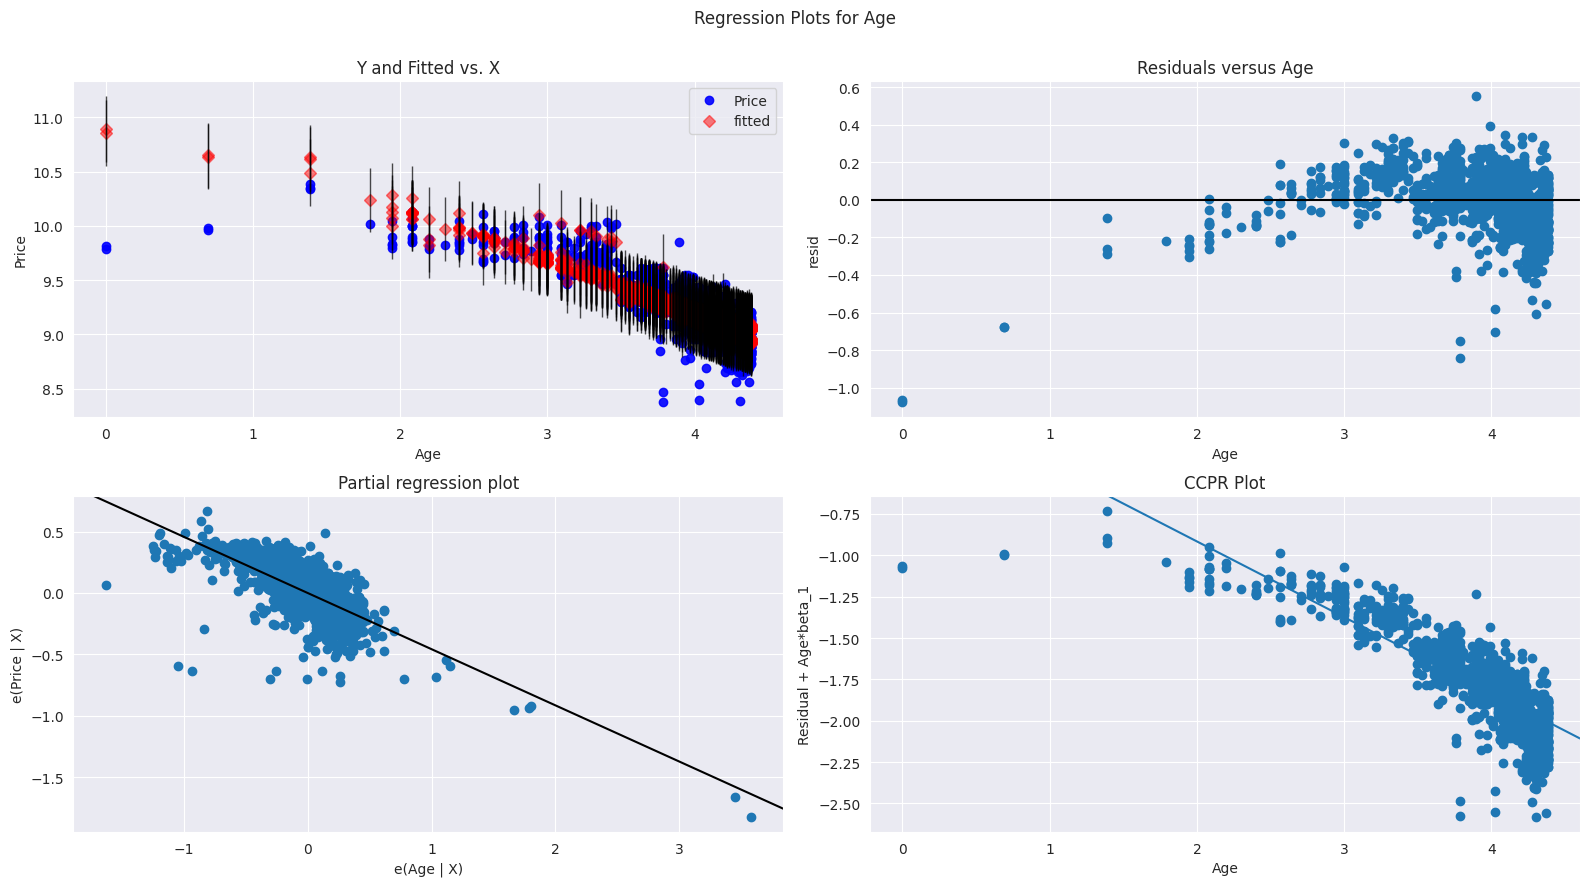

In [177]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

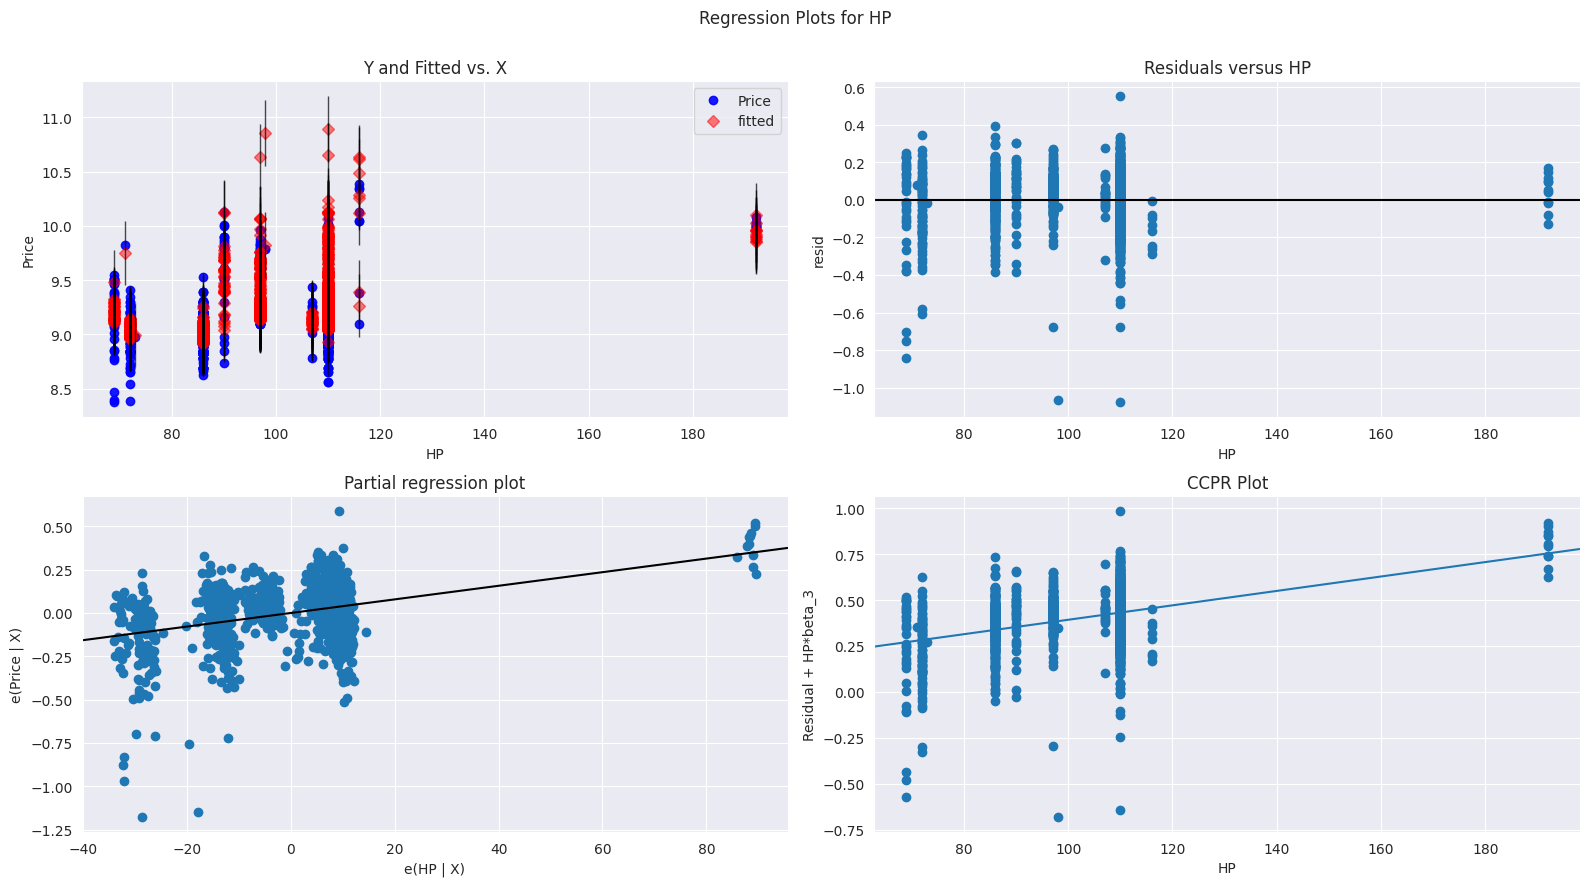

In [178]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

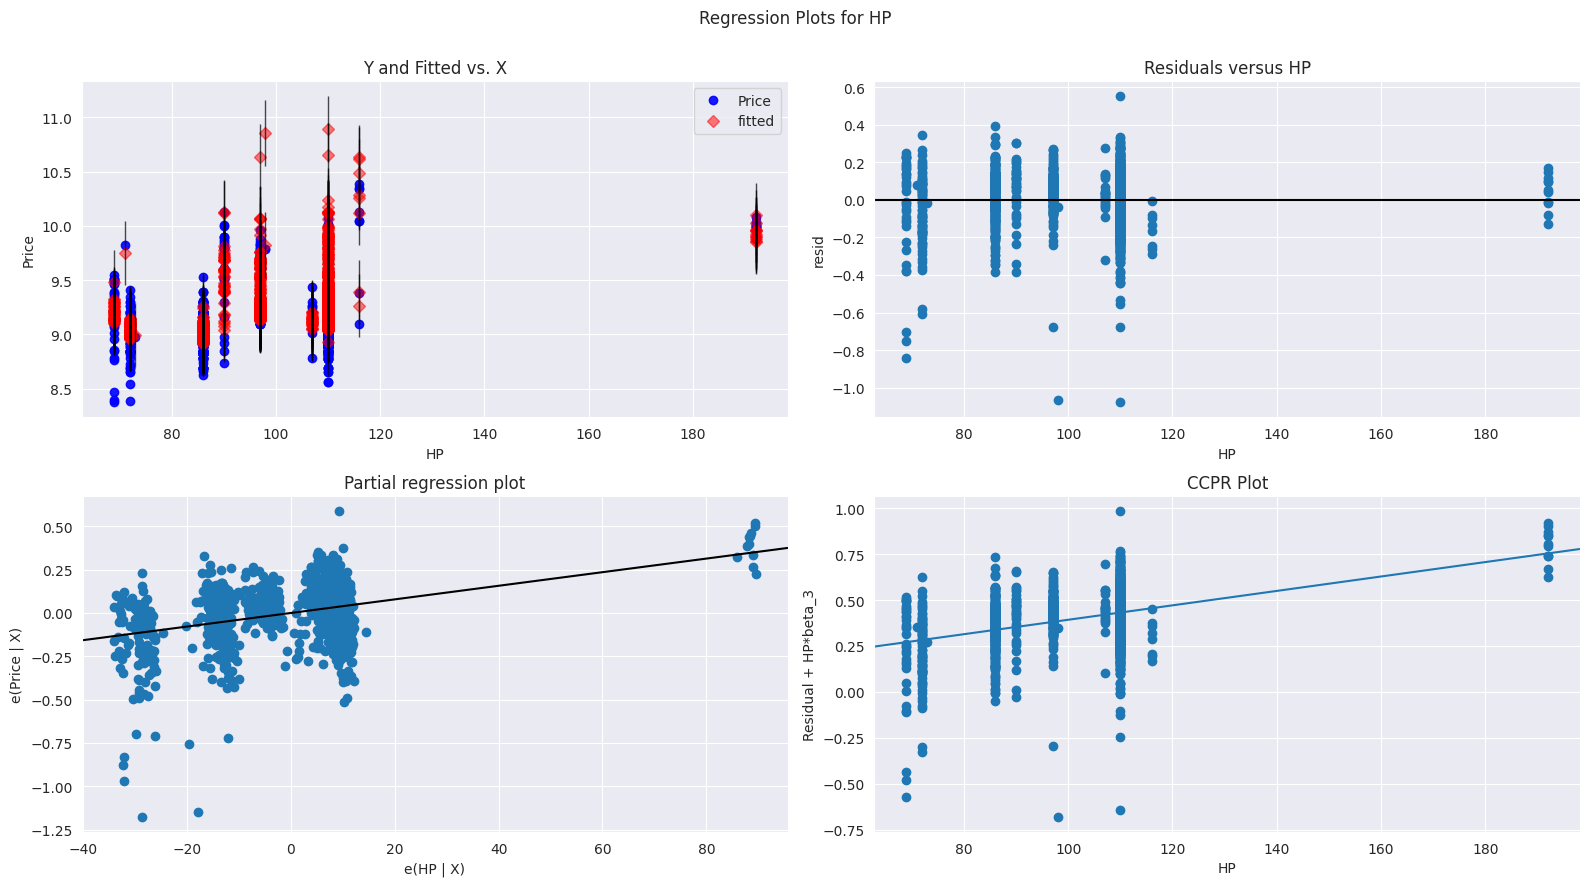

In [179]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

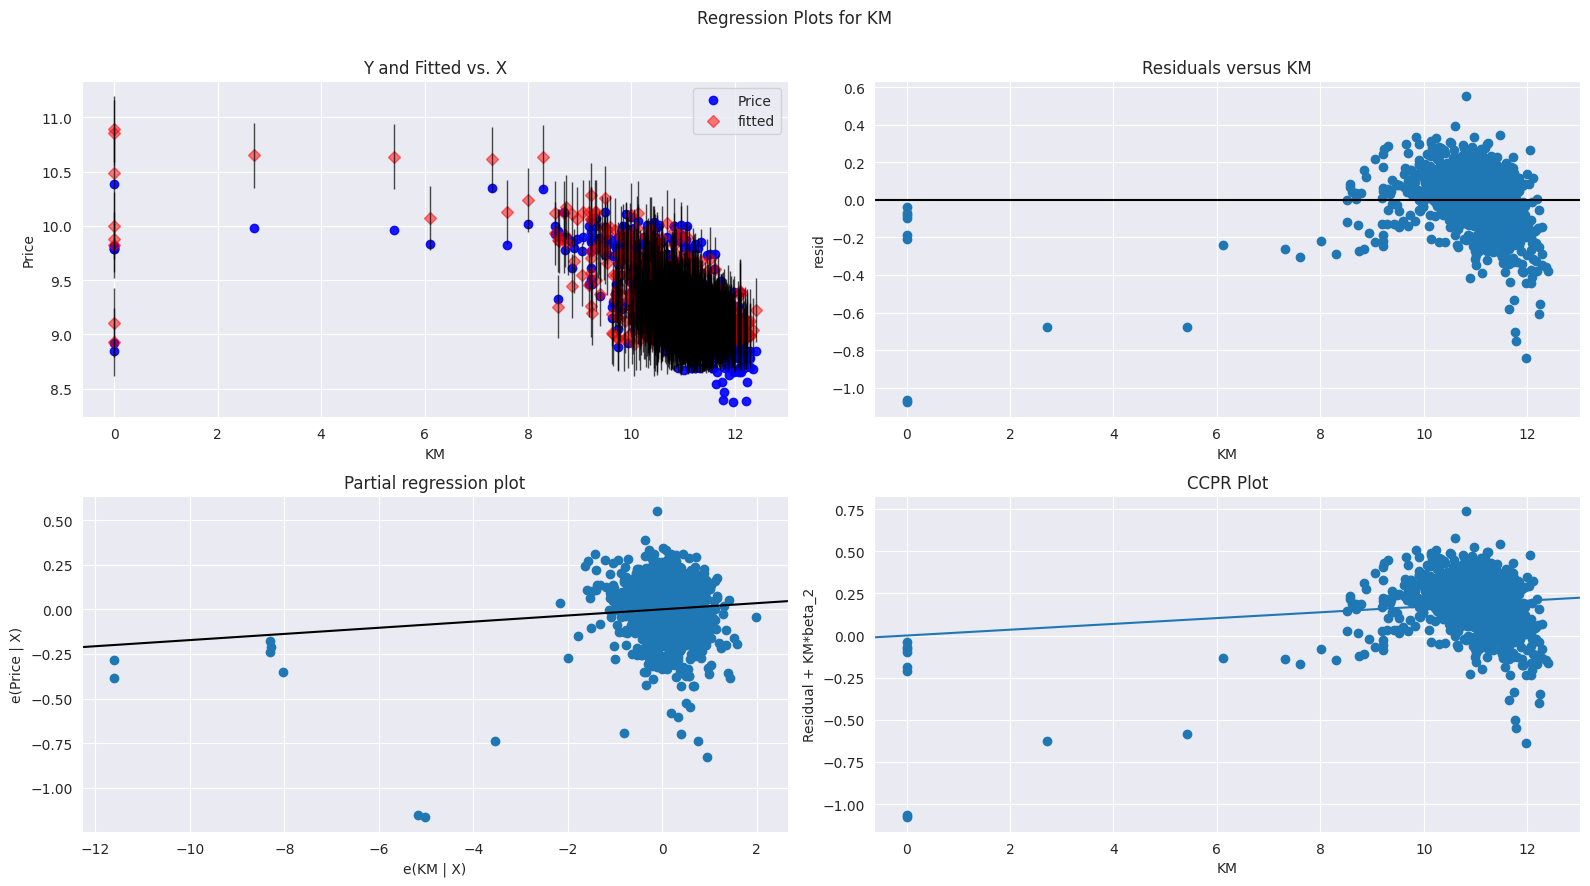

In [180]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

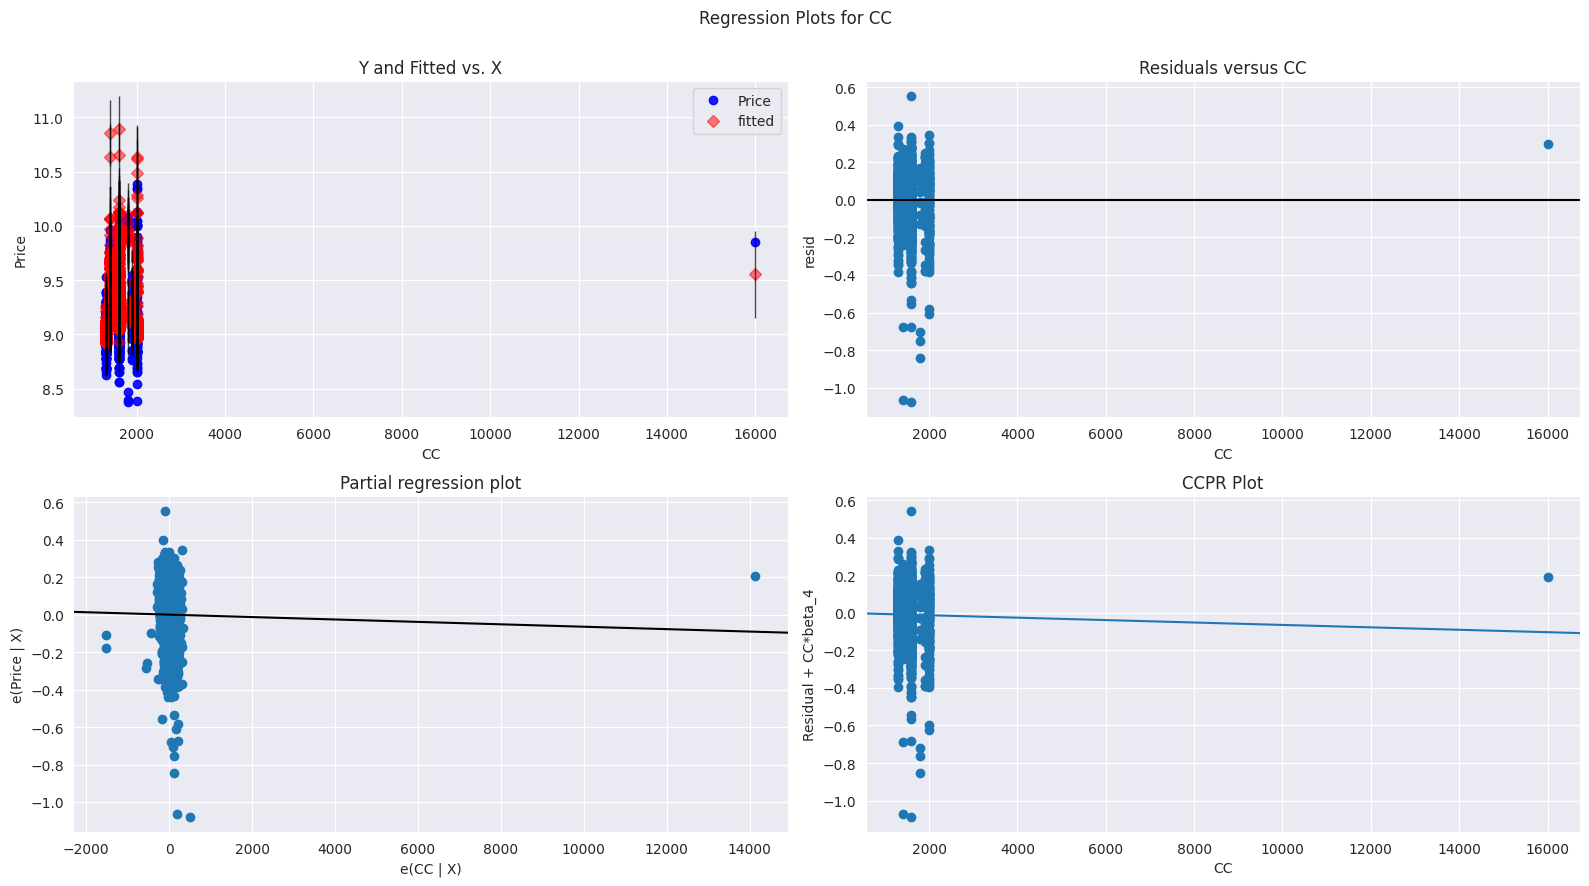

In [181]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

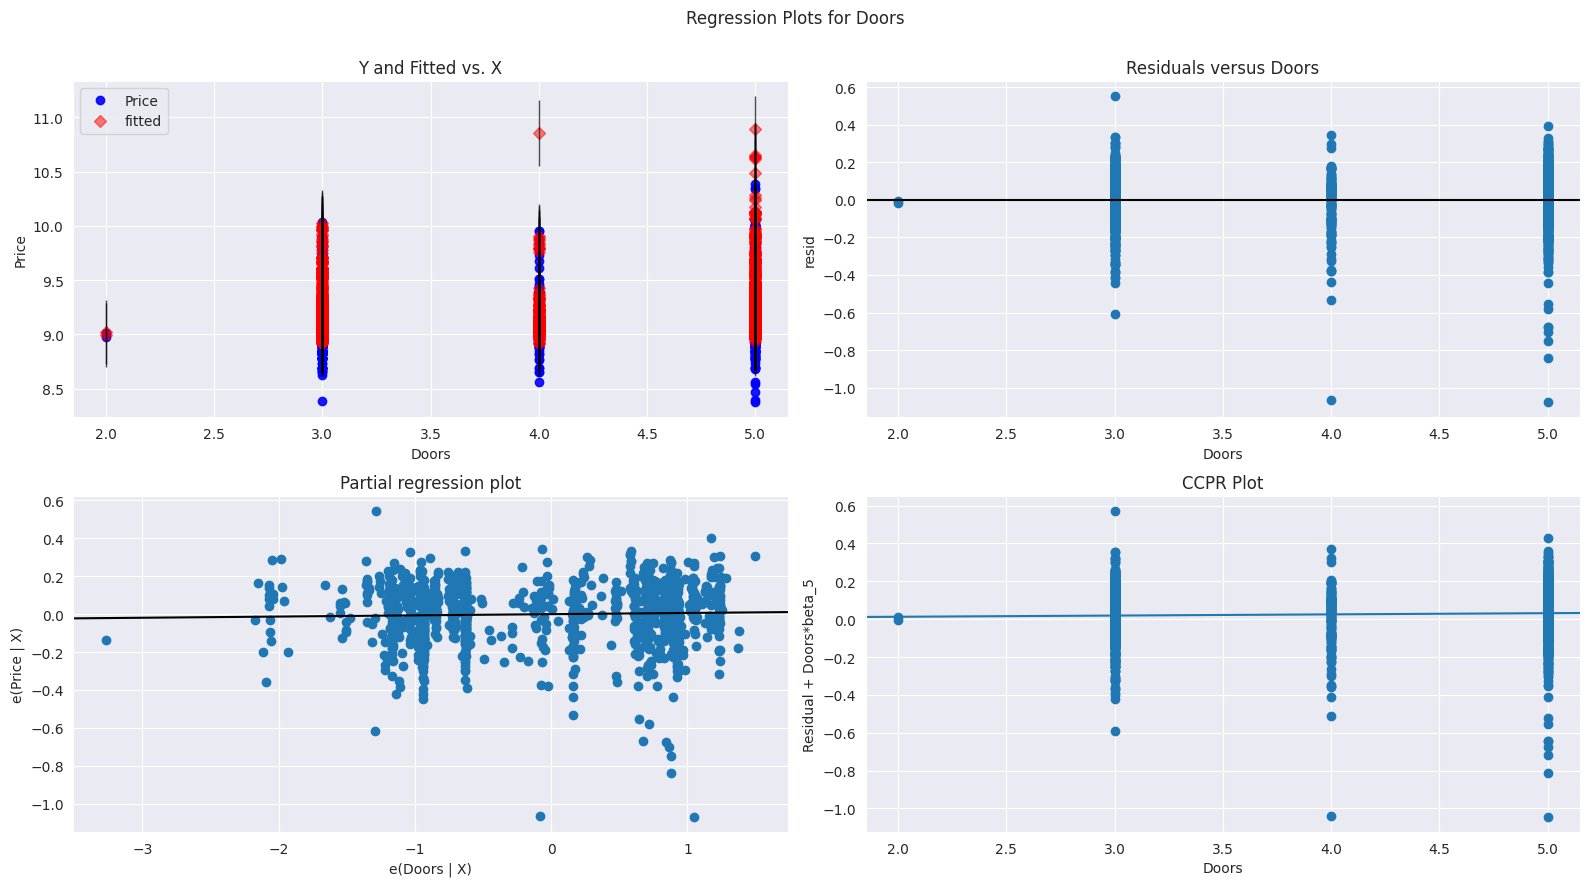

In [182]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

In [183]:
x = dataframe[['Age','KM','HP','CC','Doors','Cylinders','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','Cylinders','Weight'])
x_df.head()
predict = pd.DataFrame(Final_model.predict(x_df))
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[18911.63223891],
       [22935.31543133],
       [22669.1625175 ],
       ...,
       [ 8404.80898498],
       [ 7737.05500491],
       [ 7816.1020284 ]])

In [184]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

2108.7628576753414

In [185]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['Cylinders'] = dataframe.Cylinders
predicted['Doors'] = dataframe.Doors
predicted

Predicted_Price  Price  Age     KM  Weight   HP    CC  Cylinders  Doors
0        18911.632239  14950   26  48000    1165   90  2000          4      3
1        22935.315431  16900   27  94612    1245   90  2000          4      3
2        22669.162518  18600   30  75889    1245   90  2000          4      3
3        16140.690781  12950   23  71138    1105   69  1900          4      3
4        20326.813726  19950   22  43610    1185  192  1800          4      3
...               ...    ...  ...    ...     ...  ...   ...        ...    ...
1322      9753.983566   8950   78  24000    1065   86  1300          4      5
1323      7033.385366   8450   80  23000    1015   86  1300          4      3
1324      8404.808985   7500   69  20544    1025   86  1300          4      3
1325      7737.055005   8500   71  17016    1015   86  1300          4      3
1326      7816.102028   7250   70  16916    1015   86  1300          4      3

[1327 rows x 9 columns]

In [186]:
models={'Different_Models':['Raw_data_Model','After_Removing_Influencers','After_Log Transformation_Model','After_Cube-root_Transformation_Model','After_Sqaure_Root_Transformation_Model','Final_Model_without_Multicollinearity_Model'],
        'R_squared':[raw_data_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cbrt_transformed_model.rsquared,sqrt_transformed_model.rsquared,model_1.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_1.rsquared_adj],
       'RMSE':[np.sqrt(raw_data_model.mse_resid),np.sqrt(final_model.mse_resid),log_both_rmse,cube_root_both_rmse,square_root_both_rmse,rmse_linear]}
model_table=pd.DataFrame(models)
model_table


Different_Models  R_squared  R_squared_adjusted  \
0                               Raw_data_Model   0.900274            0.899669   
1                   After_Removing_Influencers   0.900458            0.899854   
2               After_Log Transformation_Model   0.758750            0.757653   
3         After_Cube-root_Transformation_Model   0.854142            0.853368   
4       After_Sqaure_Root_Transformation_Model   0.881090            0.880459   
5  Final_Model_without_Multicollinearity_Model   0.900440            0.899988   

          RMSE  
0   978.739491  
1   975.572439  
2  1839.776711  
3  1186.805515  
4  1021.217609  
5   972.344788

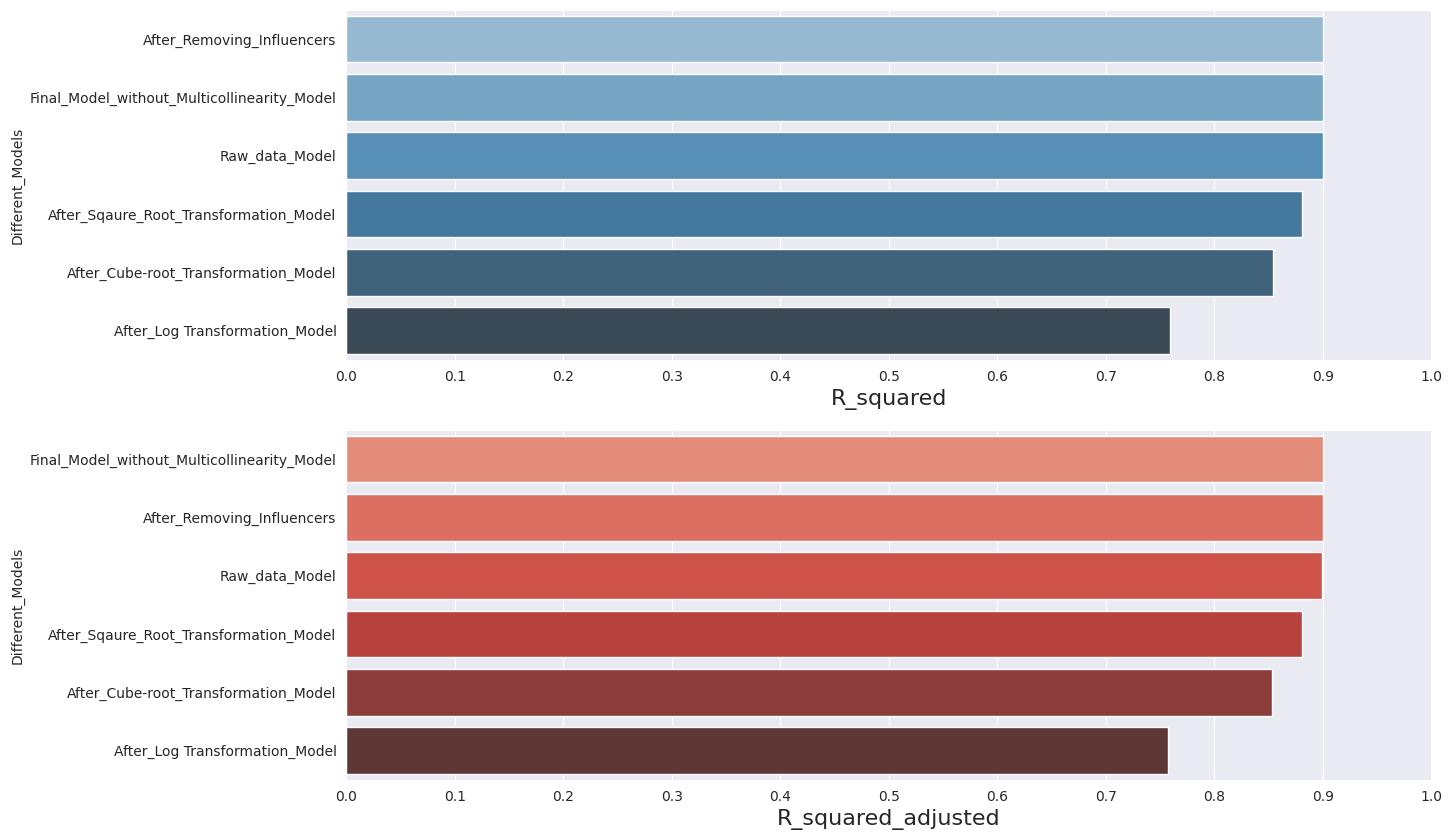

In [187]:
f, axes = plt.subplots(2,1, figsize=(14,10))
model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)
sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)
sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

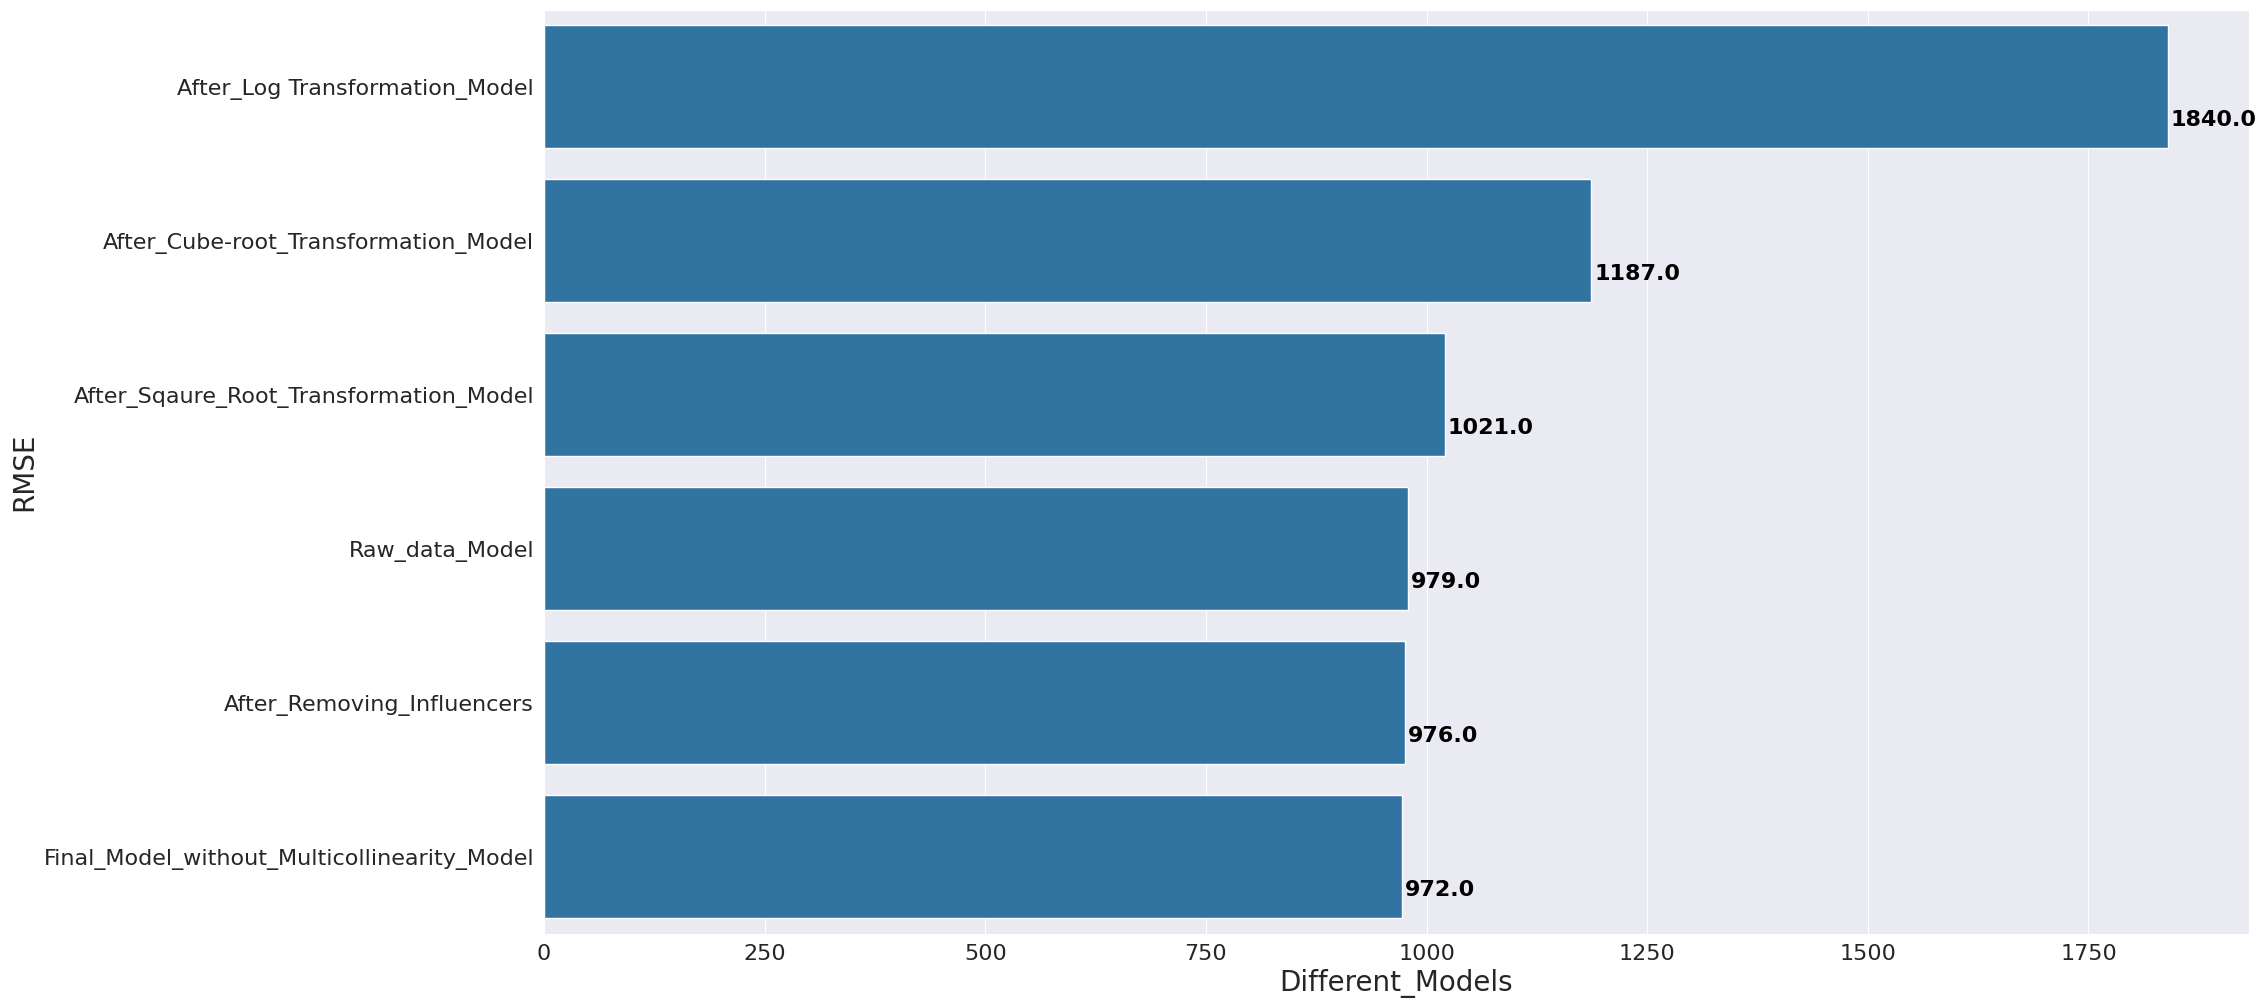

In [188]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(22,12))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=20)
axe.set_ylabel('RMSE', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)
plt.show()

In [189]:
x_train.shape

(928, 9)

In [190]:
#Linear Regression
reg_model = LinearRegression().fit(x_train, y_train)
print(reg_model.score(x_train, y_train),reg_model.score(x_test, y_test))

0.9064306780723147 0.8850677334692568


In [191]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model = GradientBoostingRegressor(random_state=1).fit(x_train, y_train)
print(gd_model.score(x_train, y_train),gd_model.score(x_test, y_test))

0.9469074346604492 0.912572542207195


In [192]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=1).fit(x_train, y_train)
print(rfr_model.score(x_train, y_train),rfr_model.score(x_test, y_test))

0.9869801152370625 0.90151700749312


In [193]:
print('Linear Regression Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, reg_model.predict(x_test))))
print('Gradient Booster Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, gd_model.predict(x_test))))
print('Random Forest Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, rfr_model.predict(x_test))))

Linear Regression Root Mean Squared Error: 1033.3571033232588
Gradient Booster Regressor Root Mean Squared Error: 901.2667903869168
Random Forest Regressor Root Mean Squared Error: 956.5552547578449
